<a href="https://colab.research.google.com/github/sgevatschnaider/blockchain-finanzas-descentralizadas/blob/main/Unidad-1/python/El_Impacto_de_las_Nuevas_Tecnolog%C3%ADas_en_los_Negocios.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
# file: notebooks/app_interactiva_finanzas_tokenizacion.py
from __future__ import annotations

from dataclasses import dataclass
from typing import List, Optional
from IPython.display import display, HTML
import html as _html

# ----------------------------------------------------------------------------
# Modelo y helpers
# ----------------------------------------------------------------------------

@dataclass
class Seccion:
    id: str
    titulo: str
    contenido_html: str  # HTML controlado por nosotros


def _esc(s: str) -> str:
    return _html.escape(s, quote=True)


def tarjeta_acordeon(inner_id: str, titulo: str, contenido: str) -> str:
    """Acordeón accesible con carga diferida. IDs predecibles para deep-links."""
    hid = f"{inner_id}-hdr"
    pid = f"{inner_id}-panel"
    return f"""
    <section class="topic-card" id="{inner_id}" aria-labelledby="{hid}">
      <div class="topic-header" id="{hid}" role="button" tabindex="0" aria-expanded="false" aria-controls="{pid}">
        <span class="topic-title">{_esc(titulo)}</span>
        <i class="fa-solid fa-chevron-down expand-icon" aria-hidden="true"></i>
      </div>
      <div class="topic-content" id="{pid}" role="region" aria-labelledby="{hid}" aria-hidden="true"></div>
      <template id="{pid}-tpl">{contenido}</template>
    </section>
    """


def bloque_seccion(sec: Seccion) -> str:
    return f'<div class="content-block" id="{_esc(sec.id)}"><h2>{_esc(sec.titulo)}</h2>{sec.contenido_html}</div>'


def indice_burbujas(secciones: List[Seccion]) -> str:
    """Índice con chips, búsqueda y botones globales."""
    # --- LÍNEA CORREGIDA ---
    # Se usan comillas simples (') para la f-string para evitar conflictos
    # con las comillas dobles (") usadas en los atributos HTML.
    items = "".join(
        f'<a class="chip" href="#{_esc(s.id)}" data-title="{_esc(s.titulo)}">{_esc(s.titulo)}</a>' for s in secciones
    )
    return f"""
    <div class="content-block" id="indice">
      <div class="indice-head">
        <h2>Índice</h2>
        <div class="indice-actions">
          <input id="search" class="search" placeholder="Filtrar secciones..." aria-label="Filtrar secciones" />
          <button id="btn-expand-all" class="btn ghost" title="Expandir todo">Expandir todo</button>
          <button id="btn-collapse-all" class="btn ghost" title="Colapsar todo">Colapsar todo</button>
        </div>
      </div>
      <div class="chips" id="chips">{items}</div>
    </div>
    """


# ----------------------------------------------------------------------------
# Contenido: Sección I - Panorama y casos
# ----------------------------------------------------------------------------

I_cards = """
<div class="lesson-container">
  {tarjeta_rwa}
  {tarjeta_dinero_prog}
  {tarjeta_perm}
  {tarjeta_interop}
  {tarjeta_paypal}
  {tarjeta_stripe}
  {tarjeta_impacto_fin}
  {tarjeta_jpm}
  {tarjeta_impacto_practico}
  {tarjeta_visa}
  {tarjeta_mastercard}
  {tarjeta_trad_pnl}
  {tarjeta_mediledger}
  {tarjeta_ksi}
  {tarjeta_ebl}
  {tarjeta_walmart}
  {tarjeta_kpis}
  {tarjeta_tramos}
  {tarjeta_perm_si}
  {tarjeta_publico_si}
  {tarjeta_cambios}
  {tarjeta_aportes}
</div>
"""

# Reutilizamos contenido curado del turno anterior, condensado para claridad.
_tarjeta_rwa = tarjeta_acordeon(
    "i-rwa",
    "Tokenización de Activos del Mundo Real (RWA)",
    """
    <p>Representar T-bills/fondos en un ledger habilita liquidación 24/7 y reglas programables para tesorería.</p>
    """,
)
_tarjeta_dinero_prog = tarjeta_acordeon(
    "i-dinero-prog",
    "Dinero Programable",
    """
    <p>Stablecoins/depósitos tokenizados permiten pagos B2B globales con conciliación automática y metadata estructurada.</p>
    """,
)
_tarjeta_perm = tarjeta_acordeon(
    "i-permissioned",
    "DLT Permissioned (Consorcios)",
    """
    <p>Fabric/Corda para privacidad, gobernanza de consorcio y finalidad rápida.</p>
    """,
)
_tarjeta_interop = tarjeta_acordeon(
    "i-interop",
    "Interoperabilidad y CBDC Mayoristas",
    """
    <p>mBridge/SWIFT conectan rieles tradicionales con rieles tokenizados.</p>
    """,
)
_tarjeta_paypal = tarjeta_acordeon("i-paypal", "PayPal – PYUSD", "<p>Puente cuentas tradicionales ↔ dinero 24/7.</p>")
_tarjeta_stripe = tarjeta_acordeon("i-stripe", "Stripe", "<p>Pagos con stablecoins, liquidación en fiat.</p>")
_tarjeta_impacto_fin = tarjeta_acordeon("i-impacto-fin", "Impacto Financiero", "<ul><li>Cash management</li><li>Cut-offs</li><li>Escrow programable</li></ul>")
_tarjeta_jpm = tarjeta_acordeon("i-jpm", "JPMorgan – Onyx / TCN", "<p>Tokeniza MMFs como colateral, reduce fricción de garantías.</p>")
_tarjeta_impacto_practico = tarjeta_acordeon("i-impacto-practico", "Impacto Práctico", "<ul><li>Eficiencia de capital</li><li>Gestión de garantías</li></ul>")
_tarjeta_visa = tarjeta_acordeon("i-visa", "Visa", "<p>Settlement con stablecoins en más chains; rieles tokenizados ↔ rieles tarjetas.</p>")
_tarjeta_mastercard = tarjeta_acordeon("i-mtn", "Mastercard – Multi-Token Network (MTN)", "<p>Depósitos tokenizados y FX con enfoque compliance-first.</p>")
_tarjeta_trad_pnl = tarjeta_acordeon("i-trad-pnl", "Traducción a P&L", "<p>Pagos más baratos, 24/7, conciliación automática.</p>")
_tarjeta_mediledger = tarjeta_acordeon("i-mediledger", "Farmacéutica – MediLedger (DSCSA)", "<p>Trazabilidad a nivel paquete con evidencia criptográfica.</p>")
_tarjeta_ksi = tarjeta_acordeon("i-ksi", "Historias Clínicas – Estonia / KSI", "<p>Hashes anclados como prueba de no alteración.</p>")
_tarjeta_ebl = tarjeta_acordeon("i-ebl", "eBL (electronic Bill of Lading)", "<p>Digitalización del conocimiento de embarque y financiación acelerada.</p>")
_tarjeta_walmart = tarjeta_acordeon("i-walmart", "Trazabilidad Alimentaria – Walmart", "<p>Fabric reduce trazado de días a segundos.</p>")
_tarjeta_kpis = tarjeta_acordeon("i-kpis", "KPIs a medir:", "<ul><li>Haircuts</li><li>Liquidez intradía</li><li>Coste intradía</li><li>Ciclo garantía</li></ul>")
_tarjeta_tramos = tarjeta_acordeon("i-tramos", "Tramos de mayor impacto:", "<ul><li>Interbancario/cross-border</li><li>Payouts</li><li>Reconciliación</li></ul>")
_tarjeta_perm_si = tarjeta_acordeon("i-perm-si", "Elegir Permissioned (Fabric/Corda) si:", "<ul><li>Confidencialidad</li><li>Acceso controlado</li><li>Gobernanza</li></ul>")
_tarjeta_publico_si = tarjeta_acordeon("i-publico-si", "Elegir Público (EVM) si:", "<ul><li>Composabilidad</li><li>Alcance global</li></ul>")
_tarjeta_cambios = tarjeta_acordeon("i-cambios", "Cambios estructurales:", "<ul><li>Just-in-time</li><li>Ventanas rodantes</li><li>Netting dinámico</li></ul>")
_tarjeta_aportes = tarjeta_acordeon(
    "i-aportes",
    "Aportes clave frente a una BD tradicional:",
    "<ul><li>Inmutabilidad verificable</li><li>Auditabilidad multi-empresa</li><li>Privacidad por diseño</li><li>No repudio</li></ul>",
)

I_html = I_cards.format(
    tarjeta_rwa=_tarjeta_rwa,
    tarjeta_dinero_prog=_tarjeta_dinero_prog,
    tarjeta_perm=_tarjeta_perm,
    tarjeta_interop=_tarjeta_interop,
    tarjeta_paypal=_tarjeta_paypal,
    tarjeta_stripe=_tarjeta_stripe,
    tarjeta_impacto_fin=_tarjeta_impacto_fin,
    tarjeta_jpm=_tarjeta_jpm,
    tarjeta_impacto_practico=_tarjeta_impacto_practico,
    tarjeta_visa=_tarjeta_visa,
    tarjeta_mastercard=_tarjeta_mastercard,
    tarjeta_trad_pnl=_tarjeta_trad_pnl,
    tarjeta_mediledger=_tarjeta_mediledger,
    tarjeta_ksi=_tarjeta_ksi,
    tarjeta_ebl=_tarjeta_ebl,
    tarjeta_walmart=_tarjeta_walmart,
    tarjeta_kpis=_tarjeta_kpis,
    tarjeta_tramos=_tarjeta_tramos,
    tarjeta_perm_si=_tarjeta_perm_si,
    tarjeta_publico_si=_tarjeta_publico_si,
    tarjeta_cambios=_tarjeta_cambios,
    tarjeta_aportes=_tarjeta_aportes,
)

sec_I = Seccion(id="panorama", titulo="I. Panorama y casos (tokenización, pagos y consorcios)", contenido_html=I_html)

# ----------------------------------------------------------------------------
# Contenido: Sección II - DeFi: actores, componentes y métricas
# ----------------------------------------------------------------------------

II_html = f"""
<div class="lesson-container">
  {tarjeta_acordeon('ii-actores', 'Actores y Componentes', '<ul><li>Usuarios, Proveedores de Liquidez, Liquidadores</li><li>Oráculos, Vaults, AMMs</li><li>Gobernanza, Riesgo</li></ul>')}
  <section class="content-lab" id="ii-calc">
    <h3>Calculadora de Préstamo y Factor de Salud</h3>
    <div class="lab-grid">
      <div class="lab-controls">
        <label>Precio del colateral: <output id="out-price">1000</output></label>
        <input id="price" type="range" min="100" max="5000" step="10" value="1000" />
        <label>Cantidad de colateral: <output id="out-amount">1.0</output></label>
        <input id="amount" type="range" min="0.1" max="10" step="0.1" value="1.0" />
        <label>Factor de colateral (%) <small>(LTV máximo)</small>: <output id="out-cf">70</output></label>
        <input id="cf" type="range" min="30" max="90" step="1" value="70" />
        <label>Umbral de liquidación (%) : <output id="out-lt">80</output></label>
        <input id="lt" type="range" min="50" max="95" step="1" value="80" />
        <label>Deuda actual (USD): <output id="out-debt">500</output></label>
        <input id="debt" type="range" min="0" max="5000" step="10" value="500" />
        <label>Volatilidad esperada (%) : <output id="out-vol">20</output></label>
        <input id="vol" type="range" min="0" max="100" step="1" value="20" />
      </div>
      <div class="lab-results">
        <div class="metrics">
          <div><span>Valor del colateral</span><strong id="m-coll">$1000.00</strong></div>
          <div><span>Máximo a pedir</span><strong id="m-max">$700.00</strong></div>
          <div><span>LTV actual</span><strong id="m-ltv">50.0%</strong></div>
          <div><span>Health Factor</span><strong id="m-hf">1.60</strong></div>
          <div><span>Buffer de seguridad</span><strong id="m-buffer">$300.00</strong></div>
        </div>
        <div class="bar"><div class="bar-fill" id="bar" style="width:50%"></div></div>
        <p class="hint">Si el <em>Health Factor</em> &lt; 1, el préstamo sería liquidable. Ajusta sliders para ver sensibilidad.</p>
      </div>
    </div>
  </section>
</div>
"""

sec_II = Seccion(id="defi", titulo="II. DeFi: actores, componentes y métricas de riesgo", contenido_html=II_html)

# ----------------------------------------------------------------------------
# Contenido: Sección III - Proceso de Colateralización y Simulación
# ----------------------------------------------------------------------------

III_html = """
<div class="lesson-container">
  <section class="content-block nested" id="iii-diagrama">
    <h3>Diagrama Visual del Flujo</h3>
    <svg viewBox="0 0 820 210" class="flow" role="img" aria-label="Flujo de colateralización">
      <defs>
        <marker id="arrow" markerWidth="10" markerHeight="10" refX="8" refY="3" orient="auto"><path d="M0,0 L0,6 L9,3 z"></path></marker>
      </defs>
      <rect x="10" y="40" width="180" height="50" rx="10" class="node"></rect>
      <text x="100" y="70" text-anchor="middle">1) Deposita colateral</text>
      <rect x="230" y="40" width="170" height="50" rx="10" class="node"></rect>
      <text x="315" y="70" text-anchor="middle">2) Crea posición (vault)</text>
      <rect x="430" y="40" width="160" height="50" rx="10" class="node"></rect>
      <text x="510" y="70" text-anchor="middle">3) Pide préstamo</text>
      <rect x="620" y="40" width="180" height="50" rx="10" class="node danger"></rect>
      <text x="710" y="70" text-anchor="middle">4) Chequeo HF / liquidación</text>
      <line x1="190" y1="65" x2="230" y2="65" class="edge" marker-end="url(#arrow)"/>
      <line x1="400" y1="65" x2="430" y2="65" class="edge" marker-end="url(#arrow)"/>
      <line x1="590" y1="65" x2="620" y2="65" class="edge" marker-end="url(#arrow)"/>
    </svg>
  </section>

  <section class="content-block nested" id="iii-codigo">
    <h3>Código de la Simulación (JS)</h3>
    <pre class="code"><code id="sim-code"></code></pre>
  </section>

  <section class="content-block nested" id="iii-ejecucion">
    <h3>Ejecución Paso a Paso de la Simulación</h3>
    <div class="lab-grid">
      <div class="lab-controls">
        <label>Precio inicial (USD): <output id="s-price">1000</output></label>
        <input id="sprice" type="range" min="100" max="5000" step="10" value="1000" />
        <label>Cantidad colateral: <output id="s-amt">1.0</output></label>
        <input id="samt" type="range" min="0.1" max="10" step="0.1" value="1.0" />
        <label>Deuda (USD): <output id="s-debt">500</output></label>
        <input id="sdebt" type="range" min="0" max="5000" step="10" value="500" />
        <label>Umbral de liquidación (%) : <output id="s-lt">80</output></label>
        <input id="slt" type="range" min="50" max="95" step="1" value="80" />
        <label>Choque de precio (%) : <output id="s-shock">-20</output></label>
        <input id="sshock" type="range" min="-90" max="90" step="1" value="-20" />
        <div class="btn-row"><button id="s-step" class="btn">Siguiente paso</button><button id="s-reset" class="btn ghost">Reiniciar</button></div>
      </div>
      <div class="lab-results">
        <ol id="s-log" class="log"></ol>
      </div>
    </div>
  </section>
</div>
"""

sec_III = Seccion(id="colateralizacion", titulo="III. Proceso de Colateralización en un Protocolo de Préstamo DeFi", contenido_html=III_html)

# ----------------------------------------------------------------------------
# Contenido: Sección IV - Tesorería Corporativa con T-Bills Tokenizados
# ----------------------------------------------------------------------------

IV_cards = """
<div class="lesson-container">
  {dtoken}
  {ftoken}
  {actcom}
  {swift}
  {mbridge}
  {resumen}
  {pagos}
  {posttrade}
  {tradefin}
</div>
"""

IV_html = IV_cards.format(
    dtoken=tarjeta_acordeon("iv-dtoken", "Depósitos Tokenizados", "<p>Pasivo bancario en ledger para pagos de empresa 24/7.</p>"),
    ftoken=tarjeta_acordeon("iv-ftoken", "Fondos Tokenizados", "<p>Uso de MMFs tokenizados para colateral y tesorería.</p>"),
    actcom=tarjeta_acordeon("iv-actcom", "Activos de Comercio Tokenizados", "<p>eBL, facturas y pólizas como colateral líquido.</p>"),
    swift=tarjeta_acordeon("iv-swift", "SWIFT: El Traductor Universal", "<p>Mensajería que orquesta entre rieles tradicionales/tokenizados.</p>"),
    mbridge=tarjeta_acordeon("iv-mbridge", "mBridge: El Riel de los Bancos Centrales", "<p>Liquidación mayorista multi-CBDC.</p>"),
    resumen=tarjeta_acordeon("iv-resumen", "Resumen Comparativo", "<ul><li>Coste</li><li>Latencia</li><li>Riesgo</li></ul>"),
    pagos=tarjeta_acordeon("iv-pagos", "Pagos y Liquidez 24/7", "<p>Menos cut-offs y mejor working capital.</p>"),
    posttrade=tarjeta_acordeon("iv-posttrade", "Menor Riesgo en Post-Trade", "<p>Liquidación más rápida reduce exposición.</p>"),
    tradefin=tarjeta_acordeon("iv-tradefin", "Trade Finance Acelerado", "<p>Tokenizar documentos/activos acelera financiación.</p>"),
)

sec_IV = Seccion(id="tesoreria", titulo="IV. Tesorería Corporativa con T-Bills Tokenizados", contenido_html=IV_html)

# ----------------------------------------------------------------------------
# Plantilla con CSS/JS y UI global (tema, partículas, accesibilidad)
# ----------------------------------------------------------------------------

PLANTILLA = r"""
<!DOCTYPE html>
<html lang="es" data-theme="dark">
<head>
  <meta charset="UTF-8" />
  <meta name="viewport" content="width=device-width, initial-scale=1.0" />
  <title>{main_title}</title>
  <link href="https://fonts.googleapis.com/css2?family=Inter:wght@300;400;600;800&display=swap" rel="stylesheet" />
  <link href="https://cdnjs.cloudflare.com/ajax/libs/font-awesome/6.5.2/css/all.min.css" rel="stylesheet" />
  <style>
    :root {{ --bg1: linear-gradient(135deg,#004e92 0%,#000428 100%); --glass: rgba(255,255,255,.88); --glass2: rgba(248,250,252,.95); --ink: #1f2937; --ink2: #475569; --pri: #004e92; --pri2:#3a7bd5; --b: rgba(226,232,240,.9); --rad: 20px; --t: .3s ease; }}
    [data-theme="dark"] {{ --glass: rgba(26,32,44,.85); --glass2: rgba(45,55,72,.8); --ink:#f7fafc; --ink2:#a0aec0; --b: rgba(255,255,255,.15); --pri:#3a7bd5; --pri2:#004e92; }}
    * {{ box-sizing: border-box; margin:0; padding:0; }}
    html {{ scroll-behavior: smooth; }}
    body {{ font-family: 'Inter', system-ui, -apple-system, Segoe UI, Roboto, sans-serif; color:var(--ink); background: var(--bg1); line-height:1.75; }}
    .container {{ max-width: 1100px; margin: 0 auto; padding: 2rem; }}
    .header {{ text-align:center; margin-bottom:1.25rem; }}
    .title {{ font-size:clamp(2.2rem,4.2vw,3.8rem); font-weight:800; background: linear-gradient(135deg,var(--pri),var(--pri2)); -webkit-background-clip:text; background-clip:text; -webkit-text-fill-color:transparent; }}
    .theme-toggle {{ position: fixed; top: 1rem; right: 1rem; width: 56px; height: 56px; display:grid; place-items:center; background:var(--glass); border:1px solid var(--b); border-radius:50%; cursor:pointer; transition: var(--t); z-index:999; }}
    .theme-toggle:hover {{ transform: scale(1.06) rotate(4deg); }}
    .content-block {{ background: var(--glass); border:2px solid var(--b); border-radius: var(--rad); padding: 1.5rem; margin-top:1.25rem; backdrop-filter: blur(14px); box-shadow: 0 10px 30px rgba(0,0,0,.08); }}
    .content-block h2 {{ border-left:4px solid var(--pri); padding-left: .75rem; margin-bottom: .75rem; }}
    .lesson-container {{ display:flex; flex-direction:column; gap:.8rem; }}
    .topic-card {{ background: var(--glass2); border:1px solid var(--b); border-radius: 14px; overflow:hidden; }}
    .topic-header {{ padding: .95rem 1.1rem; display:flex; align-items:center; justify-content:space-between; cursor:pointer; }}
    .topic-header:focus-visible {{ outline: 3px solid #3b82f6; outline-offset:2px; }}
    .topic-title {{ font-weight: 600; }}
    .topic-content {{ max-height: 0; overflow:hidden; transition: max-height .5s ease, padding .5s ease; padding: 0 1.1rem; }}
    .topic-card.open .topic-content {{ max-height: 5000px; padding: .9rem 1.1rem; border-top:1px solid var(--b); }}
    .expand-icon {{ transition: var(--t); color:var(--ink2); }}
    .topic-card.open .expand-icon {{ transform: rotate(180deg); }}

    .indice-head {{ display:flex; align-items:center; justify-content:space-between; gap:1rem; margin-bottom:.6rem; }}
    .chips {{ display:flex; flex-wrap:wrap; gap:.5rem; }}
    .chip {{ display:inline-flex; align-items:center; gap:.4rem; padding:.45rem .7rem; border-radius:999px; border:1px solid var(--b); background: var(--glass2); text-decoration:none; color:inherit; transition:var(--t); }}
    .chip:hover {{ transform: translateY(-1px); box-shadow:0 6px 14px rgba(0,0,0,.08); }}
    .search {{ flex:1; min-width:220px; padding:.6rem .75rem; border-radius:10px; border:1px solid var(--b); background: var(--glass2); color:inherit; }}
    .btn {{ padding:.6rem .9rem; border-radius:12px; border:1px solid var(--b); background: var(--glass2); color:inherit; cursor:pointer; transition:var(--t); }}
    .btn:hover {{ transform: translateY(-1px); }}
    .btn.ghost {{ background: transparent; }}

    .content-lab h3 {{ margin-bottom:.4rem; }}
    .lab-grid {{ display:grid; grid-template-columns: minmax(240px, 1fr) 1.3fr; gap:1rem; }}
    .lab-controls input[type=range] {{ width:100%; }}
    .metrics {{ display:grid; grid-template-columns: repeat(2, minmax(140px, 1fr)); gap:.6rem; margin-bottom:.6rem; }}
    .metrics div {{ display:flex; align-items:center; justify-content:space-between; padding:.5rem .75rem; border:1px dashed var(--b); border-radius:12px; }}
    .bar {{ height:12px; background:rgba(0,0,0,.08); border-radius:999px; overflow:hidden; border:1px solid var(--b); }}
    .bar-fill {{ height:100%; width:0; background: linear-gradient(90deg, var(--pri), var(--pri2)); transition: width .25s ease; }}
    .hint {{ color: var(--ink2); font-size:.9rem; margin-top:.45rem; }}
    .btn-row {{ display:flex; gap:.6rem; margin-top:.4rem; }}
    .log {{ display:flex; flex-direction:column; gap:.4rem; counter-reset: step; }}
    .log li {{ background: var(--glass2); border:1px solid var(--b); border-radius:10px; padding:.5rem .75rem; list-style:none; }}

    .particles {{ position: fixed; inset: 0; pointer-events: none; z-index: -1; }}
    .particle {{ position:absolute; border-radius:50%; background:rgba(255,255,255,.6); animation: float 25s infinite linear; opacity:0; }}
    @keyframes float {{ 0% {{ transform: translateY(100vh) rotate(0); opacity:0; }} 10%,90% {{ opacity:.6; }} 100% {{ transform: translateY(-10vh) rotate(360deg); opacity:0; }} }}

    .flow {{ width:100%; height:auto; background: var(--glass2); border:1px solid var(--b); border-radius:12px; }}
    .node {{ fill: #fff; stroke: var(--b); }}
    .node.danger {{ fill: #fff; }}
    .edge {{ stroke: var(--ink2); stroke-width:2; }}

    footer {{ text-align:center; margin-top:1.8rem; padding-top:1rem; border-top:1px solid var(--b); }}
    .to-top {{ position: fixed; bottom: 1rem; right: 1rem; display:none; }}
  </style>
</head>
<body>
  <div class="particles" id="particles"></div>
  <button class="theme-toggle" id="theme" title="Cambiar tema" aria-label="Cambiar tema"><i class="fa-solid fa-moon"></i></button>
  <button class="btn to-top" id="toTop" title="Volver arriba">↑</button>
  <div class="container">
    <header class="header"><h1 class="title">{main_title}</h1></header>
    {indice}
    {contenido}
    <footer><p>{footer_text}</p></footer>
  </div>
  <script>{script}</script>
</body>
</html>
"""

# ---- Script JS separado para evitar problemas de llaves con .format --------

SCRIPT = r"""
(function(){
  // Tema persistente
  const root = document.documentElement; const btn = document.getElementById('theme');
  function setTheme(t){ root.setAttribute('data-theme', t); try{localStorage.setItem('theme',t);}catch(_){} btn.innerHTML = t==='dark' ? '<i class="fa-solid fa-sun"></i>' : '<i class="fa-solid fa-moon"></i>'; }
  setTheme((()=>{try{return localStorage.getItem('theme')||'dark';}catch(_){return 'dark';}})());
  btn.addEventListener('click',()=> setTheme((root.getAttribute('data-theme')||'dark')==='dark'?'light':'dark'));

  // Partículas: respetar reduced motion
  const pc = document.getElementById('particles');
  if (pc && !window.matchMedia('(prefers-reduced-motion: reduce)').matches){
    for(let i=0;i<28;i++){const p=document.createElement('div');p.className='particle';p.style.left=(Math.random()*100)+'vw';const s=(Math.random()*5+2);p.style.width=s+'px';p.style.height=s+'px';p.style.animationDelay=(Math.random()*-20)+'s';p.style.animationDuration=(15+Math.random()*10)+'s';pc.appendChild(p);} }

  // Acordeón accesible + carga diferida
  document.addEventListener('click', (e)=>{
    const header = e.target.closest('.topic-header'); if(!header) return;
    const card = header.parentElement; const expanded = header.getAttribute('aria-expanded')==='true';
    header.setAttribute('aria-expanded', String(!expanded)); card.classList.toggle('open');
    const pid = header.getAttribute('aria-controls'); const panel = document.getElementById(pid); const tpl = document.getElementById(pid+'-tpl');
    if (tpl && panel && !panel.hasChildNodes()) panel.innerHTML = tpl.innerHTML;
    if (panel) panel.setAttribute('aria-hidden', String(expanded));
    if(!expanded) history.replaceState(null,'', '#'+card.id);
  });
  document.addEventListener('keydown', (e)=>{ if((e.key==='Enter'||e.key===' ') && e.target.classList.contains('topic-header')){ e.preventDefault(); e.target.click(); }});

  // Expand/Collapse global
  const allCards = ()=> Array.from(document.querySelectorAll('.topic-card'));
  document.getElementById('btn-expand-all')?.addEventListener('click',()=> allCards().forEach(c=>{const h=c.querySelector('.topic-header'); if(h && h.getAttribute('aria-expanded')==='false') h.click();}));
  document.getElementById('btn-collapse-all')?.addEventListener('click',()=> allCards().forEach(c=>{const h=c.querySelector('.topic-header'); if(h && h.getAttribute('aria-expanded')==='true') h.click();}));

  // Filtro del índice
  const search = document.getElementById('search'); const chips = document.getElementById('chips');
  search?.addEventListener('input',()=>{ const q=(search.value||'').toLowerCase(); chips.querySelectorAll('.chip').forEach(a=>{ const show=a.dataset.title.toLowerCase().includes(q); a.style.display=show?'inline-flex':'none'; }); });

  // Botón volver arriba
  const toTop=document.getElementById('toTop'); window.addEventListener('scroll',()=>{ toTop.style.display = window.scrollY>600?'block':'none'; }); toTop.addEventListener('click',()=> window.scrollTo({top:0,behavior:'smooth'}));

  // Deep-link
  if(location.hash){ const id=location.hash.slice(1); const el=document.getElementById(id); if(el && el.classList.contains('topic-card')){ el.querySelector('.topic-header')?.click(); el.scrollIntoView({behavior:'smooth', block:'start'});} }

  // -------- Calculadora DeFi --------
  function $(id){ return document.getElementById(id.replace('#','')); }
  function fmtUSD(x){ return '$'+Number(x).toFixed(2); }
  const price=$('#price'), amount=$('#amount'), cf=$('#cf'), lt=$('#lt'), debt=$('#debt'), vol=$('#vol');
  const out = {price:$('#out-price'), amount:$('#out-amount'), cf:$('#out-cf'), lt:$('#out-lt'), debt:$('#out-debt'), vol:$('#out-vol')};
  const m = {coll:$('#m-coll'), max:$('#m-max'), ltv:$('#m-ltv'), hf:$('#m-hf'), buf:$('#m-buffer')};
  const bar=$('#bar');
  function recalc(){
    out.price.textContent = price.value; out.amount.textContent = amount.value; out.cf.textContent = cf.value; out.lt.textContent = lt.value; out.debt.textContent = debt.value; out.vol.textContent = vol.value;
    const V = Number(price.value) * Number(amount.value);
    const maxBorrow = V * (Number(cf.value)/100);
    const ltUSD = V * (Number(lt.value)/100);
    const dNum = Number(debt.value);
    const HF = (dNum===0 ? 9e9 : ltUSD / dNum);
    const LTV = (V===0?0:(dNum/V)*100);
    const buffer = Math.max(0, maxBorrow - dNum);
    m.coll.textContent = fmtUSD(V); m.max.textContent = fmtUSD(maxBorrow); m.ltv.textContent = LTV.toFixed(1)+'%'; m.hf.textContent = (HF>1e6? '∞' : HF.toFixed(2)); m.buf.textContent = fmtUSD(buffer);
    bar.style.width = Math.max(0, Math.min(100, LTV)).toFixed(0)+'%';
    bar.style.background = HF<1? 'linear-gradient(90deg,#ef4444,#b91c1c)' : (HF<1.2? 'linear-gradient(90deg,#f59e0b,#d97706)' : 'linear-gradient(90deg,var(--pri),var(--pri2))');
  }
  ['input','change'].forEach(ev=>['price','amount','cf','lt','debt','vol'].forEach(id=>document.getElementById(id).addEventListener(ev,recalc)));
  recalc();

  // -------- Simulación paso a paso --------
  const s = {price:$('#sprice'), amt:$('#samt'), debt:$('#sdebt'), lt:$('#slt'), shock:$('#sshock')};
  const sOut = {price:$('#s-price'), amt:$('#s-amt'), debt:$('#s-debt'), lt:$('#s-lt'), shock:$('#s-shock')};
  const slog=$('#s-log'); const stepBtn=$('#s-step'); const resetBtn=$('#s-reset');
  function sFmt(x){ return '$'+x.toFixed(2); }
  function updateSOut(){ sOut.price.textContent=s.price.value; sOut.amt.textContent=s.amt.value; sOut.debt.textContent=s.debt.value; sOut.lt.textContent=s.lt.value; sOut.shock.textContent=s.shock.value; }
  ['input','change'].forEach(ev=>Object.values(s).forEach(el=>el.addEventListener(ev, updateSOut)));
  updateSOut();
  let stage=0;
  function log(msg){ const li=document.createElement('li'); li.innerHTML=msg; slog.appendChild(li); }
  function clearLog(){ slog.innerHTML=''; }
  function next(){
    const P0=Number(s.price.value), A=Number(s.amt.value), D=Number(s.debt.value), LT=Number(s.lt.value)/100, shock=Number(s.shock.value)/100;
    const V0=P0*A; const V1=P0*(1+shock)*A; const LT0=V0*LT; const LT1=V1*LT; const HF0=(D===0? 9e9: LT0/D); const HF1=(D===0? 9e9: LT1/D);
    if(stage===0){ clearLog(); log(`<strong>1)</strong> Depositas colateral: valor inicial ${sFmt(V0)}.`); stage=1; }
    else if(stage===1){ log(`<strong>2)</strong> Abres posición (vault). Umbral de liquidación: ${(LT*100).toFixed(0)}%. HF actual: <strong>${HF0>1e6?'∞':HF0.toFixed(2)}</strong>.`); stage=2; }
    else if(stage===2){ log(`<strong>3)</strong> Tomas deuda: <strong>${sFmt(D)}</strong>. LTV: ${(D/V0*100).toFixed(1)}%.`); stage=3; }
    else if(stage===3){ log(`<strong>4)</strong> Choque de precio: ${(shock*100).toFixed(0)}%. Nuevo valor: ${sFmt(V1)}. HF: <strong>${HF1>1e6?'∞':HF1.toFixed(2)}</strong> ${HF1<1? '⚠️ <em>(liquidable)</em>':''}`); stage=4; }
    else { log(`<strong>Fin:</strong> Reinicia para simular otra trayectoria.`); }
  }
  stepBtn.addEventListener('click', next); resetBtn.addEventListener('click', ()=>{ stage=0; clearLog(); updateSOut(); });

  // Mostrar código fuente de la simulación (para docencia)
  const SIM_SRC = next.toString(); document.getElementById('sim-code').textContent = SIM_SRC;
})();
"""

# ----------------------------------------------------------------------------
# Build & render
# ----------------------------------------------------------------------------

def build_page() -> str:
    secciones: List[Seccion] = [sec_I, sec_II, sec_III, sec_IV]
    indice = indice_burbujas(secciones)
    contenido = "".join(bloque_seccion(s) for s in secciones)
    return PLANTILLA.format(
        main_title=_esc("El Impacto de las Nuevas Tecnologías en los Negocios"),
        footer_text=_esc("Material Interactivo Elaborado por el profesor Sergio Gevatschnaider"),
        indice=indice,
        contenido=contenido,
        script=SCRIPT,
    )


def render(display_in_notebook: bool = True, output_path: Optional[str] = None) -> str:
    """Renderiza la app interactiva; opcionalmente exporta a HTML.
    Se prefiere JS para interactividad inmediata en Colab/Jupyter.
    """
    html_str = build_page()
    if output_path:
        with open(output_path, 'w', encoding='utf-8') as f:
            f.write(html_str)
    if display_in_notebook:
        display(HTML(html_str))
    return html_str


# Ejecutar por defecto en notebooks
if __name__ == "__main__":
    render(display_in_notebook=False, output_path="presentacion_interactiva.html")
else:
    # En un entorno como Jupyter o Google Colab, esto mostrará la salida.
    # Si ejecutas el script directamente, no hará nada a menos que lo importes.
    try:
        get_ipython()
        render(display_in_notebook=True)
    except NameError:
        print("Para ver la salida, ejecuta este script en un entorno de notebook (Jupyter, Colab)")
        print("o ejecuta como script principal para generar un archivo HTML.")

In [17]:
# file: notebooks/app_interactiva_finanzas_tokenizacion.py
from __future__ import annotations

from dataclasses import dataclass
from typing import List, Optional
# Asegúrate de que estás en un entorno de notebook (como Colab) para que IPython exista
try:
    from IPython.display import display, HTML
except ImportError:
    # Proporciona una clase ficticia si no se encuentra IPython
    # para que el script no falle si se ejecuta fuera de un notebook.
    class HTML:
        def __init__(self, data):
            self.data = data
    def display(obj):
        print("--- HTML Output (run in a notebook to see it rendered) ---")
        print(obj.data)

import html as _html

# ----------------------------------------------------------------------------
# Modelo y helpers
# ----------------------------------------------------------------------------

@dataclass
class Seccion:
    id: str
    titulo: str
    contenido_html: str  # HTML controlado por nosotros


def _esc(s: str) -> str:
    return _html.escape(s, quote=True)


def tarjeta_acordeon(inner_id: str, titulo: str, contenido: str) -> str:
    """Acordeón accesible con carga diferida. IDs predecibles para deep-links."""
    hid = f"{inner_id}-hdr"
    pid = f"{inner_id}-panel"
    return f"""
    <section class="topic-card" id="{inner_id}" aria-labelledby="{hid}">
      <div class="topic-header" id="{hid}" role="button" tabindex="0" aria-expanded="false" aria-controls="{pid}">
        <span class="topic-title">{_esc(titulo)}</span>
        <i class="fa-solid fa-chevron-down expand-icon" aria-hidden="true"></i>
      </div>
      <div class="topic-content" id="{pid}" role="region" aria-labelledby="{hid}" aria-hidden="true"></div>
      <template id="{pid}-tpl">{contenido}</template>
    </section>
    """


def bloque_seccion(sec: Seccion) -> str:
    return f'<div class="content-block" id="{_esc(sec.id)}"><h2>{_esc(sec.titulo)}</h2>{sec.contenido_html}</div>'


def indice_burbujas(secciones: List[Seccion]) -> str:
    """Índice con chips, búsqueda y botones globales."""
    items = "".join(
        f'<a class="chip" href="#{_esc(s.id)}" data-title="{_esc(s.titulo)}">{_esc(s.titulo)}</a>' for s in secciones
    )
    return f"""
    <div class="content-block" id="indice">
      <div class="indice-head">
        <h2>Índice</h2>
        <div class="indice-actions">
          <input id="search" class="search" placeholder="Filtrar secciones..." aria-label="Filtrar secciones" />
          <button id="btn-expand-all" class="btn ghost" title="Expandir todo">Expandir todo</button>
          <button id="btn-collapse-all" class="btn ghost" title="Colapsar todo">Colapsar todo</button>
        </div>
      </div>
      <div class="chips" id="chips">{items}</div>
    </div>
    """


# ----------------------------------------------------------------------------
# Contenido: Sección I - Panorama y casos
# ----------------------------------------------------------------------------

I_cards = """
<div class="lesson-container">
  {tarjeta_rwa}
  {tarjeta_dinero_prog}
  {tarjeta_perm}
  {tarjeta_interop}
  {tarjeta_paypal}
  {tarjeta_stripe}
  {tarjeta_impacto_fin}
  {tarjeta_jpm}
  {tarjeta_impacto_practico}
  {tarjeta_visa}
  {tarjeta_mastercard}
  {tarjeta_trad_pnl}
  {tarjeta_mediledger}
  {tarjeta_ksi}
  {tarjeta_ebl}
  {tarjeta_walmart}
  {tarjeta_kpis}
  {tarjeta_tramos}
  {tarjeta_perm_si}
  {tarjeta_publico_si}
  {tarjeta_cambios}
  {tarjeta_aportes}
</div>
"""

# Reutilizamos contenido curado del turno anterior, condensado para claridad.
_tarjeta_rwa = tarjeta_acordeon(
    "i-rwa",
    "Tokenización de Activos del Mundo Real (RWA)",
    """
    <p>Representar T-bills/fondos en un ledger habilita liquidación 24/7 y reglas programables para tesorería.</p>
    """,
)
_tarjeta_dinero_prog = tarjeta_acordeon(
    "i-dinero-prog",
    "Dinero Programable",
    """
    <p>Stablecoins/depósitos tokenizados permiten pagos B2B globales con conciliación automática y metadata estructurada.</p>
    """,
)
_tarjeta_perm = tarjeta_acordeon(
    "i-permissioned",
    "DLT Permissioned (Consorcios)",
    """
    <p>Fabric/Corda para privacidad, gobernanza de consorcio y finalidad rápida.</p>
    """,
)
_tarjeta_interop = tarjeta_acordeon(
    "i-interop",
    "Interoperabilidad y CBDC Mayoristas",
    """
    <p>mBridge/SWIFT conectan rieles tradicionales con rieles tokenizados.</p>
    """,
)
_tarjeta_paypal = tarjeta_acordeon("i-paypal", "PayPal – PYUSD", "<p>Puente cuentas tradicionales ↔ dinero 24/7.</p>")
_tarjeta_stripe = tarjeta_acordeon("i-stripe", "Stripe", "<p>Pagos con stablecoins, liquidación en fiat.</p>")
_tarjeta_impacto_fin = tarjeta_acordeon("i-impacto-fin", "Impacto Financiero", "<ul><li>Cash management</li><li>Cut-offs</li><li>Escrow programable</li></ul>")
_tarjeta_jpm = tarjeta_acordeon("i-jpm", "JPMorgan – Onyx / TCN", "<p>Tokeniza MMFs como colateral, reduce fricción de garantías.</p>")
_tarjeta_impacto_practico = tarjeta_acordeon("i-impacto-practico", "Impacto Práctico", "<ul><li>Eficiencia de capital</li><li>Gestión de garantías</li></ul>")
_tarjeta_visa = tarjeta_acordeon("i-visa", "Visa", "<p>Settlement con stablecoins en más chains; rieles tokenizados ↔ rieles tarjetas.</p>")
_tarjeta_mastercard = tarjeta_acordeon("i-mtn", "Mastercard – Multi-Token Network (MTN)", "<p>Depósitos tokenizados y FX con enfoque compliance-first.</p>")
_tarjeta_trad_pnl = tarjeta_acordeon("i-trad-pnl", "Traducción a P&L", "<p>Pagos más baratos, 24/7, conciliación automática.</p>")
_tarjeta_mediledger = tarjeta_acordeon("i-mediledger", "Farmacéutica – MediLedger (DSCSA)", "<p>Trazabilidad a nivel paquete con evidencia criptográfica.</p>")
_tarjeta_ksi = tarjeta_acordeon("i-ksi", "Historias Clínicas – Estonia / KSI", "<p>Hashes anclados como prueba de no alteración.</p>")
_tarjeta_ebl = tarjeta_acordeon("i-ebl", "eBL (electronic Bill of Lading)", "<p>Digitalización del conocimiento de embarque y financiación acelerada.</p>")
_tarjeta_walmart = tarjeta_acordeon("i-walmart", "Trazabilidad Alimentaria – Walmart", "<p>Fabric reduce trazado de días a segundos.</p>")
_tarjeta_kpis = tarjeta_acordeon("i-kpis", "KPIs a medir:", "<ul><li>Haircuts</li><li>Liquidez intradía</li><li>Coste intradía</li><li>Ciclo garantía</li></ul>")
_tarjeta_tramos = tarjeta_acordeon("i-tramos", "Tramos de mayor impacto:", "<ul><li>Interbancario/cross-border</li><li>Payouts</li><li>Reconciliación</li></ul>")
_tarjeta_perm_si = tarjeta_acordeon("i-perm-si", "Elegir Permissioned (Fabric/Corda) si:", "<ul><li>Confidencialidad</li><li>Acceso controlado</li><li>Gobernanza</li></ul>")
_tarjeta_publico_si = tarjeta_acordeon("i-publico-si", "Elegir Público (EVM) si:", "<ul><li>Composabilidad</li><li>Alcance global</li></ul>")
_tarjeta_cambios = tarjeta_acordeon("i-cambios", "Cambios estructurales:", "<ul><li>Just-in-time</li><li>Ventanas rodantes</li><li>Netting dinámico</li></ul>")
_tarjeta_aportes = tarjeta_acordeon(
    "i-aportes",
    "Aportes clave frente a una BD tradicional:",
    "<ul><li>Inmutabilidad verificable</li><li>Auditabilidad multi-empresa</li><li>Privacidad por diseño</li><li>No repudio</li></ul>",
)

I_html = I_cards.format(
    tarjeta_rwa=_tarjeta_rwa,
    tarjeta_dinero_prog=_tarjeta_dinero_prog,
    tarjeta_perm=_tarjeta_perm,
    tarjeta_interop=_tarjeta_interop,
    tarjeta_paypal=_tarjeta_paypal,
    tarjeta_stripe=_tarjeta_stripe,
    tarjeta_impacto_fin=_tarjeta_impacto_fin,
    tarjeta_jpm=_tarjeta_jpm,
    tarjeta_impacto_practico=_tarjeta_impacto_practico,
    tarjeta_visa=_tarjeta_visa,
    tarjeta_mastercard=_tarjeta_mastercard,
    tarjeta_trad_pnl=_tarjeta_trad_pnl,
    tarjeta_mediledger=_tarjeta_mediledger,
    tarjeta_ksi=_tarjeta_ksi,
    tarjeta_ebl=_tarjeta_ebl,
    tarjeta_walmart=_tarjeta_walmart,
    tarjeta_kpis=_tarjeta_kpis,
    tarjeta_tramos=_tarjeta_tramos,
    tarjeta_perm_si=_tarjeta_perm_si,
    tarjeta_publico_si=_tarjeta_publico_si,
    tarjeta_cambios=_tarjeta_cambios,
    tarjeta_aportes=_tarjeta_aportes,
)

sec_I = Seccion(id="panorama", titulo="I. Panorama y casos (tokenización, pagos y consorcios)", contenido_html=I_html)

# ----------------------------------------------------------------------------
# Contenido: Sección II - DeFi: actores, componentes y métricas
# ----------------------------------------------------------------------------

II_html = f"""
<div class="lesson-container">
  {tarjeta_acordeon('ii-actores', 'Actores y Componentes', '<ul><li>Usuarios, Proveedores de Liquidez, Liquidadores</li><li>Oráculos, Vaults, AMMs</li><li>Gobernanza, Riesgo</li></ul>')}
  <section class="content-lab" id="ii-calc">
    <h3>Calculadora de Préstamo y Factor de Salud</h3>
    <div class="lab-grid">
      <div class="lab-controls">
        <label>Precio del colateral: <output id="out-price">1000</output></label>
        <input id="price" type="range" min="100" max="5000" step="10" value="1000" />
        <label>Cantidad de colateral: <output id="out-amount">1.0</output></label>
        <input id="amount" type="range" min="0.1" max="10" step="0.1" value="1.0" />
        <label>Factor de colateral (%) <small>(LTV máximo)</small>: <output id="out-cf">70</output></label>
        <input id="cf" type="range" min="30" max="90" step="1" value="70" />
        <label>Umbral de liquidación (%) : <output id="out-lt">80</output></label>
        <input id="lt" type="range" min="50" max="95" step="1" value="80" />
        <label>Deuda actual (USD): <output id="out-debt">500</output></label>
        <input id="debt" type="range" min="0" max="5000" step="10" value="500" />
        <label>Volatilidad esperada (%) : <output id="out-vol">20</output></label>
        <input id="vol" type="range" min="0" max="100" step="1" value="20" />
      </div>
      <div class="lab-results">
        <div class="metrics">
          <div><span>Valor del colateral</span><strong id="m-coll">$1000.00</strong></div>
          <div><span>Máximo a pedir</span><strong id="m-max">$700.00</strong></div>
          <div><span>LTV actual</span><strong id="m-ltv">50.0%</strong></div>
          <div><span>Health Factor</span><strong id="m-hf">1.60</strong></div>
          <div><span>Buffer de seguridad</span><strong id="m-buffer">$300.00</strong></div>
        </div>
        <div class="bar"><div class="bar-fill" id="bar" style="width:50%"></div></div>
        <p class="hint">Si el <em>Health Factor</em> &lt; 1, el préstamo sería liquidable. Ajusta sliders para ver sensibilidad.</p>
      </div>
    </div>
  </section>
</div>
"""

sec_II = Seccion(id="defi", titulo="II. DeFi: actores, componentes y métricas de riesgo", contenido_html=II_html)

# ----------------------------------------------------------------------------
# Contenido: Sección III - Proceso de Colateralización y Simulación
# ----------------------------------------------------------------------------

III_html = """
<div class="lesson-container">
  <section class="content-block nested" id="iii-diagrama">
    <h3>Diagrama Visual del Flujo</h3>
    <svg viewBox="0 0 820 210" class="flow" role="img" aria-label="Flujo de colateralización">
      <defs>
        <marker id="arrow" markerWidth="10" markerHeight="10" refX="8" refY="3" orient="auto"><path d="M0,0 L0,6 L9,3 z"></path></marker>
      </defs>
      <rect x="10" y="40" width="180" height="50" rx="10" class="node"></rect>
      <text x="100" y="70" text-anchor="middle">1) Deposita colateral</text>
      <rect x="230" y="40" width="170" height="50" rx="10" class="node"></rect>
      <text x="315" y="70" text-anchor="middle">2) Crea posición (vault)</text>
      <rect x="430" y="40" width="160" height="50" rx="10" class="node"></rect>
      <text x="510" y="70" text-anchor="middle">3) Pide préstamo</text>
      <rect x="620" y="40" width="180" height="50" rx="10" class="node danger"></rect>
      <text x="710" y="70" text-anchor="middle">4) Chequeo HF / liquidación</text>
      <line x1="190" y1="65" x2="230" y2="65" class="edge" marker-end="url(#arrow)"/>
      <line x1="400" y1="65" x2="430" y2="65" class="edge" marker-end="url(#arrow)"/>
      <line x1="590" y1="65" x2="620" y2="65" class="edge" marker-end="url(#arrow)"/>
    </svg>
  </section>

  <section class="content-block nested" id="iii-codigo">
    <h3>Código de la Simulación (JS)</h3>
    <pre class="code"><code id="sim-code"></code></pre>
  </section>

  <section class="content-block nested" id="iii-ejecucion">
    <h3>Ejecución Paso a Paso de la Simulación</h3>
    <div class="lab-grid">
      <div class="lab-controls">
        <label>Precio inicial (USD): <output id="s-price">1000</output></label>
        <input id="sprice" type="range" min="100" max="5000" step="10" value="1000" />
        <label>Cantidad colateral: <output id="s-amt">1.0</output></label>
        <input id="samt" type="range" min="0.1" max="10" step="0.1" value="1.0" />
        <label>Deuda (USD): <output id="s-debt">500</output></label>
        <input id="sdebt" type="range" min="0" max="5000" step="10" value="500" />
        <label>Umbral de liquidación (%) : <output id="s-lt">80</output></label>
        <input id="slt" type="range" min="50" max="95" step="1" value="80" />
        <label>Choque de precio (%) : <output id="s-shock">-20</output></label>
        <input id="sshock" type="range" min="-90" max="90" step="1" value="-20" />
        <div class="btn-row"><button id="s-step" class="btn">Siguiente paso</button><button id="s-reset" class="btn ghost">Reiniciar</button></div>
      </div>
      <div class="lab-results">
        <ol id="s-log" class="log"></ol>
      </div>
    </div>
  </section>
</div>
"""

sec_III = Seccion(id="colateralizacion", titulo="III. Proceso de Colateralización en un Protocolo de Préstamo DeFi", contenido_html=III_html)

# ----------------------------------------------------------------------------
# Contenido: Sección IV - Tesorería Corporativa con T-Bills Tokenizados
# ----------------------------------------------------------------------------

IV_cards = """
<div class="lesson-container">
  {dtoken}
  {ftoken}
  {actcom}
  {swift}
  {mbridge}
  {resumen}
  {pagos}
  {posttrade}
  {tradefin}
</div>
"""

IV_html = IV_cards.format(
    dtoken=tarjeta_acordeon("iv-dtoken", "Depósitos Tokenizados", "<p>Pasivo bancario en ledger para pagos de empresa 24/7.</p>"),
    ftoken=tarjeta_acordeon("iv-ftoken", "Fondos Tokenizados", "<p>Uso de MMFs tokenizados para colateral y tesorería.</p>"),
    actcom=tarjeta_acordeon("iv-actcom", "Activos de Comercio Tokenizados", "<p>eBL, facturas y pólizas como colateral líquido.</p>"),
    swift=tarjeta_acordeon("iv-swift", "SWIFT: El Traductor Universal", "<p>Mensajería que orquesta entre rieles tradicionales/tokenizados.</p>"),
    mbridge=tarjeta_acordeon("iv-mbridge", "mBridge: El Riel de los Bancos Centrales", "<p>Liquidación mayorista multi-CBDC.</p>"),
    resumen=tarjeta_acordeon("iv-resumen", "Resumen Comparativo", "<ul><li>Coste</li><li>Latencia</li><li>Riesgo</li></ul>"),
    pagos=tarjeta_acordeon("iv-pagos", "Pagos y Liquidez 24/7", "<p>Menos cut-offs y mejor working capital.</p>"),
    posttrade=tarjeta_acordeon("iv-posttrade", "Menor Riesgo en Post-Trade", "<p>Liquidación más rápida reduce exposición.</p>"),
    tradefin=tarjeta_acordeon("iv-tradefin", "Trade Finance Acelerado", "<p>Tokenizar documentos/activos acelera financiación.</p>"),
)

sec_IV = Seccion(id="tesoreria", titulo="IV. Tesorería Corporativa con T-Bills Tokenizados", contenido_html=IV_html)

# ----------------------------------------------------------------------------
# Plantilla con CSS/JS y UI global (tema, partículas, accesibilidad)
# ----------------------------------------------------------------------------

PLANTILLA = r"""
<!DOCTYPE html>
<html lang="es" data-theme="dark">
<head>
  <meta charset="UTF-8" />
  <meta name="viewport" content="width=device-width, initial-scale=1.0" />
  <title>{main_title}</title>
  <link href="https://fonts.googleapis.com/css2?family=Inter:wght@300;400;600;800&display=swap" rel="stylesheet" />
  <link href="https://cdnjs.cloudflare.com/ajax/libs/font-awesome/6.5.2/css/all.min.css" rel="stylesheet" />
  <style>
    :root {{ --bg1: linear-gradient(135deg,#004e92 0%,#000428 100%); --glass: rgba(255,255,255,.88); --glass2: rgba(248,250,252,.95); --ink: #1f2937; --ink2: #475569; --pri: #004e92; --pri2:#3a7bd5; --b: rgba(226,232,240,.9); --rad: 20px; --t: .3s ease; }}
    [data-theme="dark"] {{ --glass: rgba(26,32,44,.85); --glass2: rgba(45,55,72,.8); --ink:#f7fafc; --ink2:#a0aec0; --b: rgba(255,255,255,.15); --pri:#3a7bd5; --pri2:#004e92; }}
    * {{ box-sizing: border-box; margin:0; padding:0; }}
    html {{ scroll-behavior: smooth; }}
    body {{ font-family: 'Inter', system-ui, -apple-system, Segoe UI, Roboto, sans-serif; color:var(--ink); background: var(--bg1); line-height:1.75; }}
    .container {{ max-width: 1100px; margin: 0 auto; padding: 2rem; }}
    .header {{ text-align:center; margin-bottom:1.25rem; }}
    .title {{ font-size:clamp(2.2rem,4.2vw,3.8rem); font-weight:800; background: linear-gradient(135deg,var(--pri),var(--pri2)); -webkit-background-clip:text; background-clip:text; -webkit-text-fill-color:transparent; }}
    .theme-toggle {{ position: fixed; top: 1rem; right: 1rem; width: 56px; height: 56px; display:grid; place-items:center; background:var(--glass); border:1px solid var(--b); border-radius:50%; cursor:pointer; transition: var(--t); z-index:999; }}
    .theme-toggle:hover {{ transform: scale(1.06) rotate(4deg); }}
    .content-block {{ background: var(--glass); border:2px solid var(--b); border-radius: var(--rad); padding: 1.5rem; margin-top:1.25rem; backdrop-filter: blur(14px); box-shadow: 0 10px 30px rgba(0,0,0,.08); }}
    .content-block h2 {{ border-left:4px solid var(--pri); padding-left: .75rem; margin-bottom: .75rem; }}
    .lesson-container {{ display:flex; flex-direction:column; gap:.8rem; }}
    .topic-card {{ background: var(--glass2); border:1px solid var(--b); border-radius: 14px; overflow:hidden; }}
    .topic-header {{ padding: .95rem 1.1rem; display:flex; align-items:center; justify-content:space-between; cursor:pointer; }}
    .topic-header:focus-visible {{ outline: 3px solid #3b82f6; outline-offset:2px; }}
    .topic-title {{ font-weight: 600; }}
    .topic-content {{ max-height: 0; overflow:hidden; transition: max-height .5s ease, padding .5s ease; padding: 0 1.1rem; }}
    .topic-card.open .topic-content {{ max-height: 5000px; padding: .9rem 1.1rem; border-top:1px solid var(--b); }}
    .expand-icon {{ transition: var(--t); color:var(--ink2); }}
    .topic-card.open .expand-icon {{ transform: rotate(180deg); }}

    .indice-head {{ display:flex; align-items:center; justify-content:space-between; gap:1rem; margin-bottom:.6rem; }}
    .chips {{ display:flex; flex-wrap:wrap; gap:.5rem; }}
    .chip {{ display:inline-flex; align-items:center; gap:.4rem; padding:.45rem .7rem; border-radius:999px; border:1px solid var(--b); background: var(--glass2); text-decoration:none; color:inherit; transition:var(--t); }}
    .chip:hover {{ transform: translateY(-1px); box-shadow:0 6px 14px rgba(0,0,0,.08); }}
    .search {{ flex:1; min-width:220px; padding:.6rem .75rem; border-radius:10px; border:1px solid var(--b); background: var(--glass2); color:inherit; }}
    .btn {{ padding:.6rem .9rem; border-radius:12px; border:1px solid var(--b); background: var(--glass2); color:inherit; cursor:pointer; transition:var(--t); }}
    .btn:hover {{ transform: translateY(-1px); }}
    .btn.ghost {{ background: transparent; }}

    .content-lab h3 {{ margin-bottom:.4rem; }}
    .lab-grid {{ display:grid; grid-template-columns: minmax(240px, 1fr) 1.3fr; gap:1rem; }}
    .lab-controls input[type=range] {{ width:100%; }}
    .metrics {{ display:grid; grid-template-columns: repeat(2, minmax(140px, 1fr)); gap:.6rem; margin-bottom:.6rem; }}
    .metrics div {{ display:flex; align-items:center; justify-content:space-between; padding:.5rem .75rem; border:1px dashed var(--b); border-radius:12px; }}
    .bar {{ height:12px; background:rgba(0,0,0,.08); border-radius:999px; overflow:hidden; border:1px solid var(--b); }}
    .bar-fill {{ height:100%; width:0; background: linear-gradient(90deg, var(--pri), var(--pri2)); transition: width .25s ease; }}
    .hint {{ color: var(--ink2); font-size:.9rem; margin-top:.45rem; }}
    .btn-row {{ display:flex; gap:.6rem; margin-top:.4rem; }}
    .log {{ display:flex; flex-direction:column; gap:.4rem; counter-reset: step; }}
    .log li {{ background: var(--glass2); border:1px solid var(--b); border-radius:10px; padding:.5rem .75rem; list-style:none; }}

    .particles {{ position: fixed; inset: 0; pointer-events: none; z-index: -1; }}
    .particle {{ position:absolute; border-radius:50%; background:rgba(255,255,255,.6); animation: float 25s infinite linear; opacity:0; }}
    @keyframes float {{ 0% {{ transform: translateY(100vh) rotate(0); opacity:0; }} 10%,90% {{ opacity:.6; }} 100% {{ transform: translateY(-10vh) rotate(360deg); opacity:0; }} }}

    .flow {{ width:100%; height:auto; background: var(--glass2); border:1px solid var(--b); border-radius:12px; }}
    .node {{ fill: #fff; stroke: var(--b); }}
    .node.danger {{ fill: #fff; }}
    .edge {{ stroke: var(--ink2); stroke-width:2; }}

    footer {{ text-align:center; margin-top:1.8rem; padding-top:1rem; border-top:1px solid var(--b); }}
    .to-top {{ position: fixed; bottom: 1rem; right: 1rem; display:none; }}
  </style>
</head>
<body>
  <div class="particles" id="particles"></div>
  <button class="theme-toggle" id="theme" title="Cambiar tema" aria-label="Cambiar tema"><i class="fa-solid fa-moon"></i></button>
  <button class="btn to-top" id="toTop" title="Volver arriba">↑</button>
  <div class="container">
    <header class="header"><h1 class="title">{main_title}</h1></header>
    {indice}
    {contenido}
    <footer><p>{footer_text}</p></footer>
  </div>
  <script>{script}</script>
</body>
</html>
"""

# ---- Script JS separado para evitar problemas de llaves con .format --------

SCRIPT = r"""
(function(){
  // Tema persistente
  const root = document.documentElement; const btn = document.getElementById('theme');
  function setTheme(t){ root.setAttribute('data-theme', t); try{localStorage.setItem('theme',t);}catch(_){} btn.innerHTML = t==='dark' ? '<i class="fa-solid fa-sun"></i>' : '<i class="fa-solid fa-moon"></i>'; }
  setTheme((()=>{try{return localStorage.getItem('theme')||'dark';}catch(_){return 'dark';}})());
  btn.addEventListener('click',()=> setTheme((root.getAttribute('data-theme')||'dark')==='dark'?'light':'dark'));

  // Partículas: respetar reduced motion
  const pc = document.getElementById('particles');
  if (pc && !window.matchMedia('(prefers-reduced-motion: reduce)').matches){
    for(let i=0;i<28;i++){const p=document.createElement('div');p.className='particle';p.style.left=(Math.random()*100)+'vw';const s=(Math.random()*5+2);p.style.width=s+'px';p.style.height=s+'px';p.style.animationDelay=(Math.random()*-20)+'s';p.style.animationDuration=(15+Math.random()*10)+'s';pc.appendChild(p);} }

  // Acordeón accesible + carga diferida
  document.addEventListener('click', (e)=>{
    const header = e.target.closest('.topic-header'); if(!header) return;
    const card = header.parentElement; const expanded = header.getAttribute('aria-expanded')==='true';
    header.setAttribute('aria-expanded', String(!expanded)); card.classList.toggle('open');
    const pid = header.getAttribute('aria-controls'); const panel = document.getElementById(pid); const tpl = document.getElementById(pid+'-tpl');
    if (tpl && panel && !panel.hasChildNodes()) panel.innerHTML = tpl.innerHTML;
    if (panel) panel.setAttribute('aria-hidden', String(expanded));
    if(!expanded) history.replaceState(null,'', '#'+card.id);
  });
  document.addEventListener('keydown', (e)=>{ if((e.key==='Enter'||e.key===' ') && e.target.classList.contains('topic-header')){ e.preventDefault(); e.target.click(); }});

  // Expand/Collapse global
  const allCards = ()=> Array.from(document.querySelectorAll('.topic-card'));
  document.getElementById('btn-expand-all')?.addEventListener('click',()=> allCards().forEach(c=>{const h=c.querySelector('.topic-header'); if(h && h.getAttribute('aria-expanded')==='false') h.click();}));
  document.getElementById('btn-collapse-all')?.addEventListener('click',()=> allCards().forEach(c=>{const h=c.querySelector('.topic-header'); if(h && h.getAttribute('aria-expanded')==='true') h.click();}));

  // Filtro del índice
  const search = document.getElementById('search'); const chips = document.getElementById('chips');
  search?.addEventListener('input',()=>{ const q=(search.value||'').toLowerCase(); chips.querySelectorAll('.chip').forEach(a=>{ const show=a.dataset.title.toLowerCase().includes(q); a.style.display=show?'inline-flex':'none'; }); });

  // Botón volver arriba
  const toTop=document.getElementById('toTop'); window.addEventListener('scroll',()=>{ toTop.style.display = window.scrollY>600?'block':'none'; }); toTop.addEventListener('click',()=> window.scrollTo({top:0,behavior:'smooth'}));

  // Deep-link
  if(location.hash){ const id=location.hash.slice(1); const el=document.getElementById(id); if(el && el.classList.contains('topic-card')){ el.querySelector('.topic-header')?.click(); el.scrollIntoView({behavior:'smooth', block:'start'});} }

  // -------- Calculadora DeFi --------
  function $(id){ return document.getElementById(id.replace('#','')); }
  function fmtUSD(x){ return '$'+Number(x).toFixed(2); }
  const price=$('#price'), amount=$('#amount'), cf=$('#cf'), lt=$('#lt'), debt=$('#debt'), vol=$('#vol');
  const out = {price:$('#out-price'), amount:$('#out-amount'), cf:$('#out-cf'), lt:$('#out-lt'), debt:$('#out-debt'), vol:$('#out-vol')};
  const m = {coll:$('#m-coll'), max:$('#m-max'), ltv:$('#m-ltv'), hf:$('#m-hf'), buf:$('#m-buffer')};
  const bar=$('#bar');
  function recalc(){
    if (!price) return; // Salir si el elemento no existe
    out.price.textContent = price.value; out.amount.textContent = amount.value; out.cf.textContent = cf.value; out.lt.textContent = lt.value; out.debt.textContent = debt.value; out.vol.textContent = vol.value;
    const V = Number(price.value) * Number(amount.value);
    const maxBorrow = V * (Number(cf.value)/100);
    const ltUSD = V * (Number(lt.value)/100);
    const dNum = Number(debt.value);
    const HF = (dNum===0 ? 9e9 : ltUSD / dNum);
    const LTV = (V===0?0:(dNum/V)*100);
    const buffer = Math.max(0, maxBorrow - dNum);
    m.coll.textContent = fmtUSD(V); m.max.textContent = fmtUSD(maxBorrow); m.ltv.textContent = LTV.toFixed(1)+'%'; m.hf.textContent = (HF>1e6? '∞' : HF.toFixed(2)); m.buf.textContent = fmtUSD(buffer);
    bar.style.width = Math.max(0, Math.min(100, LTV)).toFixed(0)+'%';
    bar.style.background = HF<1? 'linear-gradient(90deg,#ef4444,#b91c1c)' : (HF<1.2? 'linear-gradient(90deg,#f59e0b,#d97706)' : 'linear-gradient(90deg,var(--pri),var(--pri2))');
  }
  ['price','amount','cf','lt','debt','vol'].forEach(id => {
      const el = document.getElementById(id);
      if (el) ['input','change'].forEach(ev => el.addEventListener(ev, recalc));
  });
  recalc();

  // -------- Simulación paso a paso --------
  const s = {price:$('#sprice'), amt:$('#samt'), debt:$('#sdebt'), lt:$('#slt'), shock:$('#sshock')};
  const sOut = {price:$('#s-price'), amt:$('#s-amt'), debt:$('#s-debt'), lt:$('#s-lt'), shock:$('#s-shock')};
  const slog=$('#s-log'); const stepBtn=$('#s-step'); const resetBtn=$('#s-reset');
  function sFmt(x){ return '$'+x.toFixed(2); }
  function updateSOut(){
      if (!s.price) return;
      Object.keys(sOut).forEach(k => { if (sOut[k]) sOut[k].textContent = s[k].value; });
  }
  Object.values(s).forEach(el=>{ if (el) ['input','change'].forEach(ev=>el.addEventListener(ev, updateSOut)); });
  updateSOut();
  let stage=0;
  function log(msg){ const li=document.createElement('li'); li.innerHTML=msg; if(slog) slog.appendChild(li); }
  function clearLog(){ if(slog) slog.innerHTML=''; }
  function next(){
    const P0=Number(s.price.value), A=Number(s.amt.value), D=Number(s.debt.value), LT=Number(s.lt.value)/100, shock=Number(s.shock.value)/100;
    const V0=P0*A; const V1=P0*(1+shock)*A; const LT0=V0*LT; const LT1=V1*LT; const HF0=(D===0? 9e9: LT0/D); const HF1=(D===0? 9e9: LT1/D);
    if(stage===0){ clearLog(); log(`<strong>1)</strong> Depositas colateral: valor inicial ${sFmt(V0)}.`); stage=1; }
    else if(stage===1){ log(`<strong>2)</strong> Abres posición (vault). Umbral de liquidación: ${(LT*100).toFixed(0)}%. HF actual: <strong>${HF0>1e6?'∞':HF0.toFixed(2)}</strong>.`); stage=2; }
    else if(stage===2){ log(`<strong>3)</strong> Tomas deuda: <strong>${sFmt(D)}</strong>. LTV: ${(D/V0*100).toFixed(1)}%.`); stage=3; }
    else if(stage===3){ log(`<strong>4)</strong> Choque de precio: ${(shock*100).toFixed(0)}%. Nuevo valor: ${sFmt(V1)}. HF: <strong>${HF1>1e6?'∞':HF1.toFixed(2)}</strong> ${HF1<1? '⚠️ <em>(liquidable)</em>':''}`); stage=4; }
    else { log(`<strong>Fin:</strong> Reinicia para simular otra trayectoria.`); }
  }
  stepBtn?.addEventListener('click', next);
  resetBtn?.addEventListener('click', ()=>{ stage=0; clearLog(); updateSOut(); });

  // Mostrar código fuente de la simulación (para docencia)
  const simCodeEl = document.getElementById('sim-code');
  if (simCodeEl) {
    const SIM_SRC = next.toString();
    simCodeEl.textContent = SIM_SRC;
  }
})();
"""

# ----------------------------------------------------------------------------
# Build & render
# ----------------------------------------------------------------------------

def build_page() -> str:
    secciones: List[Seccion] = [sec_I, sec_II, sec_III, sec_IV]
    indice = indice_burbujas(secciones)
    contenido = "".join(bloque_seccion(s) for s in secciones)
    return PLANTILLA.format(
        main_title=_esc("El Impacto de las Nuevas Tecnologías en los Negocios"),
        footer_text=_esc("Material Interactivo Elaborado por el profesor Sergio Gevatschnaider"),
        indice=indice,
        contenido=contenido,
        script=SCRIPT,
    )


def render(display_in_notebook: bool = True, output_path: Optional[str] = None) -> str:
    """Renderiza la app interactiva; opcionalmente exporta a HTML.
    Se prefiere JS para interactividad inmediata en Colab/Jupyter.
    """
    html_str = build_page()
    if output_path:
        with open(output_path, 'w', encoding='utf-8') as f:
            f.write(html_str)
        print(f"HTML guardado en: {output_path}")
    if display_in_notebook:
        display(HTML(html_str))
    return html_str
    # ----------------------------------------------------------------------------
# ----- BLOQUE DE EJECUCIÓN CORREGIDO -----
# ----------------------------------------------------------------------------

# Cuando se ejecuta en un notebook como Colab, __name__ es '__main__'.
# Esta nueva lógica asegura que SIEMPRE se intente mostrar en el notebook
# y, además, se guarde el archivo HTML.
if __name__ == "__main__":
    render(display_in_notebook=True)




In [19]:
# file: notebooks/app_interactiva_finanzas_tokenizacion.py
from __future__ import annotations

from dataclasses import dataclass
from typing import List, Optional
# Asegúrate de que estás en un entorno de notebook (como Colab) para que IPython exista
try:
    from IPython.display import display, HTML
except ImportError:
    # Proporciona una clase ficticia si no se encuentra IPython
    class HTML:
        def __init__(self, data):
            self.data = data
    def display(obj):
        print("--- HTML Output (run in a notebook to see it rendered) ---")
        print(obj.data)

import html as _html

# ----------------------------------------------------------------------------
# Modelo y helpers
# ----------------------------------------------------------------------------

@dataclass
class Seccion:
    id: str
    titulo: str
    contenido_html: str


def _esc(s: str) -> str:
    return _html.escape(s, quote=True)


def tarjeta_acordeon(inner_id: str, titulo: str, contenido: str) -> str:
    hid = f"{inner_id}-hdr"
    pid = f"{inner_id}-panel"
    return f"""
    <section class="topic-card" id="{inner_id}" aria-labelledby="{hid}">
      <div class="topic-header" id="{hid}" role="button" tabindex="0" aria-expanded="false" aria-controls="{pid}">
        <span class="topic-title">{_esc(titulo)}</span>
        <i class="fa-solid fa-chevron-down expand-icon" aria-hidden="true"></i>
      </div>
      <div class="topic-content" id="{pid}" role="region" aria-labelledby="{hid}" aria-hidden="true"></div>
      <template id="{pid}-tpl">{contenido}</template>
    </section>
    """


def bloque_seccion(sec: Seccion) -> str:
    return f'<div class="content-block" id="{_esc(sec.id)}"><h2>{_esc(sec.titulo)}</h2>{sec.contenido_html}</div>'


def indice_burbujas(secciones: List[Seccion]) -> str:
    items = "".join(
        f'<a class="chip" href="#{_esc(s.id)}" data-title="{_esc(s.titulo)}">{_esc(s.titulo)}</a>' for s in secciones
    )
    return f"""
    <div class="content-block" id="indice">
      <div class="indice-head">
        <h2>Índice</h2>
        <div class="indice-actions">
          <input id="search" class="search" placeholder="Filtrar secciones..." aria-label="Filtrar secciones" />
          <button id="btn-expand-all" class="btn ghost" title="Expandir todo">Expandir todo</button>
          <button id="btn-collapse-all" class="btn ghost" title="Colapsar todo">Colapsar todo</button>
        </div>
      </div>
      <div class="chips" id="chips">{items}</div>
    </div>
    """


# ----------------------------------------------------------------------------
# Contenido (sin cambios en esta sección)
# ----------------------------------------------------------------------------
I_cards="""<div class="lesson-container">{tarjeta_rwa}{tarjeta_dinero_prog}{tarjeta_perm}{tarjeta_interop}{tarjeta_paypal}{tarjeta_stripe}{tarjeta_impacto_fin}{tarjeta_jpm}{tarjeta_impacto_practico}{tarjeta_visa}{tarjeta_mastercard}{tarjeta_trad_pnl}{tarjeta_mediledger}{tarjeta_ksi}{tarjeta_ebl}{tarjeta_walmart}{tarjeta_kpis}{tarjeta_tramos}{tarjeta_perm_si}{tarjeta_publico_si}{tarjeta_cambios}{tarjeta_aportes}</div>"""
_tarjeta_rwa=tarjeta_acordeon("i-rwa","Tokenización de Activos del Mundo Real (RWA)","""<p>Representar T-bills/fondos en un ledger habilita liquidación 24/7 y reglas programables para tesorería.</p>""")
_tarjeta_dinero_prog=tarjeta_acordeon("i-dinero-prog","Dinero Programable","""<p>Stablecoins/depósitos tokenizados permiten pagos B2B globales con conciliación automática y metadata estructurada.</p>""")
_tarjeta_perm=tarjeta_acordeon("i-permissioned","DLT Permissioned (Consorcios)","""<p>Fabric/Corda para privacidad, gobernanza de consorcio y finalidad rápida.</p>""")
_tarjeta_interop=tarjeta_acordeon("i-interop","Interoperabilidad y CBDC Mayoristas","""<p>mBridge/SWIFT conectan rieles tradicionales con rieles tokenizados.</p>""")
_tarjeta_paypal=tarjeta_acordeon("i-paypal","PayPal – PYUSD","<p>Puente cuentas tradicionales ↔ dinero 24/7.</p>")
_tarjeta_stripe=tarjeta_acordeon("i-stripe","Stripe","<p>Pagos con stablecoins, liquidación en fiat.</p>")
_tarjeta_impacto_fin=tarjeta_acordeon("i-impacto-fin","Impacto Financiero","<ul><li>Cash management</li><li>Cut-offs</li><li>Escrow programable</li></ul>")
_tarjeta_jpm=tarjeta_acordeon("i-jpm","JPMorgan – Onyx / TCN","<p>Tokeniza MMFs como colateral, reduce fricción de garantías.</p>")
_tarjeta_impacto_practico=tarjeta_acordeon("i-impacto-practico","Impacto Práctico","<ul><li>Eficiencia de capital</li><li>Gestión de garantías</li></ul>")
_tarjeta_visa=tarjeta_acordeon("i-visa","Visa","<p>Settlement con stablecoins en más chains; rieles tokenizados ↔ rieles tarjetas.</p>")
_tarjeta_mastercard=tarjeta_acordeon("i-mtn","Mastercard – Multi-Token Network (MTN)","<p>Depósitos tokenizados y FX con enfoque compliance-first.</p>")
_tarjeta_trad_pnl=tarjeta_acordeon("i-trad-pnl","Traducción a P&L","<p>Pagos más baratos, 24/7, conciliación automática.</p>")
_tarjeta_mediledger=tarjeta_acordeon("i-mediledger","Farmacéutica – MediLedger (DSCSA)","<p>Trazabilidad a nivel paquete con evidencia criptográfica.</p>")
_tarjeta_ksi=tarjeta_acordeon("i-ksi","Historias Clínicas – Estonia / KSI","<p>Hashes anclados como prueba de no alteración.</p>")
_tarjeta_ebl=tarjeta_acordeon("i-ebl","eBL (electronic Bill of Lading)","<p>Digitalización del conocimiento de embarque y financiación acelerada.</p>")
_tarjeta_walmart=tarjeta_acordeon("i-walmart","Trazabilidad Alimentaria – Walmart","<p>Fabric reduce trazado de días a segundos.</p>")
_tarjeta_kpis=tarjeta_acordeon("i-kpis","KPIs a medir:","<ul><li>Haircuts</li><li>Liquidez intradía</li><li>Coste intradía</li><li>Ciclo garantía</li></ul>")
_tarjeta_tramos=tarjeta_acordeon("i-tramos","Tramos de mayor impacto:","<ul><li>Interbancario/cross-border</li><li>Payouts</li><li>Reconciliación</li></ul>")
_tarjeta_perm_si=tarjeta_acordeon("i-perm-si","Elegir Permissioned (Fabric/Corda) si:","<ul><li>Confidencialidad</li><li>Acceso controlado</li><li>Gobernanza</li></ul>")
_tarjeta_publico_si=tarjeta_acordeon("i-publico-si","Elegir Público (EVM) si:","<ul><li>Composabilidad</li><li>Alcance global</li></ul>")
_tarjeta_cambios=tarjeta_acordeon("i-cambios","Cambios estructurales:","<ul><li>Just-in-time</li><li>Ventanas rodantes</li><li>Netting dinámico</li></ul>")
_tarjeta_aportes=tarjeta_acordeon("i-aportes","Aportes clave frente a una BD tradicional:","<ul><li>Inmutabilidad verificable</li><li>Auditabilidad multi-empresa</li><li>Privacidad por diseño</li><li>No repudio</li></ul>")
I_html=I_cards.format(tarjeta_rwa=_tarjeta_rwa,tarjeta_dinero_prog=_tarjeta_dinero_prog,tarjeta_perm=_tarjeta_perm,tarjeta_interop=_tarjeta_interop,tarjeta_paypal=_tarjeta_paypal,tarjeta_stripe=_tarjeta_stripe,tarjeta_impacto_fin=_tarjeta_impacto_fin,tarjeta_jpm=_tarjeta_jpm,tarjeta_impacto_practico=_tarjeta_impacto_practico,tarjeta_visa=_tarjeta_visa,tarjeta_mastercard=_tarjeta_mastercard,tarjeta_trad_pnl=_tarjeta_trad_pnl,tarjeta_mediledger=_tarjeta_mediledger,tarjeta_ksi=_tarjeta_ksi,tarjeta_ebl=_tarjeta_ebl,tarjeta_walmart=_tarjeta_walmart,tarjeta_kpis=_tarjeta_kpis,tarjeta_tramos=_tarjeta_tramos,tarjeta_perm_si=_tarjeta_perm_si,tarjeta_publico_si=_tarjeta_publico_si,tarjeta_cambios=_tarjeta_cambios,tarjeta_aportes=_tarjeta_aportes)
sec_I=Seccion(id="panorama",titulo="I. Panorama y casos (tokenización, pagos y consorcios)",contenido_html=I_html)
II_html=f"""<div class="lesson-container">{tarjeta_acordeon('ii-actores','Actores y Componentes','<ul><li>Usuarios, Proveedores de Liquidez, Liquidadores</li><li>Oráculos, Vaults, AMMs</li><li>Gobernanza, Riesgo</li></ul>')}<section class="content-lab" id="ii-calc"><h3>Calculadora de Préstamo y Factor de Salud</h3><div class="lab-grid"><div class="lab-controls"><label>Precio del colateral: <output id="out-price">1000</output></label><input id="price" type="range" min="100" max="5000" step="10" value="1000"><label>Cantidad de colateral: <output id="out-amount">1.0</output></label><input id="amount" type="range" min="0.1" max="10" step="0.1" value="1.0"><label>Factor de colateral (%) <small>(LTV máximo)</small>: <output id="out-cf">70</output></label><input id="cf" type="range" min="30" max="90" step="1" value="70"><label>Umbral de liquidación (%) : <output id="out-lt">80</output></label><input id="lt" type="range" min="50" max="95" step="1" value="80"><label>Deuda actual (USD): <output id="out-debt">500</output></label><input id="debt" type="range" min="0" max="5000" step="10" value="500"><label>Volatilidad esperada (%) : <output id="out-vol">20</output></label><input id="vol" type="range" min="0" max="100" step="1" value="20"></div><div class="lab-results"><div class="metrics"><div><span>Valor del colateral</span><strong id="m-coll">$1000.00</strong></div><div><span>Máximo a pedir</span><strong id="m-max">$700.00</strong></div><div><span>LTV actual</span><strong id="m-ltv">50.0%</strong></div><div><span>Health Factor</span><strong id="m-hf">1.60</strong></div><div><span>Buffer de seguridad</span><strong id="m-buffer">$300.00</strong></div></div><div class="bar"><div class="bar-fill" id="bar" style="width:50%"></div></div><p class="hint">Si el <em>Health Factor</em> &lt; 1, el préstamo sería liquidable. Ajusta sliders para ver sensibilidad.</p></div></div></section></div>"""
sec_II=Seccion(id="defi",titulo="II. DeFi: actores, componentes y métricas de riesgo",contenido_html=II_html)
III_html="""<div class="lesson-container"><section class="content-block nested" id="iii-diagrama"><h3>Diagrama Visual del Flujo</h3><svg viewBox="0 0 820 210" class="flow" role="img" aria-label="Flujo de colateralización"><defs><marker id="arrow" markerWidth="10" markerHeight="10" refX="8" refY="3" orient="auto"><path d="M0,0 L0,6 L9,3 z"></path></marker></defs><rect x="10" y="40" width="180" height="50" rx="10" class="node"></rect><text x="100" y="70" text-anchor="middle">1) Deposita colateral</text><rect x="230" y="40" width="170" height="50" rx="10" class="node"></rect><text x="315" y="70" text-anchor="middle">2) Crea posición (vault)</text><rect x="430" y="40" width="160" height="50" rx="10" class="node"></rect><text x="510" y="70" text-anchor="middle">3) Pide préstamo</text><rect x="620" y="40" width="180" height="50" rx="10" class="node danger"></rect><text x="710" y="70" text-anchor="middle">4) Chequeo HF / liquidación</text><line x1="190" y1="65" x2="230" y2="65" class="edge" marker-end="url(#arrow)"></line><line x1="400" y1="65" x2="430" y2="65" class="edge" marker-end="url(#arrow)"></line><line x1="590" y1="65" x2="620" y2="65" class="edge" marker-end="url(#arrow)"></line></svg></section><section class="content-block nested" id="iii-codigo"><h3>Código de la Simulación (JS)</h3><pre class="code"><code id="sim-code"></code></pre></section><section class="content-block nested" id="iii-ejecucion"><h3>Ejecución Paso a Paso de la Simulación</h3><div class="lab-grid"><div class="lab-controls"><label>Precio inicial (USD): <output id="s-price">1000</output></label><input id="sprice" type="range" min="100" max="5000" step="10" value="1000"><label>Cantidad colateral: <output id="s-amt">1.0</output></label><input id="samt" type="range" min="0.1" max="10" step="0.1" value="1.0"><label>Deuda (USD): <output id="s-debt">500</output></label><input id="sdebt" type="range" min="0" max="5000" step="10" value="500"><label>Umbral de liquidación (%) : <output id="s-lt">80</output></label><input id="slt" type="range" min="50" max="95" step="1" value="80"><label>Choque de precio (%) : <output id="s-shock">-20</output></label><input id="sshock" type="range" min="-90" max="90" step="1" value="-20"><div class="btn-row"><button id="s-step" class="btn">Siguiente paso</button><button id="s-reset" class="btn ghost">Reiniciar</button></div></div><div class="lab-results"><ol id="s-log" class="log"></ol></div></div></section></div>"""
sec_III=Seccion(id="colateralizacion",titulo="III. Proceso de Colateralización en un Protocolo de Préstamo DeFi",contenido_html=III_html)
IV_cards="""<div class="lesson-container">{dtoken}{ftoken}{actcom}{swift}{mbridge}{resumen}{pagos}{posttrade}{tradefin}</div>"""
IV_html=IV_cards.format(dtoken=tarjeta_acordeon("iv-dtoken","Depósitos Tokenizados","<p>Pasivo bancario en ledger para pagos de empresa 24/7.</p>"),ftoken=tarjeta_acordeon("iv-ftoken","Fondos Tokenizados","<p>Uso de MMFs tokenizados para colateral y tesorería.</p>"),actcom=tarjeta_acordeon("iv-actcom","Activos de Comercio Tokenizados","<p>eBL, facturas y pólizas como colateral líquido.</p>"),swift=tarjeta_acordeon("iv-swift","SWIFT: El Traductor Universal","<p>Mensajería que orquesta entre rieles tradicionales/tokenizados.</p>"),mbridge=tarjeta_acordeon("iv-mbridge","mBridge: El Riel de los Bancos Centrales","<p>Liquidación mayorista multi-CBDC.</p>"),resumen=tarjeta_acordeon("iv-resumen","Resumen Comparativo","<ul><li>Coste</li><li>Latencia</li><li>Riesgo</li></ul>"),pagos=tarjeta_acordeon("iv-pagos","Pagos y Liquidez 24/7","<p>Menos cut-offs y mejor working capital.</p>"),posttrade=tarjeta_acordeon("iv-posttrade","Menor Riesgo en Post-Trade","<p>Liquidación más rápida reduce exposición.</p>"),tradefin=tarjeta_acordeon("iv-tradefin","Trade Finance Acelerado","<p>Tokenizar documentos/activos acelera financiación.</p>"))
sec_IV=Seccion(id="tesoreria",titulo="IV. Tesorería Corporativa con T-Bills Tokenizados",contenido_html=IV_html)


# ----------------------------------------------------------------------------
# Plantilla con CSS/JS y UI global (tema, partículas, accesibilidad)
# ----------------------------------------------------------------------------

PLANTILLA = r"""
<!DOCTYPE html>
<html lang="es" data-theme="dark">
<head>
  <meta charset="UTF-8" />
  <meta name="viewport" content="width=device-width, initial-scale=1.0" />
  <title>{main_title}</title>
  <link href="https://fonts.googleapis.com/css2?family=Inter:wght@300;400;600;800&display=swap" rel="stylesheet" />
  <link href="https://cdnjs.cloudflare.com/ajax/libs/font-awesome/6.5.2/css/all.min.css" rel="stylesheet" />
  <style>
    :root {{ --bg1: linear-gradient(135deg,#004e92 0%,#000428 100%); --glass: rgba(255,255,255,.88); --glass2: rgba(248,250,252,.95); --ink: #1f2937; --ink2: #475569; --pri: #004e92; --pri2:#3a7bd5; --b: rgba(226,232,240,.9); --rad: 20px; --t: .3s ease; }}
    [data-theme="dark"] {{ --glass: rgba(26,32,44,.85); --glass2: rgba(45,55,72,.8); --ink:#f7fafc; --ink2:#a0aec0; --b: rgba(255,255,255,.15); --pri:#3a7bd5; --pri2:#004e92; }}
    * {{ box-sizing: border-box; margin:0; padding:0; }}
    html {{ scroll-behavior: smooth; }}
    body {{ font-family: 'Inter', system-ui, -apple-system, Segoe UI, Roboto, sans-serif; color:var(--ink); background: var(--bg1); line-height:1.75; }}
    .container {{ max-width: 1100px; margin: 0 auto; padding: 2rem; }}
    .header {{ text-align:center; margin-bottom:1.25rem; }}
    .title {{ font-size:clamp(2.2rem,4.2vw,3.8rem); font-weight:800; background: linear-gradient(135deg,var(--pri),var(--pri2)); -webkit-background-clip:text; background-clip:text; -webkit-text-fill-color:transparent; }}
    .theme-toggle {{ position: fixed; top: 1rem; right: 1rem; width: 56px; height: 56px; display:grid; place-items:center; background:var(--glass); border:1px solid var(--b); border-radius:50%; cursor:pointer; transition: var(--t); z-index:999; }}
    .theme-toggle:hover {{ transform: scale(1.06) rotate(4deg); }}
    .content-block {{ background: var(--glass); border:2px solid var(--b); border-radius: var(--rad); padding: 1.5rem; margin-top:1.25rem; backdrop-filter: blur(14px); box-shadow: 0 10px 30px rgba(0,0,0,.08); }}
    .content-block h2 {{ border-left:4px solid var(--pri); padding-left: .75rem; margin-bottom: .75rem; }}
    .lesson-container {{ display:flex; flex-direction:column; gap:.8rem; }}
    .topic-card {{ background: var(--glass2); border:1px solid var(--b); border-radius: 14px; overflow:hidden; }}
    .topic-header {{ padding: .95rem 1.1rem; display:flex; align-items:center; justify-content:space-between; cursor:pointer; }}
    .topic-header:focus-visible {{ outline: 3px solid #3b82f6; outline-offset:2px; }}
    .topic-title {{ font-weight: 600; }}
    .topic-content {{ max-height: 0; overflow:hidden; transition: max-height .5s ease, padding .5s ease; padding: 0 1.1rem; }}
    .topic-card.open .topic-content {{ max-height: 5000px; padding: .9rem 1.1rem; border-top:1px solid var(--b); }}
    .expand-icon {{ transition: var(--t); color:var(--ink2); }}
    .topic-card.open .expand-icon {{ transform: rotate(180deg); }}

    .indice-head {{ display:flex; align-items:center; justify-content:space-between; gap:1rem; margin-bottom:.6rem; }}
    .chips {{ display:flex; flex-wrap:wrap; gap:.5rem; }}
    /* --- CSS CORREGIDO --- */
    .chip {{ display:inline-flex; align-items:center; gap:.4rem; padding:.45rem .7rem; border-radius:999px; border:1px solid var(--b); background: var(--glass2); text-decoration:none; color: var(--ink); /* Asegura el contraste en ambos temas */ transition:var(--t); }}
    .chip:hover {{ transform: translateY(-1px); box-shadow:0 6px 14px rgba(0,0,0,.08); }}
    .search {{ flex:1; min-width:220px; padding:.6rem .75rem; border-radius:10px; border:1px solid var(--b); background: var(--glass2); color:inherit; }}
    .btn {{ padding:.6rem .9rem; border-radius:12px; border:1px solid var(--b); background: var(--glass2); color:inherit; cursor:pointer; transition:var(--t); }}
    .btn:hover {{ transform: translateY(-1px); }}
    .btn.ghost {{ background: transparent; }}

    .content-lab h3 {{ margin-bottom:.4rem; }}
    .lab-grid {{ display:grid; grid-template-columns: minmax(240px, 1fr) 1.3fr; gap:1rem; }}
    .lab-controls input[type=range] {{ width:100%; }}
    .metrics {{ display:grid; grid-template-columns: repeat(2, minmax(140px, 1fr)); gap:.6rem; margin-bottom:.6rem; }}
    .metrics div {{ display:flex; align-items:center; justify-content:space-between; padding:.5rem .75rem; border:1px dashed var(--b); border-radius:12px; }}
    .bar {{ height:12px; background:rgba(0,0,0,.08); border-radius:999px; overflow:hidden; border:1px solid var(--b); }}
    .bar-fill {{ height:100%; width:0; background: linear-gradient(90deg, var(--pri), var(--pri2)); transition: width .25s ease; }}
    .hint {{ color: var(--ink2); font-size:.9rem; margin-top:.45rem; }}
    .btn-row {{ display:flex; gap:.6rem; margin-top:.4rem; }}
    .log {{ display:flex; flex-direction:column; gap:.4rem; counter-reset: step; }}
    .log li {{ background: var(--glass2); border:1px solid var(--b); border-radius:10px; padding:.5rem .75rem; list-style:none; }}

    .particles {{ position: fixed; inset: 0; pointer-events: none; z-index: -1; }}
    .particle {{ position:absolute; border-radius:50%; background:rgba(255,255,255,.6); animation: float 25s infinite linear; opacity:0; }}
    @keyframes float {{ 0% {{ transform: translateY(100vh) rotate(0); opacity:0; }} 10%,90% {{ opacity:.6; }} 100% {{ transform: translateY(-10vh) rotate(360deg); opacity:0; }} }}

    .flow {{ width:100%; height:auto; background: var(--glass2); border:1px solid var(--b); border-radius:12px; }}
    .node {{ fill: #fff; stroke: var(--b); }}
    .node.danger {{ fill: #fff; }}
    .edge {{ stroke: var(--ink2); stroke-width:2; }}

    footer {{ text-align:center; margin-top:1.8rem; padding-top:1rem; border-top:1px solid var(--b); }}
    .to-top {{ position: fixed; bottom: 1rem; right: 1rem; display:none; }}
  </style>
</head>
<body>
  <div class="particles" id="particles"></div>
  <button class="theme-toggle" id="theme" title="Cambiar tema" aria-label="Cambiar tema"><i class="fa-solid fa-moon"></i></button>
  <button class="btn to-top" id="toTop" title="Volver arriba">↑</button>
  <div class="container">
    <header class="header"><h1 class="title">{main_title}</h1></header>
    {indice}
    {contenido}
    <footer><p>{footer_text}</p></footer>
  </div>
  <script>{script}</script>
</body>
</html>
"""

# ---- Script JS separado para evitar problemas de llaves con .format --------

SCRIPT = r"""
(function(){
  // Tema persistente
  const root = document.documentElement; const btn = document.getElementById('theme');
  function setTheme(t){ root.setAttribute('data-theme', t); try{localStorage.setItem('theme',t);}catch(_){} btn.innerHTML = t==='dark' ? '<i class="fa-solid fa-sun"></i>' : '<i class="fa-solid fa-moon"></i>'; }
  setTheme((()=>{try{return localStorage.getItem('theme')||'dark';}catch(_){return 'dark';}})());
  btn.addEventListener('click',()=> setTheme((root.getAttribute('data-theme')||'dark')==='dark'?'light':'dark'));

  // Partículas: respetar reduced motion
  const pc = document.getElementById('particles');
  if (pc && !window.matchMedia('(prefers-reduced-motion: reduce)').matches){
    for(let i=0;i<28;i++){const p=document.createElement('div');p.className='particle';p.style.left=(Math.random()*100)+'vw';const s=(Math.random()*5+2);p.style.width=s+'px';p.style.height=s+'px';p.style.animationDelay=(Math.random()*-20)+'s';p.style.animationDuration=(15+Math.random()*10)+'s';pc.appendChild(p);} }

  // Acordeón accesible + carga diferida
  document.addEventListener('click', (e)=>{
    const header = e.target.closest('.topic-header'); if(!header) return;
    const card = header.parentElement; const expanded = header.getAttribute('aria-expanded')==='true';
    header.setAttribute('aria-expanded', String(!expanded)); card.classList.toggle('open');
    const pid = header.getAttribute('aria-controls'); const panel = document.getElementById(pid); const tpl = document.getElementById(pid+'-tpl');
    if (tpl && panel && !panel.hasChildNodes()) panel.innerHTML = tpl.innerHTML;
    if (panel) panel.setAttribute('aria-hidden', String(expanded));
    if(!expanded) history.replaceState(null,'', '#'+card.id);
  });
  document.addEventListener('keydown', (e)=>{ if((e.key==='Enter'||e.key===' ') && e.target.classList.contains('topic-header')){ e.preventDefault(); e.target.click(); }});

  // Expand/Collapse global
  const allCards = ()=> Array.from(document.querySelectorAll('.topic-card'));
  document.getElementById('btn-expand-all')?.addEventListener('click',()=> allCards().forEach(c=>{const h=c.querySelector('.topic-header'); if(h && h.getAttribute('aria-expanded')==='false') h.click();}));
  document.getElementById('btn-collapse-all')?.addEventListener('click',()=> allCards().forEach(c=>{const h=c.querySelector('.topic-header'); if(h && h.getAttribute('aria-expanded')==='true') h.click();}));

  // Filtro del índice
  const search = document.getElementById('search'); const chips = document.getElementById('chips');
  search?.addEventListener('input',()=>{ const q=(search.value||'').toLowerCase(); chips.querySelectorAll('.chip').forEach(a=>{ const show=a.dataset.title.toLowerCase().includes(q); a.style.display=show?'inline-flex':'none'; }); });

  // --- JS CORREGIDO ---
  // Navegación suave desde los chips del índice
  document.getElementById('chips')?.addEventListener('click', (e) => {
      const chip = e.target.closest('a.chip');
      if (!chip) return;
      e.preventDefault(); // Prevenir el salto brusco del navegador
      const targetId = chip.getAttribute('href');
      const targetElement = document.querySelector(targetId);
      if (targetElement) {
          history.pushState(null, '', targetId);
          targetElement.scrollIntoView({ behavior: 'smooth', block: 'start' });
      }
  });

  // Botón volver arriba
  const toTop=document.getElementById('toTop'); window.addEventListener('scroll',()=>{ toTop.style.display = window.scrollY>600?'block':'none'; }); toTop.addEventListener('click',()=> window.scrollTo({top:0,behavior:'smooth'}));

  // Deep-link
  if(location.hash){ const id=location.hash.slice(1); const el=document.getElementById(id); if(el && el.classList.contains('topic-card')){ el.querySelector('.topic-header')?.click(); el.scrollIntoView({behavior:'smooth', block:'start'});} }

  // --- Resto del JS (sin cambios) ---
  function $(id){ return document.getElementById(id.replace('#','')); }
  function fmtUSD(x){ return '$'+Number(x).toFixed(2); }
  function setupCalculator(){
    const price=$('#price'), amount=$('#amount'), cf=$('#cf'), lt=$('#lt'), debt=$('#debt'), vol=$('#vol');
    if(!price) return;
    const out = {price:$('#out-price'), amount:$('#out-amount'), cf:$('#out-cf'), lt:$('#out-lt'), debt:$('#out-debt'), vol:$('#out-vol')};
    const m = {coll:$('#m-coll'), max:$('#m-max'), ltv:$('#m-ltv'), hf:$('#m-hf'), buf:$('#m-buffer')};
    const bar=$('#bar');
    function recalc(){
      out.price.textContent=price.value; out.amount.textContent=amount.value; out.cf.textContent=cf.value; out.lt.textContent=lt.value; out.debt.textContent=debt.value; out.vol.textContent=vol.value;
      const V=Number(price.value)*Number(amount.value); const maxBorrow=V*(Number(cf.value)/100); const ltUSD=V*(Number(lt.value)/100); const dNum=Number(debt.value);
      const HF=(dNum===0?9e9:ltUSD/dNum); const LTV=(V===0?0:(dNum/V)*100); const buffer=Math.max(0,maxBorrow-dNum);
      m.coll.textContent=fmtUSD(V); m.max.textContent=fmtUSD(maxBorrow); m.ltv.textContent=LTV.toFixed(1)+'%'; m.hf.textContent=(HF>1e6?'∞':HF.toFixed(2)); m.buf.textContent=fmtUSD(buffer);
      bar.style.width=Math.max(0,Math.min(100,LTV)).toFixed(0)+'%';
      bar.style.background=HF<1?'linear-gradient(90deg,#ef4444,#b91c1c)':(HF<1.2?'linear-gradient(90deg,#f59e0b,#d97706)':'linear-gradient(90deg,var(--pri),var(--pri2))');
    }
    ['input','change'].forEach(ev=>[price,amount,cf,lt,debt,vol].forEach(el=>el.addEventListener(ev,recalc)));
    recalc();
  }
  function setupSimulation(){
    const s={price:$('#sprice'), amt:$('#samt'), debt:$('#sdebt'), lt:$('#slt'), shock:$('#sshock')};
    if(!s.price) return;
    const sOut={price:$('#s-price'), amt:$('#s-amt'), debt:$('#s-debt'), lt:$('#s-lt'), shock:$('#s-shock')};
    const slog=$('#s-log'); const stepBtn=$('#s-step'); const resetBtn=$('#s-reset');
    function sFmt(x){return '$'+x.toFixed(2);}
    function updateSOut(){Object.keys(sOut).forEach(k=>{if(sOut[k])sOut[k].textContent=s[k].value;});}
    Object.values(s).forEach(el=>el.addEventListener('input',updateSOut));
    updateSOut();
    let stage=0;
    function log(msg){const li=document.createElement('li');li.innerHTML=msg;slog.appendChild(li);}
    function clearLog(){slog.innerHTML='';}
    function next(){
      const P0=Number(s.price.value),A=Number(s.amt.value),D=Number(s.debt.value),LT=Number(s.lt.value)/100,shock=Number(s.shock.value)/100;
      const V0=P0*A;const V1=P0*(1+shock)*A;const LT0=V0*LT;const LT1=V1*LT;const HF0=(D===0?9e9:LT0/D);const HF1=(D===0?9e9:LT1/D);
      if(stage===0){clearLog();log(`<strong>1)</strong> Depositas colateral: valor inicial ${sFmt(V0)}.`);stage=1;}
      else if(stage===1){log(`<strong>2)</strong> Abres posición (vault). Umbral de liquidación: ${(LT*100).toFixed(0)}%. HF actual: <strong>${HF0>1e6?'∞':HF0.toFixed(2)}</strong>.`);stage=2;}
      else if(stage===2){log(`<strong>3)</strong> Tomas deuda: <strong>${sFmt(D)}</strong>. LTV: ${(D/V0*100).toFixed(1)}%.`);stage=3;}
      else if(stage===3){log(`<strong>4)</strong> Choque de precio: ${(shock*100).toFixed(0)}%. Nuevo valor: ${sFmt(V1)}. HF: <strong>${HF1>1e6?'∞':HF1.toFixed(2)}</strong> ${HF1<1?'⚠️ <em>(liquidable)</em>':''}`);stage=4;}
      else{log(`<strong>Fin:</strong> Reinicia para simular otra trayectoria.`);}
    }
    stepBtn.addEventListener('click',next);
    resetBtn.addEventListener('click',()=>{stage=0;clearLog();updateSOut();});
    const simCodeEl=document.getElementById('sim-code');
    if(simCodeEl){simCodeEl.textContent=next.toString();}
  }
  setupCalculator();
  setupSimulation();
})();
"""

# ----------------------------------------------------------------------------
# Build & render
# ----------------------------------------------------------------------------

def build_page() -> str:
    secciones: List[Seccion] = [sec_I, sec_II, sec_III, sec_IV]
    indice = indice_burbujas(secciones)
    contenido = "".join(bloque_seccion(s) for s in secciones)
    return PLANTILLA.format(
        main_title=_esc("El Impacto de las Nuevas Tecnologías en los Negocios"),
        # --- TEXTO CORREGIDO ---
        footer_text=_esc("Material Interactivo Elaborado por el profesor Sergio Gevatschnaider"),
        indice=indice,
        contenido=contenido,
        script=SCRIPT,
    )


def render(display_in_notebook: bool = True, output_path: Optional[str] = None) -> str:
    html_str = build_page()
    if output_path:
        with open(output_path, 'w', encoding='utf-8') as f:
            f.write(html_str)
        print(f"HTML guardado en: {output_path}")
    if display_in_notebook:
        display(HTML(html_str))
    return html_str


# Se asegura de mostrar en Colab y también guardar el archivo
if __name__ == "__main__":
    render(display_in_notebook=True)

In [6]:
from IPython.display import display, HTML
import html

# --- 1. ESTRUCTURACIÓN DEL CONTENIDO DE NEGOCIO ---

main_title = "El Impacto de las Nuevas Tecnologías en los Negocios"
footer_text = "Material Interactivo Elaborado por el profesor Sergio Gevatschnaider"

# --- Contenido Principal Organizado por Secciones ---
main_content_data = [
    {
        "titulo": "1. Por qué importan estas tecnologías ahora",
        "contenido": """
            <p>La transición de los últimos 24–36 meses ha sido de “cripto especulativa” a <strong>digitalización de valor con métricas de negocio</strong>: fondos tokenizados con AUM sustantivos, redes bancarias moviendo colateral en minutos y grandes redes de pagos liquidando con stablecoins. Esto impacta directamente el P&L a través de tres palancas:</p>
            <ul>
                <li><strong>Capital y liquidez:</strong> Mover colateral y efectivo en tiempo real reduce haircuts, exposición y coste de financiación intradía.</li>
                <li><strong>Coste operativo:</strong> Menos reconciliaciones y fricción entre entidades.</li>
                <li><strong>Nuevos ingresos:</strong> Productos como depósitos tokenizados, fondos con cut-offs extendidos y eBLs financiables.</li>
            </ul>
            <blockquote>Pruebas de adopción industrial: el fondo tokenizado BUIDL de BlackRock superó los USD 1.000 millones de AUM en 2025, y Visa expandió su plataforma de settlement con stablecoins a más monedas, incluyendo EURC. <strong>[Markets Media, Visa Investor Relations]</strong></blockquote>
        """
    },
    {
        "titulo": "2. Bloques de construcción: Qué habilita blockchain en 2025",
        "contenido": """
            <h4>Tokenización de Activos del Mundo Real (RWA)</h4>
            <p>Representar títulos (ej. T-bills) en un ledger permite liquidación 24/7. El hito de BUIDL en Ethereum reforzó la tesis de “dinero y activos con reglas programables” para tesorería. <strong>[Markets Media]</strong></p>
            <h4>Dinero Programable</h4>
            <p>Stablecoins y depósitos tokenizados posibilitan pagos B2B globales con conciliación automática. Visa y Mastercard están impulsando activamente estos nuevos rieles. <strong>[Visa Investor Relations, Mastercard]</strong></p>
            <h4>DLT Permissioned (Consorcios)</h4>
            <p>Redes como Hyperledger Fabric o Corda ofrecen canales privados y finalidad rápida cuando la privacidad y el cumplimiento son prioritarios.</p>
            <h4>Interoperabilidad y CBDC Mayoristas</h4>
            <p>Iniciativas como las de SWIFT y el proyecto mBridge del BIS buscan conectar los sistemas tradicionales con los nuevos rieles tokenizados, facilitando la adopción a escala. <strong>[Swift, Banco de Pagos Internacionales]</strong></p>
        """
    },
    {
        "titulo": "3. Big Tech: De la nube al “plumbing” financiero",
        "contenido": """
            <ul>
                <li><strong>AWS – Amazon Managed Blockchain (AMB):</strong> Servicio gestionado para redes Hyperledger Fabric y acceso a redes públicas, reduciendo el "time-to-pilot". <strong>[Amazon Web Services, Inc.]</strong></li>
                <li><strong>Microsoft – Azure Confidential Ledger (ACL):</strong> Ledger inmutable con enclaves de hardware, ideal para registros de alta integridad con prueba criptográfica de no manipulación. <strong>[Microsoft Learn]</strong></li>
                <li><strong>Google Cloud – Coinbase:</strong> Asociación para habilitar pagos en cripto para clientes de cloud y acercar datos on-chain al entorno empresarial. <strong>[Google Cloud]</strong></li>
            </ul>
            <blockquote>Traducción a negocio: la infraestructura cloud acorta la distancia entre caso de negocio y piloto controlado, con seguridad corporativa y facturación en OpEx.</blockquote>
        """
    },
    {
        "titulo": "4. Fintech: Dinero programable y nuevos rieles de pago",
        "contenido": """
            <h4>PayPal – PYUSD</h4>
            <p>Su plan de llevar su stablecoin a redes como Stellar busca habilitar pagos rápidos y de bajo costo, creando un puente entre cuentas tradicionales y dinero 24/7. <strong>[PayPal Newsroom]</strong></p>
            <h4>Stripe</h4>
            <p>Reintrodujo pagos con stablecoins (USDC/USDP), permitiendo a los comercios capturar demanda del mundo cripto sin exponerse a la volatilidad y liquidando en USD. <strong>[CoinDesk]</strong></p>
            <h4>Impacto Financiero</h4>
            <p>Mejora del cash management, menos cut-offs y la creación de nuevos productos como escrow programable y cuentas de plataforma con reglas de tesorería embebidas.</p>
        """
    },
    {
        "titulo": "5. Bancos: Tokenización, colateral y liquidez intradía",
        "contenido": """
            <h4>JPMorgan – Onyx / Tokenized Collateral Network (TCN)</h4>
            <p>Desde 2023, TCN tokeniza participaciones de fondos monetarios para usarlas como colateral. La primera operación pública involucró a BlackRock y Barclays, reduciendo la fricción en el ciclo de garantías. <strong>[Bloomberg.com]</strong></p>
            <h4>Impacto Práctico</h4>
            <ul>
                <li><strong>Eficiencia de capital:</strong> Transferencias de titularidad casi en tiempo real vs. procesos T+1/T+2.</li>
                <li><strong>Gestión de garantías:</strong> “Colateral que se mueve” con liquidación casi inmediata, reduciendo haircuts y riesgo operativo.</li>
            </ul>
        """
    },
    {
        "titulo": "6. Medios de pago: Stablecoins y redes multi-token",
        "contenido": """
            <h4>Visa</h4>
            <p>En 2025 amplió el settlement con stablecoins (incluyendo EURC) a más blockchains, integrando los rieles de tarjetas con los rieles tokenizados sin "puentes" manuales a fiat. <strong>[Visa Investor Relations]</strong></p>
            <h4>Mastercard – Multi-Token Network (MTN)</h4>
            <p>Impulsa un marco para depósitos tokenizados y FX con un enfoque "compliance-first" para reducir la brecha entre el dinero bancario tradicional y los activos tokenizados. <strong>[Mastercard]</strong></p>
            <h4>Traducción a P&L</h4>
            <p>Pagos transfronterizos más baratos, disponibilidad 24/7 y conciliación automática.</p>
        """
    },
    {
        "titulo": "7. Salud: Trazabilidad y confidencialidad selectiva",
        "contenido": """
            <h4>Farmacéutica (EE. UU.) – MediLedger para DSCSA</h4>
            <p>Este piloto demostró que una red blockchain puede cumplir con la trazabilidad a nivel de paquete, con evidencia criptográfica que simplifica auditorías y reduce la falsificación. <strong>[U.S. Food and Drug Administration]</strong></p>
            <h4>Historias Clínicas – Estonia / KSI</h4>
            <p>Estonia usa la tecnología KSI para anclar hashes de registros sanitarios, proporcionando una prueba forense de no alteración sin exponer los datos clínicos. <strong>[e-Estonia]</strong></p>
        """
    },
    {
        "titulo": "8. Logística: Del eBL a la financiación del comercio",
        "contenido": """
            <h4>eBL (electronic Bill of Lading)</h4>
            <p>El conocimiento de embarque electrónico reduce fraude y tiempos. Consorcios como GSBN están impulsando su adopción. La digitalización del eBL permite tokenizarlo y habilitar financiación casi inmediata del envío. <strong>[Ship Technology]</strong></p>
            <h4>Trazabilidad Alimentaria – Walmart</h4>
            <p>Usando Hyperledger Fabric, Walmart redujo el tiempo de trazado del origen de un producto de días a 2.2 segundos. La lección es la velocidad forense ante incidentes y la mejora de la visibilidad en la cadena de suministro. <strong>[Walmart Global Tech]</strong></p>
        """
    },
    {
        "titulo": "9. Cómo priorizar: Marco de decisión para CFO/COO/Chief Risk",
        "contenido": """
            <ol>
                <li><strong>Identificar un dolor de negocio concreto:</strong> ¿Reconciliaciones lentas? ¿Liquidez intradía cara?</li>
                <li><strong>Definir el dominio y permisos:</strong> ¿Público/EVM para composabilidad o Permissioned para privacidad y control?</li>
                <li><strong>Medir la monetización:</strong> Ahorro (menos fricción) vs. nuevos ingresos. Medir en bps de capital, días de ciclo y horas-hombre evitadas.</li>
                <li><strong>Evaluar riesgo y cumplimiento:</strong> KYC/AML, Travel Rule, segregación de datos.</li>
                <li><strong>Planificar la operación:</strong> ¿Cloud gestionado (AMB/ACL) o infraestructura propia?</li>
            </ol>
        """
    },
    {
        "titulo": "10. Glosario Mínimo",
        "contenido": """
            <ul>
                <li><strong>Tokenización:</strong> Representación de un activo en un ledger digital.</li>
                <li><strong>Stablecoin:</strong> Token referenciado a una moneda fiat (ej. EURC, USDC).</li>
                <li><strong>Depósito Tokenizado:</strong> Pasivo bancario emitido en un ledger.</li>
                <li><strong>RWA:</strong> “Real-World Assets” tokenizados (ej. fondos monetarios como BUIDL).</li>
                <li><strong>eBL:</strong> Conocimiento de embarque electrónico.</li>
                <li><strong>CBDC:</strong> Moneda Digital de Banco Central (ej. proyecto mBridge).</li>
                <li><strong>Permissionless/Permissioned:</strong> Red pública abierta vs. red de consorcio con acceso controlado.</li>
            </ul>
        """
    },
    {
        "titulo": "11. Preguntas de Repaso",
        "contenido": """
            <ol>
                <li>¿Qué KPIs usarías para medir el ROI de migrar colateral a un pledge tokenizado?</li>
                <li>¿En qué tramos de la cadena de un adquirente global tendría mayor impacto habilitar stablecoin settlement?</li>
                <li>¿Qué criterios te harían elegir una red permissioned frente a una pública para supply chain finance?</li>
                <li>¿Cómo cambia la política de liquidez intradía con transferencias de titularidad tokenizadas?</li>
                <li>¿Qué ventajas aporta un ledger de evidencia (hashes) para la trazabilidad farmacéutica?</li>
            </ol>
        """
    }
]

qa_analysis_data = [
    {
        "titulo": "1. ROI de migrar colateral de MMFs a pledge tokenizado",
        "contenido": """
            <h4>KPIs a medir:</h4>
            <ul>
                <li><strong>Reducción de haircuts (bps):</strong> La liquidación casi instantánea disminuye el riesgo, permitiendo haircuts menores.</li>
                <li><strong>Liquidez intradía liberada (monto y horas):</strong> Capital previamente inmovilizado que se puede reutilizar en el día.</li>
                <li><strong>Costo de financiación intradía evitado (USD):</strong> Menor uso de líneas de crédito intradía.</li>
                <li><strong>Ciclo de garantía (días/horas → minutos):</strong> Reducción directa de la exposición al riesgo.</li>
                <li><strong>Tasa de fallos operativos (%):</strong> Menos reconciliaciones manuales y excepciones.</li>
            </ul>
            <blockquote><strong>Ejemplo de impacto:</strong> Liberar USD 50M de capital (por un haircut menor) a un costo del 5% anual representa un ahorro de USD 2.5M/año. Reducir la exposición intradía puede ahorrar decenas de millones adicionales.</blockquote>
        """
    },
    {
        "titulo": "2. Impacto de Stablecoin Settlement en Adquirentes",
        "contenido": """
            <h4>Tramos de mayor impacto:</h4>
            <ul>
                <li><strong>Settlement interbancario y cross-border:</strong> Reemplaza el prefunding y las ventanas de corte, habilitando operaciones 24/7 y reduciendo la fricción en FX.</li>
                <li><strong>Payouts a comercios:</strong> Créditos casi instantáneos mejoran el capital de trabajo de los merchants y su retención.</li>
                <li><strong>Reconciliación y reporting:</strong> Los metadatos on-chain permiten una mayor automatización (STP) y reducen las disputas.</li>
            </ul>
            <blockquote><strong>Impacto cuantitativo:</strong> Reducir un día de ciclo en un float de USD 1.000M a un costo del 6% puede representar un ahorro de ~USD 15M/año.</blockquote>
        """
    },
    {
        "titulo": "3. Permissioned vs. Público para Supply Chain Finance",
        "contenido": """
            <h4>Elegir Permissioned (Fabric/Corda) si:</h4>
            <ul>
                <li><strong>La confidencialidad comercial es crítica</strong> (precios, términos bilaterales).</li>
                <li><strong>El acceso debe ser controlado</strong> con KYC/AML estricto y políticas de firma (endoso).</li>
                <li><strong>La gobernanza y el cumplimiento</strong> deben ser gestionados por un comité de consorcio.</li>
                <li>Se requiere <strong>integración con sistemas empresariales</strong> (SSO, HSM, SIEM).</li>
            </ul>
            <h4>Elegir Público (EVM) si:</h4>
            <ul>
                <li>Se necesita <strong>composabilidad con mercados abiertos</strong> y pools de liquidez DeFi.</li>
                <li>El <strong>alcance global y el onboarding sin fricciones</strong> de múltiples partes es una prioridad.</li>
            </ul>
        """
    },
    {
        "titulo": "4. Cambio en la política de liquidez con titularidad tokenizada",
        "contenido": """
            <h4>Cambios estructurales:</h4>
            <ul>
                <li><strong>De buffers a "just-in-time":</strong> Menos efectivo estacionado "por si acaso"; el colateral se moviliza bajo demanda.</li>
                <li><strong>Rediseño de cut-offs:</strong> Se pasa de ventanas rígidas a ventanas rodantes y reoptimización intradía.</li>
                <li><strong>Netting dinámico:</strong> La confirmación casi inmediata permite netear con mayor frecuencia, reduciendo la exposición bruta.</li>
                <li><strong>Stress testing intradía:</strong> Se pueden simular shocks y reoptimizar garantías tokenizadas dinámicamente.</li>
            </ul>
            <blockquote><strong>Impacto:</strong> Se liberan decenas de millones en liquidez al reducir los márgenes de seguridad, y se disminuyen las pérdidas por fallos de liquidación.</blockquote>
        """
    },
    {
        "titulo": "5. Ventajas de un ledger de evidencia para trazabilidad farmacéutica",
        "contenido": """
            <h4>Aportes clave frente a una base de datos tradicional:</h4>
            <ul>
                <li><strong>Inmutabilidad verificable:</strong> Cada evento se "ancla" con un hash y un sello de tiempo. Cualquier alteración posterior es detectable criptográficamente.</li>
                <li><strong>Auditabilidad multi-empresa:</strong> Todos los participantes comparten una única verdad criptográfica sin ceder el control de sus bases de datos. Los reguladores pueden verificar de forma independiente.</li>
                <li><strong>Privacidad por diseño:</strong> Solo se publican pruebas (hashes), mientras los datos sensibles permanecen off-chain.</li>
                <li><strong>No repudio:</strong> Queda un registro de quién registró qué y cuándo, respaldado por firmas digitales.</li>
            </ul>
            <blockquote>En caso de recalls, el tiempo de respuesta mejora drásticamente, pasando de días a segundos.</blockquote>
        """
    }
]

# --- 4. LÓGICA DE GENERACIÓN DE HTML ---
def generar_acordeon(datos, title):
    html_items = ""
    for seccion in datos:
        titulo_escapado = html.escape(seccion['titulo'])
        contenido_html = seccion['contenido']
        html_items += f"""
        <div class="topic-card">
            <div class="topic-header">
                <span class="topic-title">{titulo_escapado}</span>
                <i class="fas fa-chevron-down expand-icon"></i>
            </div>
            <div class="topic-content">{contenido_html}</div>
        </div>
        """
    return f'<div class="content-block"><h2>{title}</h2><div class="lesson-container">{html_items}</div></div>'

# --- 5. ENSAMBLAJE FINAL Y RENDERIZADO ---
plantilla_profesional = """
<!DOCTYPE html>
<html lang="es">
<head>
  <meta charset="UTF-8"><meta name="viewport" content="width=device-width, initial-scale=1.0">
  <title>{main_title}</title>
  <link href="https://fonts.googleapis.com/css2?family=Inter:wght@300;400;500;600;700;800&family=JetBrains+Mono:wght@400;500&display=swap" rel="stylesheet">
  <link href="https://cdnjs.cloudflare.com/ajax/libs/font-awesome/6.4.0/css/all.min.css" rel="stylesheet">
  <style>
    :root {{ --bg-primary: linear-gradient(135deg, #004e92 0%, #000428 100%); --bg-secondary: rgba(255, 255, 255, 0.9); --bg-tertiary: rgba(248, 250, 252, 0.95); --text-primary: #2c3e50; --text-secondary: #34495e; --accent-primary: #004e92; --accent-secondary: #3a7bd5; --accent-gradient: linear-gradient(135deg, var(--accent-primary) 0%, var(--accent-secondary) 100%); --border-color: rgba(226, 232, 240, 0.9); --shadow-card: 0 15px 35px rgba(0, 0, 0, 0.08); --border-radius: 20px; --transition: all 0.4s cubic-bezier(0.25, 0.8, 0.25, 1); }}
    [data-theme="dark"] {{ --bg-primary: linear-gradient(135deg, #0f2027 0%, #203a43 50%, #2c5364 100%); --bg-secondary: rgba(26, 32, 44, 0.85); --bg-tertiary: rgba(45, 55, 72, 0.8); --text-primary: #f7fafc; --text-secondary: #a0aec0; --accent-primary: #3a7bd5; --accent-secondary: #004e92; --border-color: rgba(255, 255, 255, 0.15); }}
    * {{ margin: 0; padding: 0; box-sizing: border-box; }}
    html {{ scroll-behavior: smooth; }}
    body {{ font-family: 'Inter', sans-serif; line-height: 1.8; background: var(--bg-primary); color: var(--text-primary); transition: var(--transition); }}
    .particles {{ position: fixed; top: 0; left: 0; width: 100%; height: 100%; pointer-events: none; z-index: -1; }}
    .particle {{ position: absolute; border-radius: 50%; animation: float 25s infinite linear; opacity: 0; background: rgba(255, 255, 255, 0.6);}}
    @keyframes float {{ 0% {{ transform: translateY(100vh) rotate(0deg); opacity: 0; }} 10%, 90% {{ opacity: 0.6; }} 100% {{ transform: translateY(-10vh) rotate(360deg); opacity: 0; }} }}
    .container {{ max-width: 1000px; margin: 0 auto; padding: 2rem; }}
    .header {{ text-align: center; margin-bottom: 2rem; }}
    .main-title {{ font-size: clamp(2.5rem, 5vw, 4.2rem); font-weight: 800; background: var(--accent-gradient); -webkit-background-clip: text; -webkit-text-fill-color: transparent; background-clip: text; margin-bottom: 1rem; }}
    .theme-toggle {{ position: fixed; top: 2rem; right: 2rem; width: 60px; height: 60px; border: 1px solid var(--border-color); border-radius: 50%; background: var(--bg-secondary); backdrop-filter: blur(15px); box-shadow: var(--shadow-card); cursor: pointer; display: flex; align-items: center; justify-content: center; font-size: 1.4rem; color: var(--accent-primary); transition: var(--transition); z-index: 1000; }}
    .theme-toggle:hover {{ transform: scale(1.15) rotate(180deg); }}
    .content-block {{ background: var(--bg-secondary); backdrop-filter: blur(20px); border-radius: var(--border-radius); box-shadow: var(--shadow-card); border: 2px solid var(--border-color); padding: 2rem; margin-top: 2rem; }}
    .content-block h2 {{ color: var(--text-primary); margin-bottom: 1.5rem; border-left: 4px solid var(--accent-primary); padding-left: 1rem; }}
    .lesson-container {{ display: flex; flex-direction: column; gap: 1rem; }}
    .topic-card {{ background: var(--bg-tertiary); border-radius: 15px; border: 1px solid var(--border-color); overflow: hidden; }}
    .topic-header {{ cursor: pointer; padding: 1.5rem 2rem; display: flex; justify-content: space-between; align-items: center; }}
    .topic-title {{ font-size: 1.2rem; font-weight: 600; color: var(--text-primary); }}
    .expand-icon {{ font-size: 1.2rem; color: var(--text-secondary); transition: var(--transition); }}
    .topic-card.open .expand-icon {{ transform: rotate(180deg); }}
    .topic-content {{ max-height: 0; overflow: hidden; transition: max-height 1.5s ease, padding 1.5s ease; padding: 0 2rem; }}
    .topic-card.open .topic-content {{ max-height: 6000px; padding: 1.5rem 2rem; border-top: 1px solid var(--border-color); }}
    blockquote {{ border-left: 4px solid var(--accent-primary); padding: 1rem 1.5rem; margin-top: 1rem; font-style: italic; background: rgba(127, 140, 141, 0.05); border-radius: 0 8px 8px 0; }}
    footer {{ text-align: center; margin-top: 4rem; padding-top: 2rem; border-top: 1px solid var(--border-color); }}
    footer p {{ color: var(--text-secondary); font-size: 0.9rem; opacity: 0.8; }}
  </style>
</head>
<body data-theme="dark">
  <div class="particles" id="particles-container"></div>
  <div class="theme-toggle" id="themeToggleButton" title="Cambiar tema"><i class="fas fa-moon" id="theme-icon"></i></div>
  <div class="container">
    <header class="header"><h1 class="main-title">{main_title}</h1></header>
    <div id="main-content-area"></div>
    <footer><p>{footer_text}</p></footer>
  </div>
  <script>
    (function() {{
        const themeToggleButton = document.getElementById('themeToggleButton');
        const bodyEl = document.body;
        function setTheme(theme) {{
            bodyEl.setAttribute('data-theme', theme);
            localStorage.setItem('theme', theme);
            if (themeToggleButton) {{ themeToggleButton.innerHTML = theme === 'dark' ? '<i class="fas fa-sun"></i>' : '<i class="fas fa-moon"></i>'; }}
        }}
        themeToggleButton.addEventListener('click', () => {{ setTheme((bodyEl.getAttribute('data-theme') || 'dark') === 'dark' ? 'light' : 'dark'); }});
        setTheme(localStorage.getItem('theme') || 'dark');

        document.getElementById('main-content-area').addEventListener('click', function(e) {{
            const header = e.target.closest('.topic-header');
            if (header) {{
                header.parentElement.classList.toggle('open');
            }}
        }});

        const container = document.getElementById('particles-container');
        if (container) {{ for (let i = 0; i < 30; i++) {{ const p = document.createElement('div'); p.className = 'particle'; p.style.left = Math.random() * 100 + 'vw'; const size = (Math.random() * 5 + 2); p.style.width = size + 'px'; p.style.height = size + 'px'; p.style.animationDelay = Math.random() * -20 + 's'; p.style.animationDuration = (15 + Math.random() * 10) + 's'; container.appendChild(p); }} }}
    }})();
  </script>
</body>
</html>
"""

# Generación del HTML para cada sección principal
main_content_html = generar_acordeon(main_content_data, "Índice de Contenidos")

# Generación del HTML para la sección de análisis de Q&A
qa_analysis_html = generar_acordeon(qa_analysis_data, "Análisis de Casos Prácticos (Preguntas y Respuestas Detalladas)")

# Inyección final en la plantilla
final_html = plantilla_profesional.format(
    main_title=main_title,
    footer_text=footer_text
)
# Inyectar el contenido principal en el div designado
final_html = final_html.replace('<div id="main-content-area"></div>', f'<div id="main-content-area">{main_content_html}{qa_analysis_html}</div>')

display(HTML(final_html))

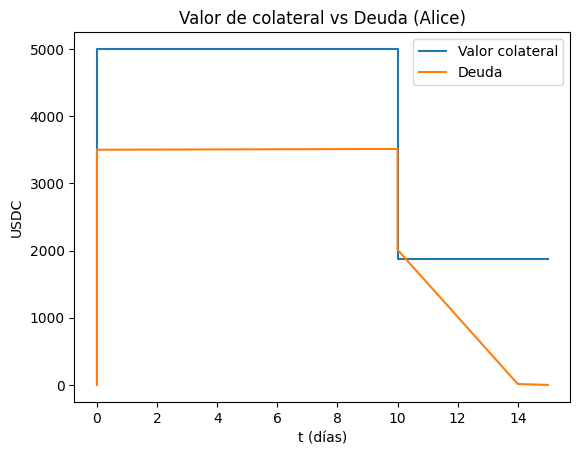

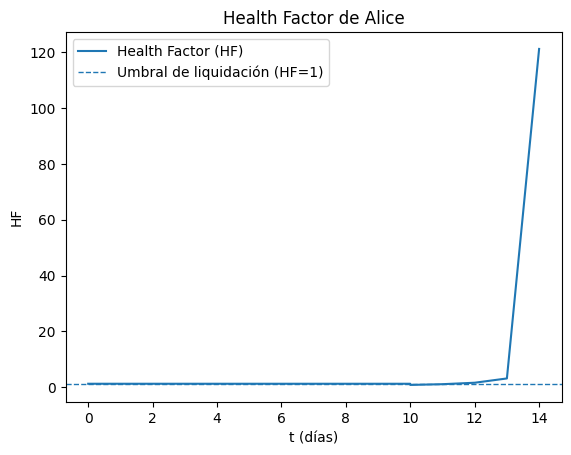

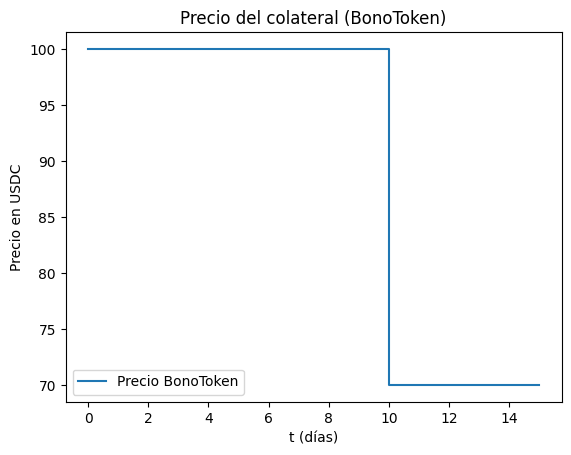

In [7]:
# file: tokenized_lending_sim.py
"""
Simulación educativa de préstamo con colateral tokenizado (DeFi) con visualización.

Incluye:
- Token fungible simple (ledger en memoria).
- Oráculo de precios (precio del colateral en términos del token de préstamo).
- Protocolo de lending con LTV, umbral de liquidación, bonus para liquidador,
  interés simple (para clase) y factor de salud (HF).
- Eventos y trazas para graficar: precio, valor de colateral, deuda, HF.

Requisitos: pandas, matplotlib.

Notas de diseño (por qué):
- Se usa interés simple diario para que el crecimiento sea fácil de explicar.
- `liq_threshold` > `ltv` para permitir margen antes de liquidar.
- `liq_bonus` incentiva a liquidadores y muestra el trade‑off del sistema.
"""
from __future__ import annotations
from dataclasses import dataclass, field
from typing import Dict, List, Tuple
import math
import pandas as pd
import matplotlib.pyplot as plt


# === Excepciones de dominio ===
class InsufficientFunds(Exception):
    pass


class CollateralError(Exception):
    pass


# === Modelo base ===
@dataclass
class Token:
    """Token fungible con balances por cuenta."""
    name: str
    ledger: Dict[str, float] = field(default_factory=dict)

    def mint(self, user: str, amount: float) -> None:
        if amount < 0:
            raise ValueError("mint amount must be non-negative")
        self.ledger[user] = self.ledger.get(user, 0.0) + float(amount)

    def transfer(self, sender: str, receiver: str, amount: float) -> None:
        if amount < 0:
            raise ValueError("transfer amount must be non-negative")
        if self.ledger.get(sender, 0.0) + 1e-9 < amount:
            raise InsufficientFunds(
                f"Fondos insuficientes en {sender} para transferir {amount} {self.name}"
            )
        self.ledger[sender] = self.ledger.get(sender, 0.0) - float(amount)
        self.ledger[receiver] = self.ledger.get(receiver, 0.0) + float(amount)

    def balance_of(self, user: str) -> float:
        return float(self.ledger.get(user, 0.0))


@dataclass
class PriceOracle:
    """Oráculo de precios (precio del colateral en el token de préstamo)."""
    prices: Dict[str, float]

    def get_price(self, token: Token) -> float:
        if token.name not in self.prices:
            raise KeyError(f"No hay precio para {token.name}")
        return float(self.prices[token.name])

    def set_price(self, token: Token, price: float) -> None:
        self.prices[token.name] = float(price)


@dataclass
class LendingProtocol:
    """Protocolo de préstamo con colateral único y un token de deuda."""
    collateral_token: Token
    loan_token: Token
    oracle: PriceOracle
    ltv: float = 0.8
    liq_threshold: float = 0.85
    liq_bonus: float = 0.08
    annual_borrow_rate: float = 0.12

    collateral_locked: Dict[str, float] = field(default_factory=dict)
    debt: Dict[str, float] = field(default_factory=dict)
    events: List[Dict] = field(default_factory=list)

    def _collateral_value(self, user: str) -> float:
        return self.collateral_locked.get(user, 0.0) * self.oracle.get_price(self.collateral_token)

    def max_borrowable(self, user: str) -> float:
        return self._collateral_value(user) * self.ltv - self.debt.get(user, 0.0)

    def health_factor(self, user: str) -> float:
        d = self.debt.get(user, 0.0)
        if d <= 0:
            return math.inf
        return (self._collateral_value(user) * self.liq_threshold) / d

    def deposit_collateral(self, user: str, amount: float) -> None:
        if amount <= 0:
            raise ValueError("El depósito debe ser > 0")
        self.collateral_token.transfer(user, "protocol", amount)
        self.collateral_locked[user] = self.collateral_locked.get(user, 0.0) + amount
        self.events.append({"type": "deposit", "user": user, "amount": amount})

    def withdraw_collateral(self, user: str, amount: float) -> None:
        if amount <= 0:
            raise ValueError("El retiro debe ser > 0")
        if self.collateral_locked.get(user, 0.0) + 1e-9 < amount:
            raise CollateralError("No hay colateral suficiente bloqueado")
        self.collateral_locked[user] -= amount
        if self.debt.get(user, 0.0) > 0 and self.max_borrowable(user) < 0:
            self.collateral_locked[user] += amount
            raise CollateralError("Retiro haría que el préstamo exceda el LTV permitido")
        self.collateral_token.transfer("protocol", user, amount)
        self.events.append({"type": "withdraw", "user": user, "amount": amount})

    def borrow(self, user: str, amount: float) -> None:
        if amount <= 0:
            raise ValueError("El préstamo debe ser > 0")
        if amount - 1e-9 > self.max_borrowable(user):
            raise CollateralError("Colateral insuficiente para este préstamo (LTV)")
        if self.loan_token.balance_of("protocol") + 1e-9 < amount:
            raise InsufficientFunds("El protocolo no tiene liquidez suficiente")
        self.loan_token.transfer("protocol", user, amount)
        self.debt[user] = self.debt.get(user, 0.0) + amount
        self.events.append({"type": "borrow", "user": user, "amount": amount})

    def repay(self, user: str, amount: float) -> None:
        if amount <= 0:
            raise ValueError("El repago debe ser > 0")
        if self.debt.get(user, 0.0) <= 0:
            return
        repay_amount = min(amount, self.debt[user])
        self.loan_token.transfer(user, "protocol", repay_amount)
        self.debt[user] -= repay_amount
        self.events.append({"type": "repay", "user": user, "amount": repay_amount})

    def accrue_interest(self, days: float = 1.0) -> None:
        """Interés simple (para clase): comprensión > exactitud matemática."""
        daily_rate = self.annual_borrow_rate / 365.0
        for user, d in list(self.debt.items()):
            if d > 0:
                interest = d * daily_rate * days
                self.debt[user] = d + interest
                if interest > 0:
                    self.events.append({
                        "type": "interest", "user": user, "amount": interest, "days": days
                    })

    def liquidate(
        self,
        target_user: str,
        liquidator: str,
        repay_amount: float,
        close_factor: float = 0.5,
    ) -> Tuple[float, float]:
        """Liquida parte de la deuda cuando HF < 1. Devuelve (deuda_pagada, colateral_incautado)."""
        hf = self.health_factor(target_user)
        if hf >= 1.0:
            raise CollateralError("La posición no es liquidable (HF >= 1)")
        if self.debt.get(target_user, 0.0) <= 0:
            return 0.0, 0.0
        max_repay = self.debt[target_user] * close_factor
        repay = min(repay_amount, max_repay, self.debt[target_user])
        if repay <= 0:
            return 0.0, 0.0

        self.loan_token.transfer(liquidator, "protocol", repay)
        self.debt[target_user] -= repay

        price = self.oracle.get_price(self.collateral_token)
        collateral_to_seize = (repay / price) * (1 + self.liq_bonus)
        collateral_to_seize = min(collateral_to_seize, self.collateral_locked.get(target_user, 0.0))

        self.collateral_locked[target_user] -= collateral_to_seize
        self.collateral_token.transfer("protocol", liquidator, collateral_to_seize)

        self.events.append({
            "type": "liquidation",
            "target": target_user,
            "liquidator": liquidator,
            "debt_repaid": repay,
            "collateral_seized": collateral_to_seize,
            "hf_before": hf,
        })
        return repay, collateral_to_seize


# === Demo con visualización ===
def run_simulation_and_plot():
    usdc = Token("USDC")
    bono = Token("BonoToken")
    oracle = PriceOracle({"BonoToken": 100.0})
    proto = LendingProtocol(
        collateral_token=bono,
        loan_token=usdc,
        oracle=oracle,
        ltv=0.8,
        liq_threshold=0.85,
        liq_bonus=0.08,
        annual_borrow_rate=0.12,
    )

    # Saldos iniciales
    usdc.mint("protocol", 100_000)
    usdc.mint("Bob", 10_000)  # potencial liquidador
    bono.mint("Alice", 100)

    rows: List[Dict] = []

    def snapshot(t: int, label: str):
        rows.append({
            "t": t,
            "evento": label,
            "precio_bono": oracle.get_price(bono),
            "colateral_alice": proto.collateral_locked.get("Alice", 0.0),
            "valor_colateral_alice": proto.collateral_locked.get("Alice", 0.0) * oracle.get_price(bono),
            "deuda_alice": proto.debt.get("Alice", 0.0),
            "HF_alice": proto.health_factor("Alice"),
            "USDC_protocol": usdc.balance_of("protocol"),
            "Bono_protocol": bono.balance_of("protocol"),
        })

    t = 0
    snapshot(t, "inicio")

    # Movimiento principal
    proto.deposit_collateral("Alice", 50)
    snapshot(t, "depósito")
    proto.borrow("Alice", 3500)
    snapshot(t, "préstamo")

    # Intereses 10 días
    for i in range(1, 11):
        proto.accrue_interest(days=1)
        t += 1
        snapshot(t, f"interés día {i}")

    # Shock de precio
    oracle.set_price(bono, 70.0)
    snapshot(t, "shock precio 70")

    # Liquidación si aplica
    if proto.health_factor("Alice") < 1.0:
        repaid, seized = proto.liquidate("Alice", "Bob", repay_amount=1500, close_factor=0.5)
        snapshot(t, f"liquidación repaid={repaid:.2f} seized={seized:.2f}")

    # Repagos posteriores
    for i in range(1, 6):
        proto.accrue_interest(days=1)
        t += 1
        debt = proto.debt.get("Alice", 0.0)
        if debt > 0:
            pay = min(500.0, debt, usdc.balance_of("Alice"))
            if pay > 0:
                proto.repay("Alice", pay)
        snapshot(t, f"post-liq día {i}")

    df = pd.DataFrame(rows)

    # Gráfico 1: valor de colateral vs deuda
    plt.figure()
    plt.plot(df["t"], df["valor_colateral_alice"], label="Valor colateral")
    plt.plot(df["t"], df["deuda_alice"], label="Deuda")
    plt.title("Valor de colateral vs Deuda (Alice)")
    plt.xlabel("t (días)")
    plt.ylabel("USDC")
    plt.legend()
    plt.show()

    # Gráfico 2: Health Factor
    plt.figure()
    plt.plot(df["t"], df["HF_alice"], label="Health Factor (HF)")
    plt.axhline(1.0, linestyle="--", linewidth=1, label="Umbral de liquidación (HF=1)")
    plt.title("Health Factor de Alice")
    plt.xlabel("t (días)")
    plt.ylabel("HF")
    plt.legend()
    plt.show()

    # Gráfico 3: Precio del colateral
    plt.figure()
    plt.plot(df["t"], df["precio_bono"], label="Precio BonoToken")
    plt.title("Precio del colateral (BonoToken)")
    plt.xlabel("t (días)")
    plt.ylabel("Precio en USDC")
    plt.legend()
    plt.show()

    return df, proto


if __name__ == "__main__":
    run_simulation_and_plot()



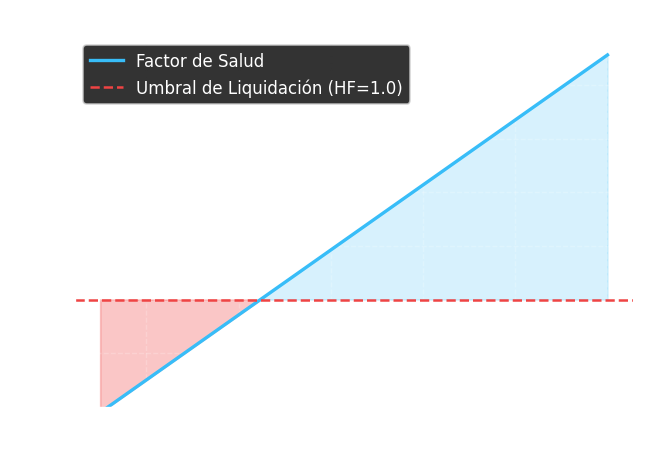

In [8]:
# This cell builds an interactive HTML page (for Google Colab / Jupyter) that
# explains "DeFi Collateralization" using the user's text. It includes:
# - Theme toggle (light/dark)
# - Animated bubble background
# - Collapsible sections + sticky index
# - An interactive Health Factor calculator with sliders.
# - A chart generated with Matplotlib showing the Health Factor vs. Collateral Price.
#
# The result is also saved as an .html file for download.

from IPython.display import display, HTML
import matplotlib.pyplot as plt
import numpy as np
import io, base64

# -------------------- Utilities --------------------
def fig_to_base64(dpi=120):
    """Encode current Matplotlib figure to base64 PNG and close the figure."""
    buf = io.BytesIO()
    plt.savefig(buf, format="png", dpi=dpi, bbox_inches="tight", transparent=True)
    plt.close()
    buf.seek(0)
    return base64.b64encode(buf.read()).decode("ascii")

# -------------------- Figure: Health Factor vs. Price --------------------
# Constants from the scenario
DEBT_AMOUNT = 3500.86
COLLATERAL_AMOUNT = 50  # BonoTokens
LIQUIDATION_THRESHOLD = 0.85

# Price range for the chart
price_range = np.linspace(120, 65, 100)

# Calculate Health Factor for each price
collateral_value = price_range * COLLATERAL_AMOUNT
health_factor = (collateral_value * LIQUIDATION_THRESHOLD) / DEBT_AMOUNT

# Create the plot
plt.style.use('dark_background')
fig, ax = plt.subplots(figsize=(6, 4))
ax.plot(price_range, health_factor, color='#38bdf8', linewidth=2, label='Factor de Salud')
ax.axhline(y=1.0, color='#ef4444', linestyle='--', linewidth=1.5, label='Umbral de Liquidación (HF=1.0)')

# Fill the "danger zone"
ax.fill_between(price_range, health_factor, 1.0, where=(health_factor < 1.0), color='#ef4444', alpha=0.3, interpolate=True)
ax.fill_between(price_range, health_factor, 1.0, where=(health_factor >= 1.0), color='#38bdf8', alpha=0.2, interpolate=True)


ax.set_xlabel("Precio del BonoToken (en USDC)")
ax.set_ylabel("Factor de Salud (HF)")
ax.set_title("Relación entre Precio del Colateral y Salud del Préstamo")
ax.legend()
ax.grid(True, linestyle='--', alpha=0.2)
ax.set_ylim(bottom=0.8) # Focus on the critical area
fig.patch.set_alpha(0.0) # Transparent background
ax.patch.set_alpha(0.0)

img_health_factor_chart = fig_to_base64()


# -------------------- Content Blocks (From user's text) --------------------
intro_html = r"""
<p>Este es un desglose del ciclo de vida de un préstamo, desde el depósito hasta una posible liquidación, usando los personajes de la simulación: Alice (la prestataria) y Bob (el liquidador).</p>
<h4>Actores y Componentes</h4>
<div class="grid-2">
    <div>
        <ul>
            <li><strong>Alice:</strong> La usuaria que quiere pedir un préstamo. Posee BonoToken que usará como colateral.</li>
            <li><strong>Bob:</strong> Un participante del mercado que busca oportunidades para liquidar posiciones de riesgo y obtener una ganancia.</li>
            <li><strong>Protocolo de Préstamo:</strong> El "contrato inteligente" que gestiona los depósitos, préstamos y liquidaciones.</li>
        </ul>
    </div>
    <div>
        <ul>
            <li><strong>Tokens:</strong>
                <ul>
                    <li><code>BonoToken</code>: El activo que Alice deposita como colateral.</li>
                    <li><code>USDC</code>: El activo que Alice pide prestado (una stablecoin).</li>
                </ul>
            </li>
            <li><strong>Oráculo de Precios:</strong> Un servicio que informa al protocolo el precio actual del BonoToken en USDC.</li>
        </ul>
    </div>
</div>
"""

step1_html = r"""
<p>Alice quiere pedir prestados 3,500 USDC. Para ello, primero debe depositar una garantía en el protocolo. Ella deposita <strong>50 BonoToken</strong>.</p>
<pre><code># Alice deposita 50 de sus 100 BonoToken
proto.deposit_collateral("Alice", 50)</code></pre>
<p>Visualmente, esto se representa como:</p>
<pre><code>+-----------------+      Depósito de 50 BonoToken      +-----------------------+
|  Alice          | --------------------------------------> |  Protocolo de Préstamo  |
|-----------------|                                         |-----------------------|
| BonoToken: 100  |                                         | Colateral de Alice:   |
| USDC: 0         |                                         |   BonoToken: 50       |
+-----------------+                                         +-----------------------+</code></pre>
"""

step2_html = r"""
<p>El protocolo necesita saber cuánto valen los BonoToken de Alice para determinar cuánto puede pedir prestado.</p>
<ul>
    <li>El Oráculo informa que <strong>1 BonoToken = 100 USDC</strong>.</li>
    <li>El Valor del Colateral de Alice es: 50 BonoToken * 100 USDC = <strong>5,000 USDC</strong>.</li>
    <li>El protocolo tiene un <strong>LTV (Loan-to-Value) del 80%</strong>. Esto significa que Alice puede pedir prestado hasta el 80% del valor de su colateral.</li>
    <li>Máximo Préstamo: 5,000 USDC * 0.80 = <strong>4,000 USDC</strong>.</li>
</ul>
<p>Alice decide pedir 3,500 USDC, lo cual está dentro de su límite.</p>
<pre><code># Alice pide prestados 3500 USDC
proto.borrow("Alice", 3500)</code></pre>
<pre><code>+-----------------------+      Préstamo de 3500 USDC       +-----------------+
|  Protocolo de Préstamo  | --------------------------------------> |  Alice          |
|-----------------------|                                         |-----------------|
| Deuda de Alice: 3500  |                                         | BonoToken: 50   |
| Colateral: 50 BonoToken |                                         | USDC: 3500      |
+-----------------------+                                         +-----------------+</code></pre>
"""

step3_html = r"""
<p>El <strong>Factor de Salud (HF)</strong> es una métrica crucial que indica la seguridad de la posición de Alice. Si cae por debajo de 1, su colateral puede ser liquidado.</p>
<p style="text-align:center; font-size: 1.1em; font-weight: bold;">
    $$ HF = \frac{\text{Valor del Colateral} \times \text{Umbral de Liquidación}}{\text{Deuda}} $$
</p>
<ul>
    <li><strong>Umbral de Liquidación:</strong> 85% (definido como <code>liq_threshold=0.85</code>).</li>
</ul>
<p>El HF inicial de Alice es <strong>1.21</strong>, un valor saludable.</p>

<div class="demo-card">
  <h4>Calculadora de Préstamo y Factor de Salud</h4>
  <p>Ajusta los deslizantes para ver cómo cambian las métricas en tiempo real. Observa cómo el Factor de Salud se vuelve rojo cuando cae por debajo de 1.0.</p>
  <div class="sliders">
    <label>Precio del Colateral (BonoToken): <span id="priceLabel">100</span> USDC</label>
    <input id="rngPrice" type="range" min="60" max="120" value="100" step="1">

    <label>Cantidad de Colateral: <span id="collateralLabel">50</span> BonoTokens</label>
    <input id="rngCollateral" type="range" min="10" max="100" value="50" step="1">

    <label>Monto del Préstamo: <span id="debtLabel">3500</span> USDC</label>
    <input id="rngDebt" type="range" min="1000" max="5000" value="3500" step="100">
  </div>
  <hr style="border-color: var(--border); margin: 1rem 0;">
  <div class="calc-results">
    <div>Valor Total Colateral: <strong id="collateralValue">5000 USDC</strong></div>
    <div>Máximo Préstamo (80% LTV): <strong id="maxLoan">4000 USDC</strong></div>
    <div>Factor de Salud: <strong id="healthFactor">1.21</strong></div>
  </div>
</div>
"""

step4_html = r"""
<p>El mercado es volátil. El precio del <code>BonoToken</code> cae de 100 a <strong>70 USDC</strong>.</p>
<pre><code># El oráculo actualiza el precio
oracle.set_price(bono, 70.0)</code></pre>
<ul>
    <li>Nuevo Valor del Colateral: 50 BonoToken * 70 USDC = <strong>3,500 USDC</strong>.</li>
    <li>La Deuda de Alice sigue siendo ~3,500 USDC.</li>
    <li>Nuevo Factor de Salud: (3500 * 0.85) / 3500.86 ≈ <strong>0.99</strong></li>
</ul>
<p><strong>¡Alerta!</strong> El Factor de Salud de Alice ha caído por debajo de 1. Su posición ahora es liquidable para proteger al protocolo de insolvencia.</p>
<div class="img-wrap">
  <img src="data:image/png;base64,{img_health_factor_chart}" alt="Gráfico del Factor de Salud vs Precio" loading="lazy" decoding="async" width="550">
  <figcaption>Este gráfico muestra cómo el Factor de Salud disminuye a medida que el precio del colateral cae, cruzando el umbral de liquidación.</figcaption>
</div>
"""

step5_html = r"""
<p>Bob, el liquidador, detecta la posición de riesgo. Él puede pagar una parte de la deuda de Alice a cambio de recibir una porción del colateral con un descuento (el "bono de liquidación").</p>
<ul>
    <li>Bob decide pagar <strong>1,500 USDC</strong> de la deuda de Alice.</li>
    <li><strong>Bono de Liquidación: 8%</strong> (<code>liq_bonus=0.08</code>). Bob recibe un 8% extra de colateral.</li>
    <li>Colateral para Bob: (1500 / 70) * (1 + 0.08) ≈ <strong>23.14 BonoToken</strong>.</li>
</ul>
<pre><code># Bob liquida una parte de la deuda de Alice
proto.liquidate("Alice", "Bob", repay_amount=1500, ...)</code></pre>
<p>El proceso visual de liquidación es:</p>
<pre><code>+-----------------+
|       Bob       |
+-----------------+
        |   ^
(1) Paga 1500 USDC    |   | (3) Recibe 23.14 BonoToken
        v   |
+-------------------------------------------------------------+
|                     Protocolo de Préstamo                   |
|-------------------------------------------------------------|
|  - Reduce la deuda de Alice en 1500 USDC.                   |
|  - Toma 23.14 BonoToken del colateral de Alice y los        |
|    envía a Bob.                                             |
|                                                             |
|  Estado de Alice (después):                                 |
|  - Deuda: ~2000 USDC                                        |
|  - Colateral: 50 - 23.14 = 26.86 BonoToken                  |
+-------------------------------------------------------------+</code></pre>
"""

conclusion_html = r"""
<ul>
    <li><strong>Alice</strong> ha perdido una parte significativa de su colateral, pero su deuda también se ha reducido. Su Factor de Salud ha vuelto a un nivel seguro (por encima de 1), salvando el resto de su posición.</li>
    <li><strong>Bob</strong> ha obtenido un beneficio inmediato al adquirir BonoToken por debajo de su valor de mercado.</li>
    <li><strong>El Protocolo</strong> se ha mantenido solvente al reducir una posición de riesgo antes de que la deuda superara el valor del colateral.</li>
</ul>
<p>Este ciclo de colateralización, monitoreo del HF y liquidación es el mecanismo de defensa fundamental que permite a los protocolos de préstamo DeFi operar de manera autónoma y segura.</p>
"""


# -------------------- HTML Template --------------------
html_template = """
<!DOCTYPE html>
<html lang="es" data-theme="dark">
<head>
  <meta charset="UTF-8" />
  <meta name="viewport" content="width=device-width, initial-scale=1.0" />
  <title>Proceso de Colateralización en DeFi</title>
  <link href="https://fonts.googleapis.com/css2?family=Inter:wght@300;400;700;900&display=swap" rel="stylesheet" />
  <link href="https://cdnjs.cloudflare.com/ajax/libs/font-awesome/6.5.0/css/all.min.css" rel="stylesheet" />
  <script>
    window.MathJax = {{
      tex: {{ inlineMath: [['$','$'], ['\\\\(','\\\\)']], displayMath: [['$$','$$']] }},
      svg: {{ fontCache: 'global' }}
    }};
  </script>
  <script async src="https://cdn.jsdelivr.net/npm/mathjax@3/es5/tex-svg.js"></script>
  <style>
    :root {{
      --bg-primary: linear-gradient(135deg,#0b1220 0%,#0f172a 100%);
      --bg-secondary: rgba(15,23,42,.92);
      --bg-tertiary: rgba(2,6,23,.88);
      --text-primary: #e2e8f0;
      --text-secondary: #cbd5e1;
      --accent: #38bdf8;
      --border: rgba(148,163,184,.28);
      --radius: 22px;
      --shadow: 0 16px 36px rgba(0,0,0,.40);
      --trans: all .35s cubic-bezier(.25,.8,.25,1);
      --bubble-core: rgba(56,189,248,.65);
      --bubble-glow: rgba(56,189,248,.35);
    }}
    html[data-theme="light"] {{
      --bg-primary: linear-gradient(135deg,#e0f2fe 0%,#f0f9ff 100%);
      --bg-secondary: rgba(255,255,255,.94);
      --bg-tertiary: rgba(240,249,255,.98);
      --text-primary: #0f172a;
      --text-secondary: #334155;
      --accent: #0ea5e9;
      --border: rgba(2,132,199,.30);
      --shadow: 0 16px 36px rgba(2,6,23,.18);
      --bubble-core: rgba(255,255,255,.55);
      --bubble-glow: rgba(14,165,233,.25);
    }}
    * {{ box-sizing: border-box; }}
    body {{
      margin: 0; background: var(--bg-primary); color: var(--text-primary);
      font-family: Inter, system-ui, -apple-system, Segoe UI, Roboto, sans-serif;
      font-size: 18px; line-height: 1.8; padding-bottom: 28px;
    }}
    #app {{ position: relative; min-height: 100vh; }}
    .particles {{ position:absolute; inset:0; z-index:0; pointer-events:none; overflow:hidden; }}
    .particle {{
      position:absolute; border-radius:50%;
      background: radial-gradient(circle at 30% 30%, var(--bubble-core), transparent 60%);
      box-shadow: 0 0 12px 2px var(--bubble-glow), 0 0 24px 6px rgba(255,255,255,.08);
      filter: blur(0.2px); animation: floaty 26s infinite linear; opacity: 0;
    }}
    @keyframes floaty {{
      0% {{ transform: translateY(110%) rotate(0deg); opacity: 0; }}
      10% {{ opacity: .75; }} 90% {{ opacity: .75; }}
      100% {{ transform: translateY(-15%) rotate(360deg); opacity: 0; }}
    }}
    .topbar {{
      position: sticky; top: 10px; z-index: 2; display:flex; align-items:center; justify-content:space-between;
      margin: 14px auto 0; padding: 12px 14px; max-width: 1120px;
      background: var(--bg-secondary); border: 1.6px solid var(--border);
      border-radius: var(--radius); box-shadow: var(--shadow); backdrop-filter: blur(12px); gap: 10px; flex-wrap:wrap;
    }}
    .brand {{ font-weight: 900; letter-spacing: .35px; font-size: 20px; display:flex; gap:8px; align-items:center; }}
    .actions {{ display:flex; align-items:center; gap: 10px; position:relative; flex-wrap:wrap; }}
    .menu-btn {{
      display:inline-flex; align-items:center; gap:.55rem; padding:.68rem 1.05rem; border-radius:999px;
      cursor:pointer; border:1px solid var(--border); background: var(--bg-tertiary);
      transition: var(--trans); font-weight:800; text-decoration:none; color: var(--text-primary);
    }}
    .menu-btn:hover {{ transform: translateY(-1px); }}
    .menu-list {{
      position:absolute; top:110%; left:0; min-width:260px; background: var(--bg-secondary);
      border:1.5px solid var(--border); border-radius:14px; box-shadow: var(--shadow);
      padding:.6rem; display:none; max-height:60vh; overflow:auto; z-index:10;
    }}
    .menu-link {{ display:block; padding:.65rem .8rem; border-radius:10px; text-decoration:none; color: var(--text-primary); font-size: 16px; }}
    .menu-link:hover {{ background: var(--bg-tertiary); }}
    .theme-toggle {{
      display:inline-flex; align-items:center; gap:.6rem; padding:.72rem 1.1rem; border-radius:999px;
      cursor:pointer; user-select:none; border:1.5px solid var(--border); background: var(--bg-tertiary);
      transition: var(--trans); font-weight: 900; color: var(--text-primary);
    }}
    .theme-toggle:hover {{ transform: translateY(-1px); }}

    .container {{ position:relative; z-index:1; max-width:1120px; margin: 14px auto 20px; padding: 0 14px; }}
    .page-title {{
      text-align:center; margin: 16px 0 20px; font-weight: 900; font-size: clamp(28px, 4vw, 42px);
      background: linear-gradient(135deg, var(--accent), #67e8f9); -webkit-background-clip: text; -webkit-text-fill-color: transparent;
      letter-spacing: .4px; padding: 0 20px;
    }}
    .topic-card {{
      background: var(--bg-secondary); border: 1.6px solid var(--border); border-radius: var(--radius);
      box-shadow: var(--shadow); overflow:hidden; margin: 16px 0;
    }}
    .topic-header {{ display:flex; justify-content:space-between; align-items:center; padding: 18px 22px; cursor:pointer; }}
    .topic-title {{ font-weight: 900; font-size: 20px; }}
    .expand-icon {{ transition: var(--trans); color: var(--text-secondary); }}
    .topic-card.open .expand-icon {{ transform: rotate(180deg); color: var(--accent); }}
    .topic-content {{ max-height:0; overflow:hidden; transition: max-height 1s ease, padding .4s ease; background: var(--bg-tertiary); }}
    .topic-card.open .topic-content {{ max-height: 8000px; padding: 16px 22px; }}
    .topic-content p, .topic-content ul, .topic-content ol {{ color: var(--text-secondary); margin: .65rem 0; }}
    .topic-content ul, .topic-content ol {{ padding-left: 25px; }}
    .topic-content li {{ margin:.38rem 0; }}
    .topic-content code {{ background: rgba(148,163,184,.18); padding: .12rem .4rem; border-radius: 6px; font-family: 'Courier New', Courier, monospace; }}
    .topic-content pre {{ background: rgba(0,0,0,0.2); padding: 1rem; border-radius: 12px; white-space: pre; overflow-x: auto;}}
    .grid-2 {{ display:grid; grid-template-columns: repeat(auto-fit, minmax(280px, 1fr)); gap: 18px; }}
    .img-wrap {{ text-align:center; margin: 20px auto; }}
    figcaption {{ font-size: 14px; opacity:.85; }}

    .demo-card {{ background: var(--bg-secondary); border: 1px dashed var(--border); border-radius: 16px; padding: 16px 20px; margin: 16px 0; }}
    .sliders label {{ display:block; margin: 10px 0; font-weight: 700; }}
    input[type="range"] {{ width: 100%; margin-top: 4px;}}
    .calc-results {{ display: grid; grid-template-columns: 1fr 1fr; gap: 12px; margin-top: 10px; font-size: 16px; }}
    .calc-results strong {{ font-weight: 900; color: var(--accent); }}
    #healthFactor {{ transition: color 0.3s; }}

    footer {{ text-align:center; color: var(--text-secondary); opacity:.92; margin: 22px 0 8px; font-weight:800; font-size: 14px; }}
  </style>
</head>
<body>
  <div id="app">
    <div class="particles" id="particles"></div>

    <div class="topbar">
      <div class="brand"><i class="fa-solid fa-shield-halved"></i> Simulación DeFi</div>
      <div class="actions">
        <div class="dropdown" style="position:relative;">
          <button id="menuBtn" class="menu-btn" aria-haspopup="true" aria-expanded="false">
            <i class="fa-solid fa-list"></i> Pasos del Proceso <i class="fa-solid fa-chevron-down"></i>
          </button>
          <div id="menuList" class="menu-list" role="menu">
            <a class="menu-link" href="#intro">1. Actores y Componentes</a>
            <a class="menu-link" href="#step1">2. Depósito de Colateral</a>
            <a class="menu-link" href="#step2">3. Solicitud de Préstamo</a>
            <a class="menu-link" href="#step3">4. Factor de Salud (HF)</a>
            <a class="menu-link" href="#step4">5. Shock de Mercado</a>
            <a class="menu-link" href="#step5">6. Liquidación</a>
            <a class="menu-link" href="#conclusion">7. Conclusión</a>
          </div>
        </div>
      </div>
      <button id="themeBtn" class="theme-toggle" title="Cambiar tema" aria-pressed="true">
        <i id="themeIcon" class="fa-solid fa-sun" aria-hidden="true"></i>
        <span id="themeLabel" class="theme-label">Tema: Oscuro</span>
      </button>
    </div>

    <main class="container">
      <h1 class="page-title">Proceso de Colateralización en un Protocolo de Préstamo DeFi</h1>

      <section id="intro" class="topic-card open">
        <div class="topic-header" role="button"><span class="topic-title">1. Actores y Componentes Clave</span><i class="fa-solid fa-chevron-down expand-icon"></i></div>
        <div class="topic-content">{intro_html}</div>
      </section>

      <section id="step1" class="topic-card open">
        <div class="topic-header" role="button"><span class="topic-title">2. Paso 1: Depósito del Colateral</span><i class="fa-solid fa-chevron-down expand-icon"></i></div>
        <div class="topic-content">{step1_html}</div>
      </section>

      <section id="step2" class="topic-card">
        <div class="topic-header" role="button"><span class="topic-title">3. Paso 2: Solicitud del Préstamo</span><i class="fa-solid fa-chevron-down expand-icon"></i></div>
        <div class="topic-content">{step2_html}</div>
      </section>

      <section id="step3" class="topic-card">
        <div class="topic-header" role="button"><span class="topic-title">4. Paso 3: Monitoreo del Factor de Salud (HF)</span><i class="fa-solid fa-chevron-down expand-icon"></i></div>
        <div class="topic-content">{step3_html}</div>
      </section>

      <section id="step4" class="topic-card">
        <div class="topic-header" role="button"><span class="topic-title">5. Paso 4: Shock de Mercado (Caída de Precio)</span><i class="fa-solid fa-chevron-down expand-icon"></i></div>
        <div class="topic-content">{step4_html}</div>
      </section>

      <section id="step5" class="topic-card">
        <div class="topic-header" role="button"><span class="topic-title">6. Paso 5: Liquidación</span><i class="fa-solid fa-chevron-down expand-icon"></i></div>
        <div class="topic-content">{step5_html}</div>
      </section>

      <section id="conclusion" class="topic-card">
        <div class="topic-header" role="button"><span class="topic-title">7. Conclusión del Proceso</span><i class="fa-solid fa-chevron-down expand-icon"></i></div>
        <div class="topic-content">{conclusion_html}</div>
      </section>

      <footer>Material elaborado por el profesor Sergio Gevatschnaider</footer>
    </main>

    <script>
      (function() {{
        const root = document.getElementById('app');
        const doc  = document.documentElement;

        // ----- Theme (persistente) -----
        const themeBtn = root.querySelector('#themeBtn');
        const themeIcon = root.querySelector('#themeIcon');
        const themeLabel = root.querySelector('#themeLabel');
        function setTheme(t) {{
          doc.setAttribute('data-theme', t);
          try {{ localStorage.setItem('defi.theme', t); }} catch(e) {{}}
          const dark = (t === 'dark');
          themeIcon.className = dark ? 'fa-solid fa-sun' : 'fa-solid fa-moon';
          themeLabel.textContent = 'Tema: ' + (dark ? 'Oscuro' : 'Claro');
        }}
        const saved = (typeof localStorage !== 'undefined') ? localStorage.getItem('defi.theme') : 'dark';
        setTheme(saved || 'dark');
        themeBtn.addEventListener('click', () => {{
          const next = (doc.getAttribute('data-theme') === 'dark') ? 'light' : 'dark';
          setTheme(next);
        }});

        // ----- Partículas -----
        const pContainer = root.querySelector('#particles');
        for (let i = 0; i < 46; i++) {{
          const p = document.createElement('div');
          p.className = 'particle';
          const size = (Math.random() * 14 + 6);
          p.style.cssText = `width:${{size}}px; height:${{size}}px; left:${{Math.random()*100}}%; bottom:${{-12+Math.random()*12}}%; animation-delay:${{Math.random()*-24}}s; animation-duration:${{20+Math.random()*16}}s;`;
          pContainer.appendChild(p);
        }}

        // ----- Menú desplegable y Tarjetas colapsables -----
        const menuBtn = root.querySelector('#menuBtn'), menuList = root.querySelector('#menuList');
        menuBtn.addEventListener('click', e => {{ e.stopPropagation(); menuList.style.display = 'block'; }});
        document.addEventListener('click', () => {{ menuList.style.display = 'none'; }});
        root.querySelectorAll('.menu-link').forEach(a => a.addEventListener('click', e => {{
            e.preventDefault(); e.stopPropagation();
            const target = document.querySelector(a.getAttribute('href'));
            if(target) window.scrollTo({{ top: target.getBoundingClientRect().top + window.scrollY - 80, behavior: 'smooth' }});
            menuList.style.display = 'none';
        }}));
        root.querySelectorAll('.topic-header').forEach(h => h.addEventListener('click', () => h.parentElement.classList.toggle('open')));

        // ----- Calculadora Interactiva de Factor de Salud -----
        const rngPrice = document.getElementById('rngPrice');
        const rngCollateral = document.getElementById('rngCollateral');
        const rngDebt = document.getElementById('rngDebt');

        const priceLabel = document.getElementById('priceLabel');
        const collateralLabel = document.getElementById('collateralLabel');
        const debtLabel = document.getElementById('debtLabel');

        const collateralValueDisplay = document.getElementById('collateralValue');
        const maxLoanDisplay = document.getElementById('maxLoan');
        const healthFactorDisplay = document.getElementById('healthFactor');

        const LTV = 0.80;
        const LIQ_THRESHOLD = 0.85;

        function updateCalculator() {{
            const price = parseFloat(rngPrice.value);
            const collateralAmount = parseFloat(rngCollateral.value);
            const debtAmount = parseFloat(rngDebt.value);

            priceLabel.textContent = price;
            collateralLabel.textContent = collateralAmount;
            debtLabel.textContent = debtAmount;

            const totalCollateralValue = price * collateralAmount;
            const maxLoan = totalCollateralValue * LTV;
            const healthFactor = (totalCollateralValue * LIQ_THRESHOLD) / debtAmount;

            collateralValueDisplay.textContent = totalCollateralValue.toFixed(0) + ' USDC';
            maxLoanDisplay.textContent = maxLoan.toFixed(0) + ' USDC';
            healthFactorDisplay.textContent = healthFactor.toFixed(2);

            if (healthFactor < 1.0) {{
                healthFactorDisplay.style.color = '#ef4444'; // Red
            }} else if (healthFactor < 1.2) {{
                healthFactorDisplay.style.color = '#f59e0b'; // Amber
            }} else {{
                healthFactorDisplay.style.color = '#22c55e'; // Green
            }}
        }}

        [rngPrice, rngCollateral, rngDebt].forEach(el => el.addEventListener('input', updateCalculator));
        updateCalculator(); // Initial call
      }})();
    </script>
  </div>
</body>
</html>
"""

# -------------------- Final Assembly Step --------------------

# Inject the chart image into the correct HTML block
step4_html = step4_html.format(img_health_factor_chart=img_health_factor_chart)

# Inject all content blocks into the main template
final_html_page = html_template.format(
    intro_html=intro_html,
    step1_html=step1_html,
    step2_html=step2_html,
    step3_html=step3_html,
    step4_html=step4_html,
    step5_html=step5_html,
    conclusion_html=conclusion_html
)

# Display the final interactive page
display(HTML(final_html_page))

In [9]:
# This cell builds an interactive HTML page (for Google Colab / Jupyter) that
# explains "Tokenized T-Bills for Corporate Treasury" using the user's text. It includes:
# - Theme toggle (light/dark)
# - Animated bubble background
# - Collapsible sections.
# - An interactive, step-by-step simulation runner that visualizes the Python code's execution.
#
# The result is also saved as an .html file for download.

from IPython.display import display, HTML

# -------------------- Content Blocks (From user's text) --------------------
concept_html = r"""
<p>La tokenización de activos del mundo real, como los Bonos del Tesoro de EE. UU. (T-Bills), abre nuevas posibilidades para la gestión de tesorería corporativa. Al representar estos activos en una blockchain, las empresas pueden usarlos como colateral de alta calidad para operaciones financieras de manera más eficiente, rápida y transparente.</p>
<h4>Diagrama Visual del Flujo</h4>
<p>El proceso central se puede resumir en el siguiente flujo, donde una empresa utiliza sus T-Bills tokenizados como garantía en un contrato inteligente para acceder a liquidez y realizar operaciones financieras.</p>
<pre><code>
        ┌──────────────────────┐
        │ Tesorería de Empresa │
        └─────────┬────────────┘
                  │
   Deposita T-Bills tokenizados
                  │
        ┌────────▼─────────┐
        │ Smart Contract   │
        │(Ledger/Blockchain)
        └────────┬─────────┘
                 │
  ┌──────────────┼──────────────┐
  │              │              │
  ▼              ▼              ▼
Pedir          Pagar        Liquidar
préstamo       proveedores  posiciones
en USDC        en stablecoin  24/7

</code></pre>
"""

simulation_html = r"""
<p>Para ilustrar este proceso, podemos usar una simulación simple en Python. Este código define los activos (<code>T-Bill</code>, <code>USDC</code>), los actores (<code>Empresa</code>, <code>Banco</code>, <code>Proveedor</code>) y el <code>SmartContract</code>, y luego ejecuta las transacciones clave.</p>
<h4>Código de la Simulación</h4>
<pre><code class="language-python">
import time
from datetime import datetime

class Token:
    def __init__(self, name):
        self.name = name
        self.ledger = {}

    def mint(self, user, amount):
        self.ledger[user] = self.ledger.get(user, 0) + amount

    def transfer(self, sender, receiver, amount):
        if self.ledger.get(sender, 0) >= amount:
            self.ledger[sender] -= amount
            self.ledger[receiver] = self.ledger.get(receiver, 0) + amount
            print(f"[{datetime.now().strftime('%H:%M:%S')}] {amount} {self.name} transferidos...")
        else:
            raise Exception("Fondos insuficientes")

# --- Configuración Inicial ---
t_bill = Token("T-Bill")
usdc   = Token("USDC")

t_bill.mint("Empresa", 100)
usdc.mint("Banco", 1000)

# --- Simulación de Tesorería ---
# 1. Empresa deposita colateral en el smart contract.
t_bill.transfer("Empresa", "SmartContract", 50)

# 2. Pide préstamo instantáneo contra su colateral.
usdc.transfer("Banco", "Empresa", 30)

# 3. Paga a un proveedor un domingo en la noche.
usdc.transfer("Empresa", "Proveedor", 10)

# 4. Repaga el préstamo y recupera su colateral.
usdc.transfer("Empresa", "Banco", 30)
t_bill.transfer("SmartContract", "Empresa", 50)
</code></pre>
"""

interactive_runner_html = r"""
<h4>Ejecución Paso a Paso de la Simulación</h4>
<p>Usa los botones para avanzar en la simulación y observa cómo se actualizan los balances de cada actor. Esto demuestra el flujo de activos en tiempo real.</p>
<div class="simulator-grid">
    <!-- Columna de Código -->
    <div class="code-panel">
        <div id="simCodeLine1" class="code-line">t_bill.transfer("Empresa", "SmartContract", 50)</div>
        <div id="simCodeLine2" class="code-line">usdc.transfer("Banco", "Empresa", 30)</div>
        <div id="simCodeLine3" class="code-line">usdc.transfer("Empresa", "Proveedor", 10)</div>
        <div id="simCodeLine4" class="code-line">usdc.transfer("Empresa", "Banco", 30)</div>
        <div id="simCodeLine5" class="code-line">t_bill.transfer("SmartContract", "Empresa", 50)</div>
    </div>
    <!-- Columna de Estado -->
    <div class="state-panel">
        <p><strong>Estado Actual de Balances:</strong></p>
        <table class="balance-table">
            <thead>
                <tr>
                    <th>Actor</th>
                    <th>T-Bill</th>
                    <th>USDC</th>
                </tr>
            </thead>
            <tbody>
                <tr><td>Empresa</td><td id="bal-empresa-tbill">100</td><td id="bal-empresa-usdc">0</td></tr>
                <tr><td>SmartContract</td><td id="bal-sc-tbill">0</td><td id="bal-sc-usdc">0</td></tr>
                <tr><td>Banco</td><td id="bal-banco-tbill">0</td><td id="bal-banco-usdc">1000</td></tr>
                <tr><td>Proveedor</td><td id="bal-prov-tbill">0</td><td id="bal-prov-usdc">0</td></tr>
            </tbody>
        </table>
        <div class="log-panel">
            <strong>Log de Transacciones:</strong>
            <div id="simLog">Presiona "Iniciar" para comenzar...</div>
        </div>
        <div class="sim-controls">
            <button id="startBtn" class="sim-btn">Iniciar</button>
            <button id="nextBtn" class="sim-btn" disabled>Siguiente Paso</button>
            <button id="resetBtn" class="sim-btn">Reiniciar</button>
        </div>
    </div>
</div>
"""


# -------------------- HTML Template --------------------
html_template = """
<!DOCTYPE html>
<html lang="es" data-theme="dark">
<head>
  <meta charset="UTF-8" />
  <meta name="viewport" content="width=device-width, initial-scale=1.0" />
  <title>Tesorería Corporativa con T-Bills Tokenizados</title>
  <link href="https://fonts.googleapis.com/css2?family=Inter:wght@300;400;700;900&family=Fira+Code&display=swap" rel="stylesheet" />
  <link href="https://cdnjs.cloudflare.com/ajax/libs/font-awesome/6.5.0/css/all.min.css" rel="stylesheet" />
  <style>
    :root {{
      --bg-primary: linear-gradient(135deg,#0b1220 0%,#0f172a 100%);
      --bg-secondary: rgba(15,23,42,.92);
      --bg-tertiary: rgba(2,6,23,.88);
      --text-primary: #e2e8f0;
      --text-secondary: #cbd5e1;
      --accent: #22c55e; /* Green for finance */
      --border: rgba(148,163,184,.28);
      --radius: 22px;
      --shadow: 0 16px 36px rgba(0,0,0,.40);
      --trans: all .35s cubic-bezier(.25,.8,.25,1);
      --bubble-core: rgba(34,197,94,.65);
      --bubble-glow: rgba(34,197,94,.35);
    }}
    html[data-theme="light"] {{
      --bg-primary: linear-gradient(135deg,#f0fdf4 0%,#f0f9ff 100%);
      --bg-secondary: rgba(255,255,255,.94);
      --bg-tertiary: rgba(240,252,244,.98);
      --text-primary: #0f172a;
      --text-secondary: #334155;
      --accent: #16a34a;
      --border: rgba(22,163,74,.30);
      --shadow: 0 16px 36px rgba(2,6,23,.18);
      --bubble-core: rgba(255,255,255,.55);
      --bubble-glow: rgba(22,163,74,.25);
    }}
    * {{ box-sizing: border-box; }}
    body {{
      margin: 0; background: var(--bg-primary); color: var(--text-primary);
      font-family: 'Inter', system-ui, sans-serif;
      font-size: 18px; line-height: 1.8; padding-bottom: 28px;
    }}
    #app {{ position: relative; min-height: 100vh; }}
    .particles {{ position:absolute; inset:0; z-index:0; pointer-events:none; overflow:hidden; }}
    .particle {{
      position:absolute; border-radius:50%;
      background: radial-gradient(circle at 30% 30%, var(--bubble-core), transparent 60%);
      box-shadow: 0 0 12px 2px var(--bubble-glow), 0 0 24px 6px rgba(255,255,255,.08);
      filter: blur(0.2px); animation: floaty 26s infinite linear; opacity: 0;
    }}
    @keyframes floaty {{
      0% {{ transform: translateY(110%) rotate(0deg); opacity: 0; }}
      10% {{ opacity: .75; }} 90% {{ opacity: .75; }}
      100% {{ transform: translateY(-15%) rotate(360deg); opacity: 0; }}
    }}
    .topbar {{
      position: sticky; top: 10px; z-index: 2; display:flex; align-items:center; justify-content:space-between;
      margin: 14px auto 0; padding: 12px 14px; max-width: 1120px;
      background: var(--bg-secondary); border: 1.6px solid var(--border);
      border-radius: var(--radius); box-shadow: var(--shadow); backdrop-filter: blur(12px); gap: 10px; flex-wrap:wrap;
    }}
    .brand {{ font-weight: 900; letter-spacing: .35px; font-size: 20px; display:flex; gap:8px; align-items:center; }}
    .theme-toggle {{
      display:inline-flex; align-items:center; gap:.6rem; padding:.72rem 1.1rem; border-radius:999px;
      cursor:pointer; user-select:none; border:1.5px solid var(--border); background: var(--bg-tertiary);
      transition: var(--trans); font-weight: 900; color: var(--text-primary);
    }}
    .container {{ position:relative; z-index:1; max-width:1120px; margin: 14px auto 20px; padding: 0 14px; }}
    .page-title {{
      text-align:center; margin: 16px 0 20px; font-weight: 900; font-size: clamp(28px, 4vw, 42px);
      background: linear-gradient(135deg, var(--accent), #4ade80); -webkit-background-clip: text; -webkit-text-fill-color: transparent;
      letter-spacing: .4px; padding: 0 20px;
    }}
    .topic-card {{
      background: var(--bg-secondary); border: 1.6px solid var(--border); border-radius: var(--radius);
      box-shadow: var(--shadow); overflow:hidden; margin: 16px 0;
    }}
    .topic-header {{ display:flex; justify-content:space-between; align-items:center; padding: 18px 22px; cursor:pointer; }}
    .topic-title {{ font-weight: 900; font-size: 20px; }}
    .expand-icon {{ transition: var(--trans); color: var(--text-secondary); }}
    .topic-card.open .expand-icon {{ transform: rotate(180deg); color: var(--accent); }}
    .topic-content {{ max-height:0; overflow:hidden; transition: max-height 1s ease, padding .4s ease; background: var(--bg-tertiary); }}
    .topic-card.open .topic-content {{ max-height: 8000px; padding: 16px 22px; }}
    .topic-content pre {{ background: rgba(0,0,0,0.2); padding: 1rem; border-radius: 12px; white-space: pre; overflow-x: auto; font-family: 'Fira Code', monospace;}}

    .simulator-grid {{ display: grid; grid-template-columns: repeat(auto-fit, minmax(350px, 1fr)); gap: 20px; }}
    .code-panel, .state-panel {{ background: var(--bg-secondary); padding: 16px; border-radius: 16px; border: 1px solid var(--border); }}
    .code-line {{ padding: 8px 12px; border-radius: 8px; margin: 4px 0; font-family: 'Fira Code', monospace; transition: all 0.3s; }}
    .code-line.active {{ background-color: rgba(34,197,94,0.2); border-left: 4px solid var(--accent); }}
    .balance-table {{ width: 100%; border-collapse: collapse; margin: 12px 0; }}
    .balance-table th, .balance-table td {{ padding: 10px; text-align: left; border-bottom: 1px solid var(--border); }}
    .balance-table th {{ font-weight: 700; }}
    .balance-table td:nth-child(2), .balance-table td:nth-child(3) {{ text-align: center; font-weight: bold; }}
    .log-panel {{ margin-top: 16px; background: rgba(0,0,0,0.2); padding: 12px; border-radius: 8px; min-height: 50px; font-family: 'Fira Code', monospace; font-size: 14px;}}
    .sim-controls {{ margin-top: 16px; display: flex; gap: 10px; }}
    .sim-btn {{ padding: 10px 18px; border: none; border-radius: 8px; font-weight: bold; cursor: pointer; transition: var(--trans); background: var(--bg-tertiary); color: var(--text-primary); border: 1px solid var(--border);}}
    .sim-btn:hover:not(:disabled) {{ background: var(--accent); color: #000; }}
    .sim-btn:disabled {{ opacity: 0.5; cursor: not-allowed; }}

    footer {{ text-align:center; color: var(--text-secondary); opacity:.92; margin: 22px 0 8px; font-weight:800; font-size: 14px; }}
  </style>
</head>
<body>
  <div id="app">
    <div class="particles" id="particles"></div>
    <div class="topbar">
      <div class="brand"><i class="fa-solid fa-landmark"></i> Tesorería Tokenizada</div>
      <button id="themeBtn" class="theme-toggle" title="Cambiar tema">
        <i id="themeIcon" class="fa-solid fa-sun"></i>
        <span id="themeLabel">Tema: Oscuro</span>
      </button>
    </div>
    <main class="container">
      <h1 class="page-title">Tesorería Corporativa con T-Bills Tokenizados</h1>
      <section id="concept" class="topic-card open">
        <div class="topic-header" role="button"><span class="topic-title">1. Concepto y Flujo Visual</span><i class="fa-solid fa-chevron-down expand-icon"></i></div>
        <div class="topic-content">{concept_html}</div>
      </section>
      <section id="simulation" class="topic-card open">
        <div class="topic-header" role="button"><span class="topic-title">2. Simulación del Proceso en Python</span><i class="fa-solid fa-chevron-down expand-icon"></i></div>
        <div class="topic-content">{simulation_html}</div>
      </section>
      <section id="runner" class="topic-card open">
        <div class="topic-header" role="button"><span class="topic-title">3. Simulador Interactivo</span><i class="fa-solid fa-chevron-down expand-icon"></i></div>
        <div class="topic-content">{interactive_runner_html}</div>
      </section>
      <footer>Material elaborado por el profesor Sergio Gevatschnaider</footer>
    </main>
    <script>
      (function() {{
        const root = document.getElementById('app');
        const doc = document.documentElement;
        // Theme Toggle
        const themeBtn = root.querySelector('#themeBtn'), themeIcon = root.querySelector('#themeIcon'), themeLabel = root.querySelector('#themeLabel');
        function setTheme(t) {{
            doc.setAttribute('data-theme', t);
            localStorage.setItem('treasury.theme', t);
            const dark = (t === 'dark');
            themeIcon.className = dark ? 'fa-solid fa-sun' : 'fa-solid fa-moon';
            themeLabel.textContent = 'Tema: ' + (dark ? 'Oscuro' : 'Claro');
        }}
        setTheme(localStorage.getItem('treasury.theme') || 'dark');
        themeBtn.addEventListener('click', () => setTheme(doc.getAttribute('data-theme') === 'dark' ? 'light' : 'dark'));

        // Particles
        const pContainer = root.querySelector('#particles');
        for (let i = 0; i < 40; i++) {{
            const p = document.createElement('div');
            p.className = 'particle';
            const size = (Math.random() * 12 + 5);
            p.style.cssText = `width:${{size}}px; height:${{size}}px; left:${{Math.random()*100}}%; bottom:${{-12+Math.random()*12}}%; animation-delay:${{Math.random()*-24}}s; animation-duration:${{20+Math.random()*16}}s;`;
            pContainer.appendChild(p);
        }}

        // Accordion
        root.querySelectorAll('.topic-header').forEach(h => h.addEventListener('click', () => h.parentElement.classList.toggle('open')));

        // Simulator Logic
        const startBtn = document.getElementById('startBtn');
        const nextBtn = document.getElementById('nextBtn');
        const resetBtn = document.getElementById('resetBtn');
        const simLog = document.getElementById('simLog');

        const initialBalances = {{
            "bal-empresa-tbill": 100, "bal-empresa-usdc": 0,
            "bal-sc-tbill": 0, "bal-sc-usdc": 0,
            "bal-banco-tbill": 0, "bal-banco-usdc": 1000,
            "bal-prov-tbill": 0, "bal-prov-usdc": 0,
        }};

        const simulationSteps = [
            {{
                codeLineId: 'simCodeLine1',
                log: '✅ 50 T-Bill transferidos de Empresa a SmartContract.',
                balances: {{ "bal-empresa-tbill": 50, "bal-sc-tbill": 50 }}
            }},
            {{
                codeLineId: 'simCodeLine2',
                log: '✅ 30 USDC transferidos de Banco a Empresa.',
                balances: {{ "bal-banco-usdc": 970, "bal-empresa-usdc": 30 }}
            }},
            {{
                codeLineId: 'simCodeLine3',
                log: '✅ 10 USDC transferidos de Empresa a Proveedor.',
                balances: {{ "bal-empresa-usdc": 20, "bal-prov-usdc": 10 }}
            }},
            {{
                codeLineId: 'simCodeLine4',
                log: '✅ 30 USDC transferidos de Empresa a Banco (préstamo repagado).',
                balances: {{ "bal-empresa-usdc": -10, "bal-banco-usdc": 1000 }}
            }},
            {{
                codeLineId: 'simCodeLine5',
                log: '✅ 50 T-Bill devueltos de SmartContract a Empresa (colateral liberado).',
                balances: {{ "bal-sc-tbill": 0, "bal-empresa-tbill": 100 }}
            }}
        ];

        let currentStep = -1;

        function updateBalances(changes) {{
            for (const [id, value] of Object.entries(changes)) {{
                const el = document.getElementById(id);
                if (id.endsWith('-usdc') && value < 0) {{ // handle repayment case
                    el.textContent = parseInt(el.textContent) + value;
                }} else {{
                    el.textContent = value;
                }}
            }}
        }}

        function resetSimulation() {{
            currentStep = -1;
            updateBalances(initialBalances);
            simLog.innerHTML = 'Presiona "Iniciar" para comenzar...';
            document.querySelectorAll('.code-line.active').forEach(el => el.classList.remove('active'));
            startBtn.disabled = false;
            nextBtn.disabled = true;
        }}

        function runStep() {{
            currentStep++;
            if (currentStep >= simulationSteps.length) {{
                simLog.innerHTML = '🎉 <strong>Simulación completada.</strong>';
                nextBtn.disabled = true;
                return;
            }}

            const step = simulationSteps[currentStep];

            document.querySelectorAll('.code-line.active').forEach(el => el.classList.remove('active'));
            document.getElementById(step.codeLineId).classList.add('active');

            simLog.innerHTML = step.log;
            updateBalances(step.balances);
        }}

        startBtn.addEventListener('click', () => {{
            resetSimulation();
            runStep();
            startBtn.disabled = true;
            nextBtn.disabled = false;
        }});

        nextBtn.addEventListener('click', runStep);
        resetBtn.addEventListener('click', resetSimulation);

      }})();
    </script>
  </div>
</body>
</html>
"""

# -------------------- Final Assembly Step --------------------

# Inject all content blocks into the main template
final_html_page = html_template.format(
    concept_html=concept_html,
    simulation_html=simulation_html,
    interactive_runner_html=interactive_runner_html
)

# Display the final interactive page
display(HTML(final_html_page))

Actor,T-Bill,USDC
Empresa,100,0
SmartContract,0,0
Banco,0,1000
Proveedor,0,0


In [10]:
# This cell builds a comprehensive, interactive HTML page explaining the convergence
# of Traditional Finance and Tokenization. It includes:
# - Theme toggle (light/dark) & animated background
# - Logically structured, collapsible sections
# - A custom-styled visual architecture diagram using HTML/CSS
# - A comparison table and external links for further reading.
# - The result is a self-contained educational resource.

from IPython.display import display, HTML

# -------------------- Content Blocks (from user's detailed text) --------------------

concepts_html = r"""
<p>La tokenización está redefiniendo los activos financieros, permitiendo que se muevan y liquiden 24/7 de forma programable en redes DLT (Distributed Ledger Technology).</p>
<div class="grid-3">
    <div class="info-box">
        <h4>Depósitos Tokenizados</h4>
        <p>Pasivos bancarios (el saldo de una cuenta) representados 1:1 como tokens. Permiten pagos B2B instantáneos y programables.</p>
        <p><strong>Ejemplos:</strong> JPM Coin (<a href="https://www.jpmorgan.com/onyx/jpm-coin" target="_blank" rel="noopener noreferrer">J.P. Morgan</a>), Citi Token Services (<a href="https://www.citigroup.com/global/news/press-release/2023/citi-develops-citi-token-services-for-cash-and-trade-finance" target="_blank" rel="noopener noreferrer">Citi</a>).</p>
    </div>
    <div class="info-box">
        <h4>Fondos Tokenizados</h4>
        <p>Participaciones de fondos (ej. money markets) emitidas como tokens, permitiendo suscripción y transferencia casi en tiempo real.</p>
        <p><strong>Ejemplo:</strong> Franklin OnChain U.S. Government Money Fund (BENJI) en redes públicas (<a href="https://www.franklintempleton.com/investments/options/money-market-funds/benji-investments" target="_blank" rel="noopener noreferrer">Franklin Templeton</a>).</p>
    </div>
    <div class="info-box">
        <h4>Activos de Comercio Tokenizados</h4>
        <p>Documentos como el Bill of Lading (eBL) se vuelven digitales y verificables, usables como colateral casi instantáneo en trade finance.</p>
        <p><strong>Impulso:</strong> La <a href="https://iccwbo.org/" target="_blank" rel="noopener noreferrer">Cámara de Comercio Internacional (ICC)</a> destaca su creciente adopción.</p>
    </div>
</div>
"""

connectors_html = r"""
<p>El principal desafío es la interoperabilidad: conectar las "islas" de diferentes blockchains con el sistema bancario tradicional. Dos iniciativas clave están abordando esto desde ángulos diferentes.</p>
<div class="grid-2">
    <div>
        <h4><i class="fa-solid fa-globe"></i> SWIFT: El Traductor Universal</h4>
        <p>La red de mensajería que conecta a más de 11,000 bancos está probando un estándar para mover activos tokenizados entre diferentes blockchains (públicas y privadas) y el sistema clásico. Actúa como un conector universal, permitiendo a los bancos usar su infraestructura existente para interactuar con el mundo on-chain.</p>
        <p><strong>Actores Clave:</strong> <a href="https://www.swift.com/news-events/press-releases/swift-unlocks-potential-tokenisation-successful-blockchain-experiments" target="_blank" rel="noopener noreferrer">SWIFT</a>, Chainlink, Citi, BNP Paribas, DTCC, SIX.</p>
    </div>
    <div>
        <h4><i class="fa-solid fa-landmark-flag"></i> mBridge: El Riel de los Bancos Centrales</h4>
        <p>Liderado por el BIS (el "banco de los bancos centrales"), es una plataforma de Monedas Digitales de Bancos Centrales (CBDCs) multi-país. Permite liquidaciones transfronterizas directas, rápidas y de bajo costo entre bancos comerciales, eliminando intermediarios.</p>
        <p><strong>Actores Clave:</strong> <a href="https://www.bis.org/about/mbridge.htm" target="_blank" rel="noopener noreferrer">BIS</a>, y los bancos centrales de China, Hong Kong, Tailandia y EAU.</p>
    </div>
</div>
<h4>Resumen Comparativo</h4>
<table class="comparison-table">
    <thead>
        <tr>
            <th>Iniciativa</th>
            <th>Qué conecta</th>
            <th>Participantes principales</th>
            <th>Objetivo clave</th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td><strong>SWIFT + Tokenización</strong></td>
            <td>Bancos tradicionales ↔ Blockchains (públicas y privadas)</td>
            <td>SWIFT, Chainlink, Citi, BNP, SIX</td>
            <td>Interoperabilidad de activos tokenizados usando la red global SWIFT.</td>
        </tr>
        <tr>
            <td><strong>mBridge (BIS)</strong></td>
            <td>Bancos centrales ↔ Bancos comerciales internacionales</td>
            <td>BIS, PBoC, HKMA, BoT, CBUAE</td>
            <td>Liquidaciones internacionales rápidas usando CBDCs en una blockchain común.</td>
        </tr>
    </tbody>
</table>
"""

diagram_html = r"""
<p>Esta es una visión de alto nivel de cómo el sistema tradicional y el mundo on-chain se están conectando a través de una nueva capa de infraestructura financiera.</p>
<div class="architecture-diagram">
    <div class="layer traditional-layer">
        <div class="layer-title">SISTEMA FINANCIERO TRADICIONAL</div>
        <div class="components">
            <div class="component">Bancos/Comercios<br><small>(Cuentas/Depósitos)</small></div>
            <div class="component">Mercados/Fondos<br><small>(Bonos, Fondos MM)</small></div>
            <div class="component">Comercio Internacional<br><small>(Bills of Lading)</small></div>
        </div>
    </div>
    <div class="arrow-down">↓</div>
    <div class="layer interop-layer">
        <div class="layer-title">CAPA DE INTEROPERABILIDAD</div>
        <div class="interop-details">
            Mensajería SWIFT + Gateways (Chainlink CCIP) • Oráculos de Precios • Custodia Institucional • Cumplimiento KYC/AML
        </div>
    </div>
    <div class="arrow-down">↓</div>
    <div class="layer onchain-layer">
        <div class="layer-title">RIELES Y ACTIVOS ON-CHAIN</div>
        <div class="components">
            <div class="component onchain-box">DINERO ON-CHAIN<br><small>(Depósitos Tokenizados, Stablecoins)</small></div>
            <div class="component onchain-box">ACTIVOS ON-CHAIN<br><small>(Fondos Tokenizados, Bonos)</small></div>
            <div class="component onchain-box">TRADE ON-CHAIN<br><small>(eBLs, Garantías)</small></div>
        </div>
    </div>
     <div class="arrow-down">↓</div>
    <div class="layer dlt-layer">
        <div class="layer-title">REDES DLT (BLOCKCHAIN)</div>
        <div class="components">
            <div class="component dlt-box">Redes Públicas<br><small>(Ethereum, Avalanche, Solana)</small></div>
            <div class="component dlt-box">Redes Permisionadas<br><small>(Onyx, Quorum, SDX)</small></div>
            <div class="component dlt-box">Rieles de CBDC<br><small>(Proyecto mBridge)</small></div>
        </div>
    </div>
</div>
"""

activity_html = r"""
<p>La actividad en este campo está creciendo rápidamente. Aquí es donde se puede seguir el progreso de los ejemplos mencionados:</p>
<ul>
    <li><strong>Fondos Tokenizados (FOBXX/BENJI):</strong> El emisor (<a href="https://www.franklintempleton.com/investments/options/money-market-funds/benji-investments" target="_blank" rel="noopener noreferrer">Franklin Templeton</a>) documenta su operación. Plataformas como <a href="https://rwa.xyz/" target="_blank" rel="noopener noreferrer">RWA.xyz</a> agregan métricas de mercado.</li>
    <li><strong>Pagos con Stablecoins:</strong> <a href="https://usa.visa.com/solutions/crypto/deep-dive-into-visas-usdc-settlement-expansion.html" target="_blank" rel="noopener noreferrer">Visa</a> publica actualizaciones sobre su trabajo con USDC en redes como Solana.</li>
    <li><strong>Depósitos Tokenizados:</strong> Los anuncios y estudios de caso de <a href="https://www.citigroup.com/global/news" target="_blank" rel="noopener noreferrer">Citi</a> y <a href="https://www.jpmorgan.com/onyx" target="_blank" rel="noopener noreferrer">J.P. Morgan</a> suelen ser cubiertos por la prensa especializada.</li>
    <li><strong>mBridge (BIS):</strong> Las actualizaciones sobre la fase del proyecto y nuevos participantes se publican en los portales oficiales del <a href="https://www.bis.org/about/mbridge.htm" target="_blank" rel="noopener noreferrer">BIS</a> y la <a href="https://www.hkma.gov.hk/eng/key-functions/international-financial-centre/fintech/fintech-supervisory-sandbox/project-mbridge/" target="_blank" rel="noopener noreferrer">HKMA</a>.</li>
    <li><strong>SWIFT + Tokenización:</strong> Los resultados de los experimentos y los próximos pasos se publican en el sitio web oficial de <a href="https://www.swift.com/standards/market-practice/swift-in-tokenised-assets" target="_blank" rel="noopener noreferrer">SWIFT</a>.</li>
</ul>
"""

importance_html = r"""
<p>Operativamente, esta convergencia es importante por varias razones clave que se traducen en un sistema financiero más eficiente:</p>
<div class="grid-3">
    <div class="info-box">
        <h4><i class="fa-solid fa-clock"></i> Pagos y Liquidez 24/7</h4>
        <p>Se eliminan las ventanas de corte (cut-off times) y se habilita la conciliación automática, liberando capital atrapado.</p>
    </div>
    <div class="info-box">
        <h4><i class="fa-solid fa-circle-check"></i> Menor Riesgo en Post-Trade</h4>
        <p>La liquidación programable (Delivery-versus-Payment) para bonos y fondos tokenizados reduce drásticamente el riesgo de contraparte.</p>
    </div>
    <div class="info-box">
        <h4><i class="fa-solid fa-truck-fast"></i> Trade Finance Acelerado</h4>
        <p>Los eBLs y las garantías tokenizadas reducen el fraude documental y acortan los tiempos de financiamiento de días a horas.</p>
    </div>
</div>
"""

# -------------------- HTML Template --------------------
html_template = """
<!DOCTYPE html>
<html lang="es" data-theme="dark">
<head>
  <meta charset="UTF-8" />
  <meta name="viewport" content="width=device-width, initial-scale=1.0" />
  <title>Finanzas Tokenizadas: Conectando Mundos</title>
  <link href="https://fonts.googleapis.com/css2?family=Inter:wght@300;400;700;900&display=swap" rel="stylesheet" />
  <link href="https://cdnjs.cloudflare.com/ajax/libs/font-awesome/6.5.0/css/all.min.css" rel="stylesheet" />
  <style>
    :root {{
      --bg-primary: linear-gradient(135deg,#0b1220 0%,#0f172a 100%);
      --bg-secondary: rgba(15,23,42,.92);
      --bg-tertiary: rgba(2,6,23,.88);
      --text-primary: #e2e8f0;
      --text-secondary: #cbd5e1;
      --accent: #38bdf8;
      --border: rgba(148,163,184,.28);
      --radius: 22px;
      --shadow: 0 16px 36px rgba(0,0,0,.40);
      --trans: all .35s cubic-bezier(.25,.8,.25,1);
      --bubble-core: rgba(56,189,248,.65);
      --bubble-glow: rgba(56,189,248,.35);
    }}
    html[data-theme="light"] {{
      --bg-primary: linear-gradient(135deg,#f0f9ff 0%,#f0f9ff 100%);
      --bg-secondary: rgba(255,255,255,.94);
      --bg-tertiary: rgba(240,249,255,.98);
      --text-primary: #0f172a;
      --text-secondary: #334155;
      --accent: #0ea5e9;
      --border: rgba(2,132,199,.30);
      --shadow: 0 16px 36px rgba(2,6,23,.18);
      --bubble-core: rgba(255,255,255,.55);
      --bubble-glow: rgba(14,165,233,.25);
    }}
    * {{ box-sizing: border-box; }}
    body {{
      margin: 0; background: var(--bg-primary); color: var(--text-primary);
      font-family: 'Inter', system-ui, sans-serif; font-size: 18px; line-height: 1.8; padding-bottom: 28px;
    }}
    #app {{ position: relative; min-height: 100vh; }}
    .particles {{ position:absolute; inset:0; z-index:0; pointer-events:none; overflow:hidden; }}
    .particle {{
      position:absolute; border-radius:50%; background: radial-gradient(circle at 30% 30%, var(--bubble-core), transparent 60%);
      box-shadow: 0 0 12px 2px var(--bubble-glow); animation: floaty 26s infinite linear; opacity: 0;
    }}
    @keyframes floaty {{
      0% {{ transform: translateY(110%) rotate(0deg); opacity: 0; }}
      10% {{ opacity: .75; }} 90% {{ opacity: .75; }}
      100% {{ transform: translateY(-15%) rotate(360deg); opacity: 0; }}
    }}
    .topbar {{
      position: sticky; top: 10px; z-index: 10; display:flex; align-items:center; justify-content:space-between;
      margin: 14px auto 0; padding: 12px 14px; max-width: 1120px;
      background: var(--bg-secondary); border: 1.6px solid var(--border);
      border-radius: var(--radius); box-shadow: var(--shadow); backdrop-filter: blur(12px); gap: 10px; flex-wrap:wrap;
    }}
    .brand {{ font-weight: 900; font-size: 20px; display:flex; gap:8px; align-items:center; }}
    .theme-toggle {{
      display:inline-flex; align-items:center; gap:.6rem; padding:.72rem 1.1rem; border-radius:999px;
      cursor:pointer; user-select:none; border:1.5px solid var(--border); background: var(--bg-tertiary);
      transition: var(--trans); font-weight: 900; color: var(--text-primary);
    }}
    .container {{ position:relative; z-index:1; max-width:1120px; margin: 14px auto 20px; padding: 0 14px; }}
    .page-title {{
      text-align:center; margin: 16px 0 20px; font-weight: 900; font-size: clamp(28px, 4vw, 42px);
      background: linear-gradient(135deg, var(--accent), #67e8f9); -webkit-background-clip: text; -webkit-text-fill-color: transparent;
    }}
    .topic-card {{
      background: var(--bg-secondary); border: 1.6px solid var(--border); border-radius: var(--radius);
      box-shadow: var(--shadow); overflow:hidden; margin: 16px 0;
    }}
    .topic-header {{ display:flex; justify-content:space-between; align-items:center; padding: 18px 22px; cursor:pointer; }}
    .topic-title {{ font-weight: 900; font-size: 20px; }}
    .expand-icon {{ transition: var(--trans); color: var(--text-secondary); }}
    .topic-card.open .expand-icon {{ transform: rotate(180deg); color: var(--accent); }}
    .topic-content {{ max-height:0; overflow:hidden; transition: max-height 1s ease, padding .4s ease; background: var(--bg-tertiary); }}
    .topic-card.open .topic-content {{ max-height: 8000px; padding: 16px 22px; }}
    a {{ color: var(--accent); text-decoration: none; }}
    a:hover {{ text-decoration: underline; }}
    .grid-2 {{ display:grid; grid-template-columns: repeat(auto-fit, minmax(300px, 1fr)); gap: 18px; }}
    .grid-3 {{ display:grid; grid-template-columns: repeat(auto-fit, minmax(280px, 1fr)); gap: 18px; }}
    .info-box {{ background: var(--bg-secondary); border: 1px solid var(--border); padding: 16px; border-radius: 16px; }}
    .info-box i {{ color: var(--accent); margin-right: 8px; }}
    .comparison-table {{ width: 100%; border-collapse: collapse; margin-top: 1rem; font-size: 16px; }}
    .comparison-table th, .comparison-table td {{ padding: 12px; text-align: left; border-bottom: 1px solid var(--border); }}
    .comparison-table th {{ background: var(--bg-tertiary); }}
    .architecture-diagram {{ text-align: center; padding: 1rem 0; font-family: monospace, sans-serif; }}
    .layer {{ margin: 10px 0; }}
    .layer-title {{ font-weight: bold; display: inline-block; padding: 8px 12px; border-radius: 8px; border: 1px dashed var(--border); background: var(--bg-tertiary); }}
    .components {{ display: flex; justify-content: center; gap: 15px; margin-top: 15px; flex-wrap: wrap; }}
    .component {{ padding: 10px 15px; border-radius: 10px; background: var(--bg-secondary); border: 1px solid var(--border); }}
    .component small {{ color: var(--text-secondary); display: block; margin-top: 4px; font-size: 12px; }}
    .arrow-down {{ font-size: 24px; color: var(--accent); }}
    .interop-layer .interop-details {{ padding: 15px; border-radius: 10px; background: var(--bg-secondary); border: 1px solid var(--border); margin-top: 15px; }}
    .onchain-box, .dlt-box {{ background: var(--bg-primary); }}
    footer {{ text-align:center; color: var(--text-secondary); opacity:.92; margin: 22px 0 8px; font-weight:800; font-size: 14px; }}
  </style>
</head>
<body>
  <div id="app">
    <div class="particles" id="particles"></div>
    <div class="topbar">
      <div class="brand"><i class="fa-solid fa-link"></i> Finanzas Tokenizadas</div>
      <button id="themeBtn" class="theme-toggle" title="Cambiar tema">
        <i id="themeIcon" class="fa-solid fa-sun"></i>
        <span id="themeLabel">Tema: Oscuro</span>
      </button>
    </div>
    <main class="container">
      <h1 class="page-title">Conectando Mundos: Finanzas Tradicionales y Activos On-Chain</h1>
      <section id="concepts" class="topic-card open">
        <div class="topic-header" role="button"><span class="topic-title">1. ¿Qué son los Productos y Rieles Tokenizados?</span><i class="fa-solid fa-chevron-down expand-icon"></i></div>
        <div class="topic-content">{concepts_html}</div>
      </section>
      <section id="connectors" class="topic-card open">
        <div class="topic-header" role="button"><span class="topic-title">2. Los Conectores: SWIFT y mBridge (BIS)</span><i class="fa-solid fa-chevron-down expand-icon"></i></div>
        <div class="topic-content">{connectors_html}</div>
      </section>
      <section id="diagram" class="topic-card open">
        <div class="topic-header" role="button"><span class="topic-title">3. Diagrama de Arquitectura</span><i class="fa-solid fa-chevron-down expand-icon"></i></div>
        <div class="topic-content">{diagram_html}</div>
      </section>
      <section id="activity" class="topic-card">
        <div class="topic-header" role="button"><span class="topic-title">4. ¿Dónde Mirar la Actividad "en Vivo"?</span><i class="fa-solid fa-chevron-down expand-icon"></i></div>
        <div class="topic-content">{activity_html}</div>
      </section>
      <section id="importance" class="topic-card">
        <div class="topic-header" role="button"><span class="topic-title">5. ¿Por Qué Esto Importa Operativamente?</span><i class="fa-solid fa-chevron-down expand-icon"></i></div>
        <div class="topic-content">{importance_html}</div>
      </section>
      <footer>Material elaborado por el profesor Sergio Gevatschnaider</footer>
    </main>
    <script>
      (function() {{
        const root = document.getElementById('app');
        const doc = document.documentElement;
        // Theme Toggle
        const themeBtn = root.querySelector('#themeBtn'), themeIcon = root.querySelector('#themeIcon'), themeLabel = root.querySelector('#themeLabel');
        function setTheme(t) {{
            doc.setAttribute('data-theme', t);
            localStorage.setItem('tokenization.theme', t);
            const dark = (t === 'dark');
            themeIcon.className = dark ? 'fa-solid fa-sun' : 'fa-solid fa-moon';
            themeLabel.textContent = 'Tema: ' + (dark ? 'Oscuro' : 'Claro');
        }}
        setTheme(localStorage.getItem('tokenization.theme') || 'dark');
        themeBtn.addEventListener('click', () => setTheme(doc.getAttribute('data-theme') === 'dark' ? 'light' : 'dark'));

        // Particles
        const pContainer = root.querySelector('#particles');
        for (let i = 0; i < 40; i++) {{
            const p = document.createElement('div');
            p.className = 'particle';
            const size = (Math.random() * 12 + 5);
            p.style.cssText = `width:${{size}}px; height:${{size}}px; left:${{Math.random()*100}}%; bottom:${{-12+Math.random()*12}}%; animation-delay:${{Math.random()*-24}}s; animation-duration:${{20+Math.random()*16}}s;`;
            pContainer.appendChild(p);
        }}

        // Accordion
        root.querySelectorAll('.topic-header').forEach(h => h.addEventListener('click', () => h.parentElement.classList.toggle('open')));
      }})();
    </script>
  </div>
</body>
</html>
"""

# -------------------- Final Assembly Step --------------------

# Inject all content blocks into the main template
final_html_page = html_template.format(
    concepts_html=concepts_html,
    connectors_html=connectors_html,
    diagram_html=diagram_html,
    activity_html=activity_html,
    importance_html=importance_html
)

# Display the final interactive page
display(HTML(final_html_page))

Iniciativa,Qué conecta,Participantes principales,Objetivo clave
SWIFT + Tokenización,Bancos tradicionales ↔ Blockchains (públicas y privadas),"SWIFT, Chainlink, Citi, BNP, SIX",Interoperabilidad de activos tokenizados usando la red global SWIFT.
mBridge (BIS),Bancos centrales ↔ Bancos comerciales internacionales,"BIS, PBoC, HKMA, BoT, CBUAE",Liquidaciones internacionales rápidas usando CBDCs en una blockchain común.
